# Predicting Approval of the loan using machine learning

This notebook using python for machine learning and data science in attempt to predict the approval of the loan based on the attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem definition
We assume as a loan officer who is deciding whether to approve a loan to a small business. In this case, we predict the approval (**Approved** or **not approved**) based on the attributes.

## 2. Data
This dataset can be looked at this link: https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied

## 3. Evaluation

Evaluation metrics are:
* Accuracy (90%)
* ROC curve and AUC score
* Confusion matrix
* Precision
* Recall
* Classification report
* F1-score
* Cross-validation

## 4. Features

Information about the description of features

**Create data dictionary:**
* LoanNr_ChkDgt = Identifier Primary key
* Name = Borrower name
* City = Borrower city
* State = Borrower state
* Zip	= Borrower zip code
* Bank = Bank name
* BankState = Bank state
* NAICS = North American industry classification system code
* ApprovalDate = Date SBA commitment issued
* ApprovalFY = Fiscal year of commitment
* Term = Loan term in months
* NoEmp = Number of business employees
* NewExist  -  1 = Existing business (0) , 2 = New business (1)
* CreateJob = Number of jobs created
* RetainedJob	= Number of jobs retained
* FranchiseCode =Franchise code, (00000 or 00001) = No * franchise
* UrbanRural - 1 = Urban, 2 = rural, 0 = undefined
* RevLineCr = Revolving line of credit: Y = Yes, N = No
* LowDoc = LowDoc Loan Program: Y = Yes, N = No
* ChgOffDate = The date when a loan is declared to be in * default
* DisbursementDate = Disbursement date
* DisbursementGross = Amount disbursed
* BalanceGross = Gross amount outstanding
* MIS_Status - Loan status charged off = CHGOFF (1) , Paid in full = PIF (0) (Target)
* ChgOffPrinGr = Charged-off amount
* GrAppv = Gross amount of loan approved by bank
* SBA_Appv = SBA’s guaranteed amount of approved loan


## Preparing the tools
We're going to use pandas, Matplotlib , seaborn, and NumPy for data analysis and manipulation. We're using scikit-learn for machine learning

In [130]:
# Import the package

# Package for Exploratory Data Analysis and Plotting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

# Machine learning Model from Sckit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [131]:
rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
# Load data
#df = pd.read_csv("SBAnational.csv")
df = pd.read_csv('/content/drive/MyDrive/RAKAMIN/FP/SBAnational.csv', low_memory=False, parse_dates=["ApprovalFY"])
df.head()

LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   ...  RevLineCr  LowDoc  ChgOffDate  DisbursementDate  DisbursementGross  \
0  ...          N       Y         NaN         28-Feb-99        $60,000.00    
1  ...          N       Y         NaN         31-May-97        $40,000.00    
2  ...          N       N         NaN         31-Dec-97       $287,000.00    
3  ...          N       Y         NaN         30-Jun-97        $35,000.00    
4  ...          N       N         NaN         14-May-97       $229,000.00    

   BalanceGross  MIS_Status ChgOffPrinGr        GrAppv      SBA_Appv  
0        $0.00        P I F       $0.00    $60,000.00    $48,000.00   
1        $0.00        P I F       $0.00    $40,000.00    $32,000.00   
2        $0.00        P I F       $0.00   $287,000.00   $215,250.00   
3        $0.00        P I F       $0.00    $35,000.00    $28,000.00   
4        $0.00        P I F       $0.00   $229,000.00   $229,000.00   

[5 rows x 27 columns]

### Problems of this dataset are:
1. Check data types and change it to numeric
2. Check the missing values
3. Removes the symbol

In [134]:
# Menampilkan data-data yang kosong dan juga tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [135]:
# Menampilkan jumlah missing values setiap variabel
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [136]:
# Menampilkan isi dataframe awal
df.head().T

0                            1  \
LoanNr_ChkDgt            1000014003                   1000024006   
Name                 ABC HOBBYCRAFT  LANDMARK BAR & GRILLE (THE)   
City                     EVANSVILLE                    NEW PARIS   
State                            IN                           IN   
Zip                           47711                        46526   
Bank               FIFTH THIRD BANK              1ST SOURCE BANK   
BankState                        OH                           IN   
NAICS                        451120                       722410   
ApprovalDate              28-Feb-97                    28-Feb-97   
ApprovalFY                     1997                         1997   
Term                             84                           60   
NoEmp                             4                            2   
NewExist                        2.0                          2.0   
CreateJob                         0                            0   
RetainedJob                       0                            0   
FranchiseCode                     1                            1   
UrbanRural                        0                            0   
RevLineCr                         N                            N   
LowDoc                            Y                            Y   
ChgOffDate                      NaN                          NaN   
DisbursementDate          28-Feb-99                    31-May-97   
DisbursementGross       $60,000.00                   $40,000.00    
BalanceGross                 $0.00                        $0.00    
MIS_Status                    P I F                        P I F   
ChgOffPrinGr                 $0.00                        $0.00    
GrAppv                  $60,000.00                   $40,000.00    
SBA_Appv                $48,000.00                   $32,000.00    

                                         2                              3  \
LoanNr_ChkDgt                   1000034009                     1000044001   
Name                 WHITLOCK DDS, TODD M.  BIG BUCKS PAWN & JEWELRY, LLC   
City                           BLOOMINGTON                   BROKEN ARROW   
State                                   IN                             OK   
Zip                                  47401                          74012   
Bank               GRANT COUNTY STATE BANK  1ST NATL BK & TR CO OF BROKEN   
BankState                               IN                             OK   
NAICS                               621210                              0   
ApprovalDate                     28-Feb-97                      28-Feb-97   
ApprovalFY                            1997                           1997   
Term                                   180                             60   
NoEmp                                    7                              2   
NewExist                               1.0                            1.0   
CreateJob                                0                              0   
RetainedJob                              0                              0   
FranchiseCode                            1                              1   
UrbanRural                               0                              0   
RevLineCr                                N                              N   
LowDoc                                   N                              Y   
ChgOffDate                             NaN                            NaN   
DisbursementDate                 31-Dec-97                      30-Jun-97   
DisbursementGross             $287,000.00                     $35,000.00    
BalanceGross                        $0.00                          $0.00    
MIS_Status                           P I F                          P I F   
ChgOffPrinGr                        $0.00                          $0.00    
GrAppv                        $287,000.00                     $35,000.00    
SBA_Appv                      $215,250.00         

In [137]:
df['ApprovalFY'].unique()

array(['1997', '1980', '2006', '1998', '1999', '2000', '2001', '1972',
       '2003', '2004', '1978', '1979', '1981', '2005', '1962', '1982',
       '1965', '1966', '1983', '1973', '1984', '2007', '1985', '1986',
       '1987', '2008', '1988', '2009', '1989', '1991', '1990', '1974',
       '2010', '1967', '2011', '1992', '1993', '2002', '2012', '2013',
       '1994', '2014', '1975', '1977', '1976', '1968', '1976A', '1969',
       '1995', '1970', '1996', '1971'], dtype=object)

In [138]:
# Menghapus baris yang mengandung nilai NaN atau Inf di dalam kolom 'ApprovalFY'
df['ApprovalFY'].fillna(0, inplace=True)
df['ApprovalFY'].replace('1976A', 1976, inplace=True)

# Mengonversi tipe data kolom 'ApprovalFY' menjadi integer
df['ApprovalFY'] = df['ApprovalFY'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  int64  
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [139]:
# Melihat tipe data
df.dtypes

# Kolom yang akan diubah tipe datanya menjadi numerikal
df[["DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"]].head()

DisbursementGross BalanceGross ChgOffPrinGr        GrAppv      SBA_Appv
0       $60,000.00        $0.00        $0.00    $60,000.00    $48,000.00 
1       $40,000.00        $0.00        $0.00    $40,000.00    $32,000.00 
2      $287,000.00        $0.00        $0.00   $287,000.00   $215,250.00 
3       $35,000.00        $0.00        $0.00    $35,000.00    $28,000.00 
4      $229,000.00        $0.00        $0.00   $229,000.00   $229,000.00

In [140]:
# Merubah tipe data DisbursementGross
df['DisbursementGross'] = df['DisbursementGross'].astype(str)
df['DisbursementGross'] = df['DisbursementGross'].str.replace('$','').str.replace(',','').astype(float).astype(int)

# Merubah tipe data ChargeOffPrinGross
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].astype(str)
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].str.replace('$','').str.replace(',','').astype(float).astype(int)

# Merubah tipe data GrossApproval
df['GrAppv'] = df['GrAppv'].astype(str)
df['GrAppv'] = df['GrAppv'].str.replace('$','').str.replace(',','').astype(float).astype(int)

# Merubah tipe data SBAApproval
df['SBA_Appv'] = df['SBA_Appv'].astype(str)
df['SBA_Appv'] = df['SBA_Appv'].str.replace('$','').str.replace(',','').astype(float).astype(int)

# Merubah tipe data BalanceGross
df['BalanceGross'] = df['BalanceGross'].astype(str)
df['BalanceGross'] = df['BalanceGross'].str.replace('$','').str.replace(',','').astype(float).astype(int)

<ipython-input-140-bdc1c9f8f772>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['DisbursementGross'] = df['DisbursementGross'].str.replace('$','').str.replace(',','').astype(float).astype(int)
<ipython-input-140-bdc1c9f8f772>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['ChgOffPrinGr'] = df['ChgOffPrinGr'].str.replace('$','').str.replace(',','').astype(float).astype(int)
<ipython-input-140-bdc1c9f8f772>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['GrAppv'] = df['GrAppv'].str.replace('$','').str.repla

In [141]:
# Melihat values dari tipe data yang telah diubah
df[["DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"]].head()

DisbursementGross  BalanceGross  ChgOffPrinGr  GrAppv  SBA_Appv
0              60000             0             0   60000     48000
1              40000             0             0   40000     32000
2             287000             0             0  287000    215250
3              35000             0             0   35000     28000
4             229000             0             0  229000    229000

In [142]:
# Merubah kolom ApprovalDate dan DisbursementDate menjadi datetime
df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

In [143]:
# Memunculkan perubahan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  int64         
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  int64         
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  int64         
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  int64         
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  float64       
 13  CreateJob          899164 non-null  int64   

In [144]:
# Feature Extraction

# Membuat kolom baru yang berisikan data sebagai berikut
df['%Payment'] = ((df['GrAppv'] - df['ChgOffPrinGr']) / df['GrAppv']) * 100
df['Payment/Month'] = df['GrAppv'] / df['Term']
df['SBA_Portion'] = df['SBA_Appv'] / df['GrAppv']
df['DisbursementYear'] = pd.to_datetime(df['DisbursementDate']).dt.year
df['IndustrialCode'] = df['NAICS'].astype(str).str[:2]
df['ChgOffYear'] = pd.to_datetime(df['ChgOffDate']).dt.year

In [145]:
# Mengubah kolom di bawah menjadi tipe data string
for column in ["LoanNr_ChkDgt", "Zip", "NAICS", "FranchiseCode","UrbanRural", "NewExist"]:
    df[column] = df[column].astype(object)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  object        
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  object        
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  object        
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  int64         
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  object        
 13  CreateJob          899164 non-null  int64   

In [147]:
# Mengecek apakah ada data duplikasi
df.duplicated().any()

False

## EDA

Text(0, 0.5, 'Amounts')

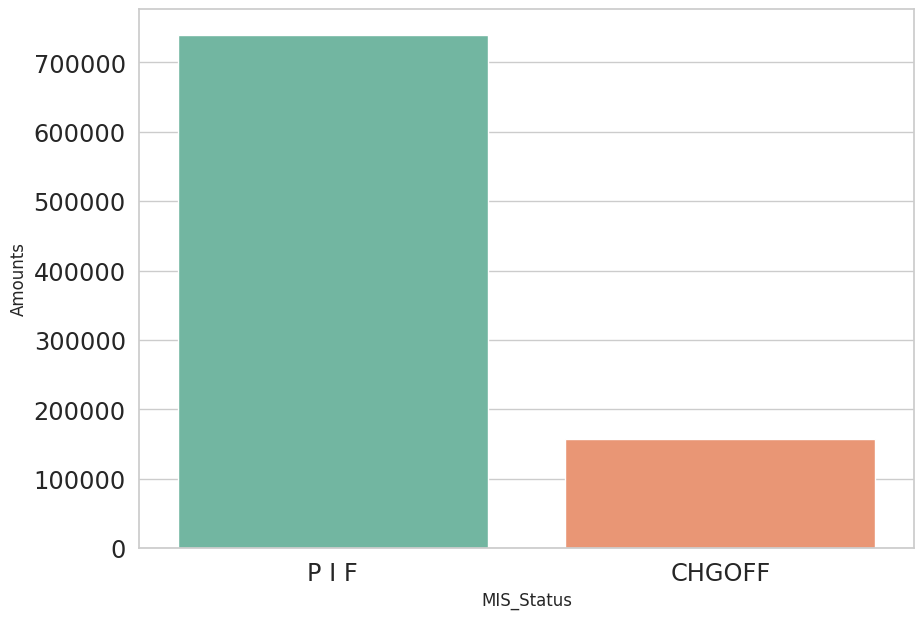

In [148]:
# TARGET
# Amounts of target
sns.countplot(data=df, x="MIS_Status", palette="Set2")
plt.ylabel("Amounts")

### Univariate Analysis

In [149]:
# Menghitung statistik deskriptif
desc = df[['Term', 'NoEmp', 'CreateJob','RetainedJob','DisbursementGross','ChgOffPrinGr','GrAppv','SBA_Appv','%Payment','Payment/Month','SBA_Portion']].describe()

round(desc,3)

Term       NoEmp   CreateJob  RetainedJob  DisbursementGross  \
count  899164.000  899164.000  899164.000   899164.000       8.991640e+05   
mean      110.773      11.411       8.430       10.797       2.011540e+05   
std        78.857      74.108     236.688      237.121       2.876408e+05   
min         0.000       0.000       0.000        0.000       0.000000e+00   
25%        60.000       2.000       0.000        0.000       4.200000e+04   
50%        84.000       4.000       0.000        1.000       1.000000e+05   
75%       120.000      10.000       1.000        4.000       2.380000e+05   
max       569.000    9999.000    8800.000     9500.000       1.144632e+07   

       ChgOffPrinGr       GrAppv     SBA_Appv    %Payment  Payment/Month  \
count    899164.000   899164.000   899164.000  899164.000     899164.000   
mean      13503.295   192686.976   149488.788      86.747            inf   
std       65152.293   283263.391   228414.562      30.366            NaN   
min           0.000      200.000      100.000    -797.920          2.381   
25%           0.000    35000.000    21250.000     100.000        500.000   
50%           0.000    90000.000    61250.000     100.000       1020.408   
75%           0.000   225000.000   175000.000     100.000       2104.167   
max     3512596.000  5472000.000  5472000.000     100.000            inf   

       SBA_Portion  
count   899164.000  
mean         0.709  
std          0.174  
min          0.028  
25%          0.500  
50%          0.750  
75%          0.850  
max          1.000

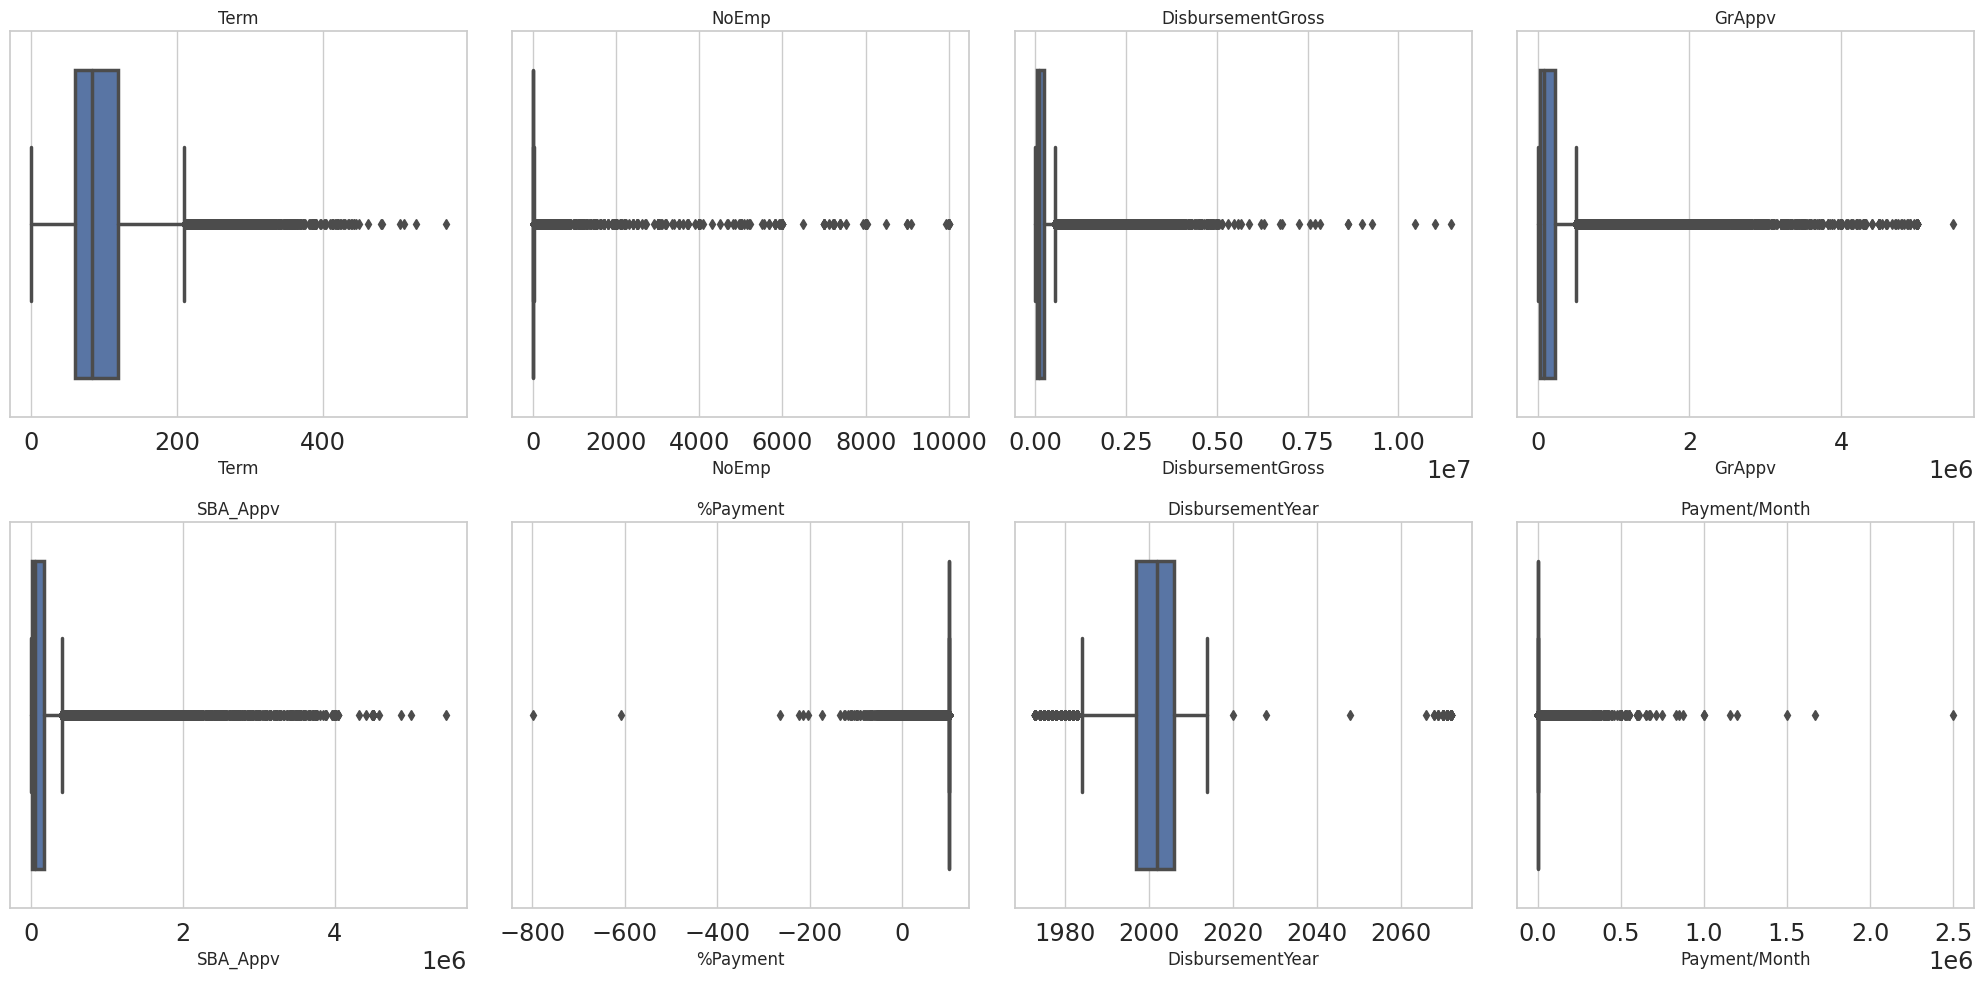

In [150]:
# Melakukan Univariate Analysis menggunakan Box Plot untuk variabel di bawah:

# Variabel yang akan digunakan pada box plot
variables = ['Term', 'NoEmp', 'DisbursementGross', 'GrAppv', 'SBA_Appv', '%Payment', 'DisbursementYear', 'Payment/Month']

# Membuat figure dengan ukuran 20x10 inch
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Meloop setiap variabel dan menggambar box plotnya
for i, var in enumerate(variables):
    row = i // 4
    col = i % 4
    sns.boxplot(x=df[var], ax=axes[row, col])
    axes[row, col].set_title(var)

plt.tight_layout()
plt.show()

In [151]:
# Menghitung jumlah outlier untuk setiap variabel melalui quartile
outliers = {}
for col in ['Term', 'NoEmp', 'DisbursementGross', 'GrAppv', 'SBA_Appv', '%Payment', 'DisbursementYear', 'Payment/Month']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    outliers[col] = len(df[(df[col] < lower) | (df[col] > upper)])
print(outliers)

{'Term': 158700, 'NoEmp': 97222, 'DisbursementGross': 83643, 'GrAppv': 85523, 'SBA_Appv': 90174, '%Payment': 162012, 'DisbursementYear': 3798, 'Payment/Month': 84774}


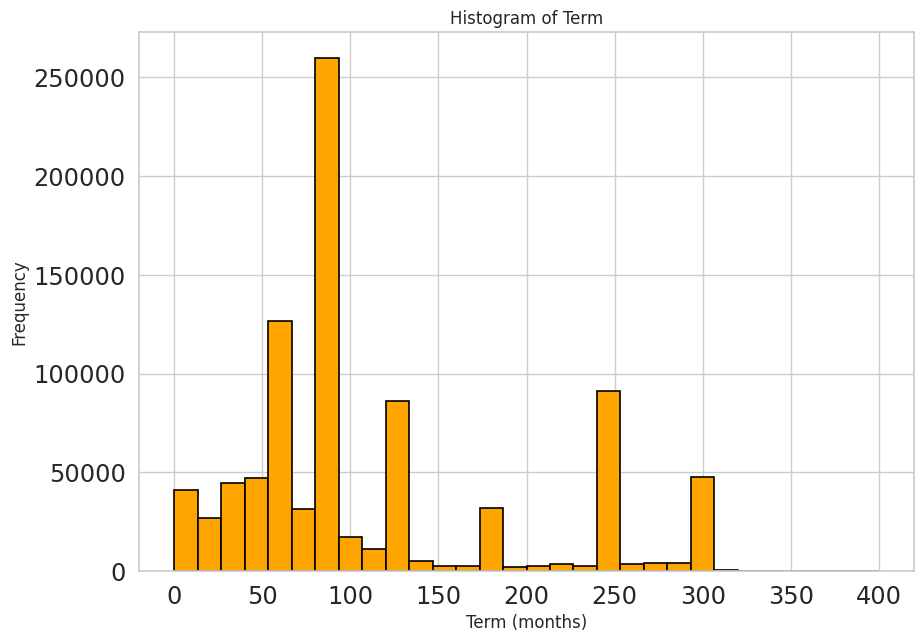

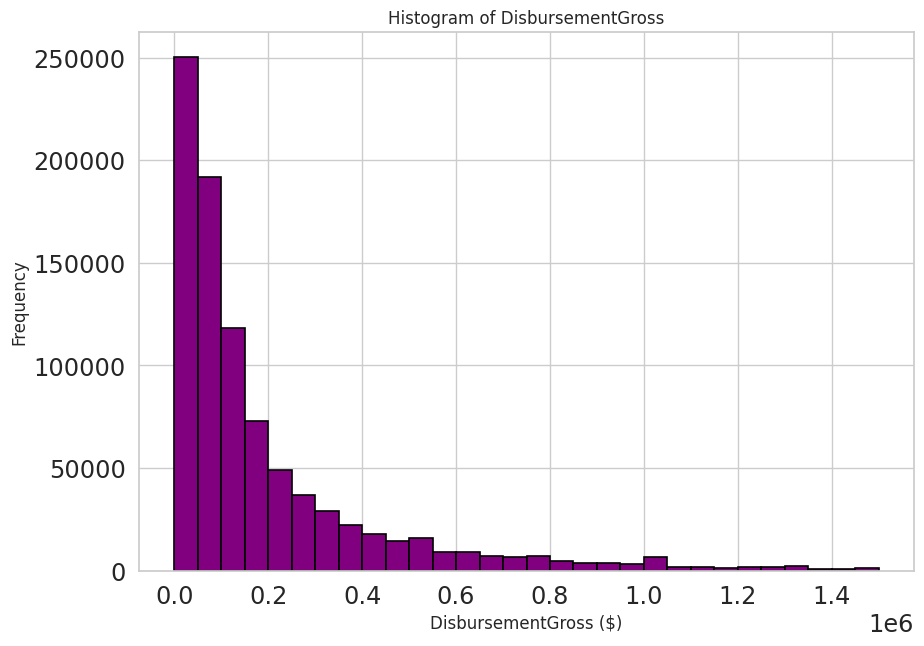

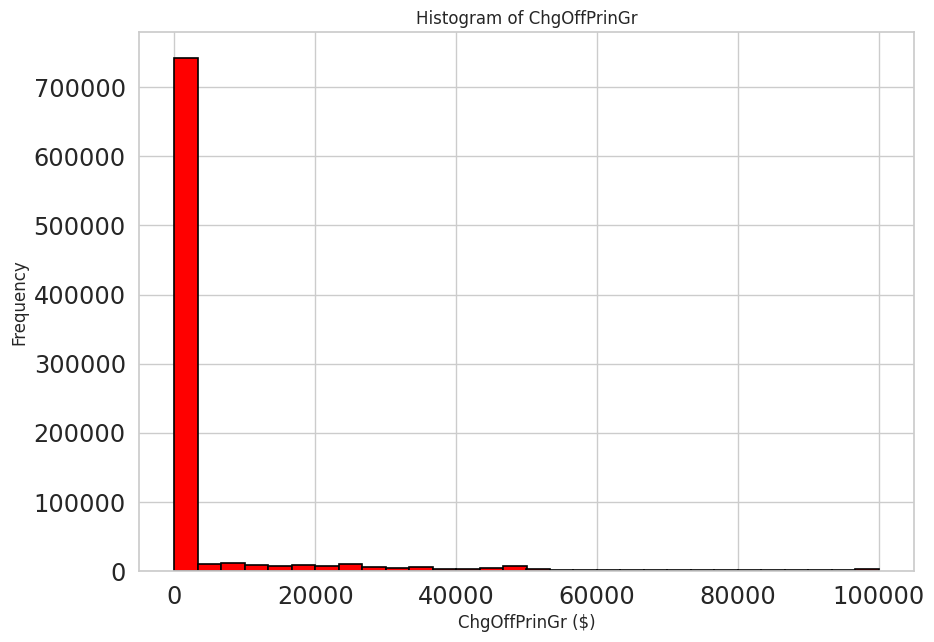

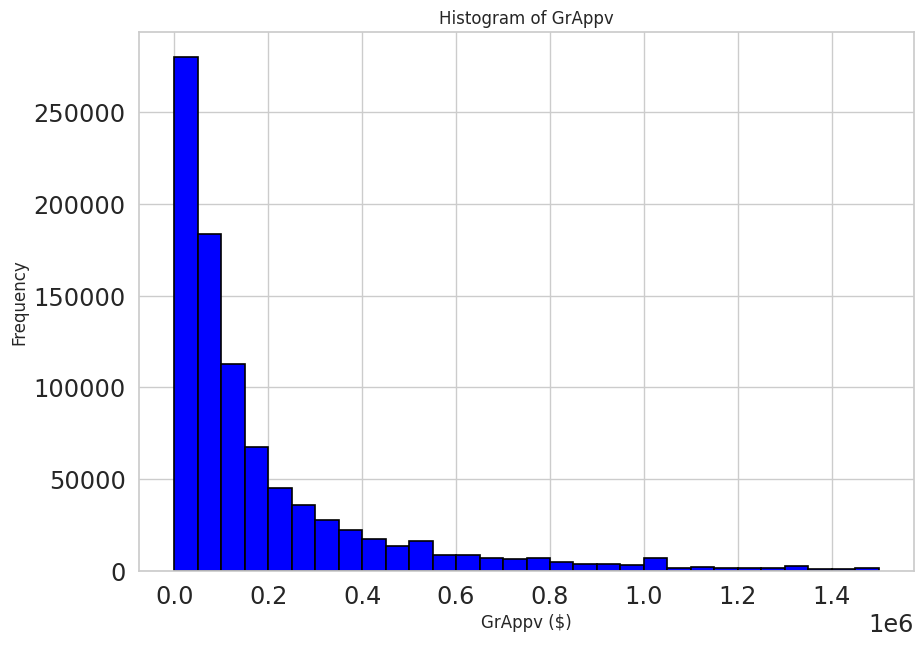

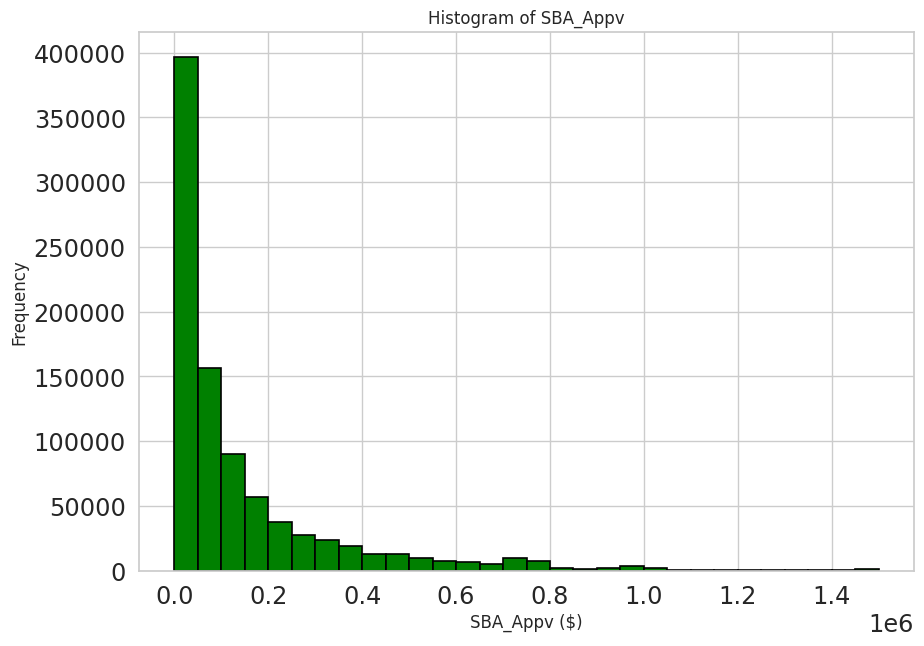

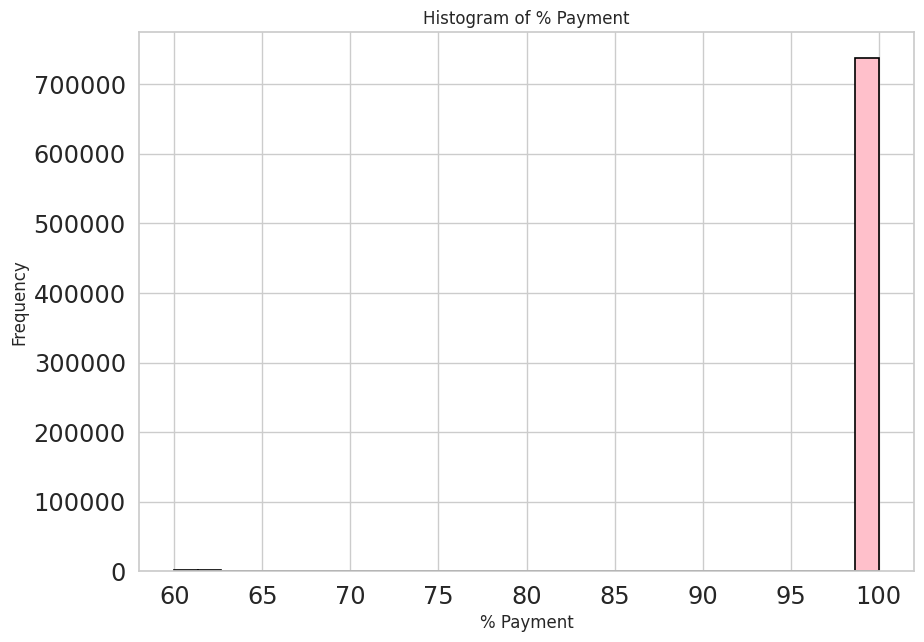

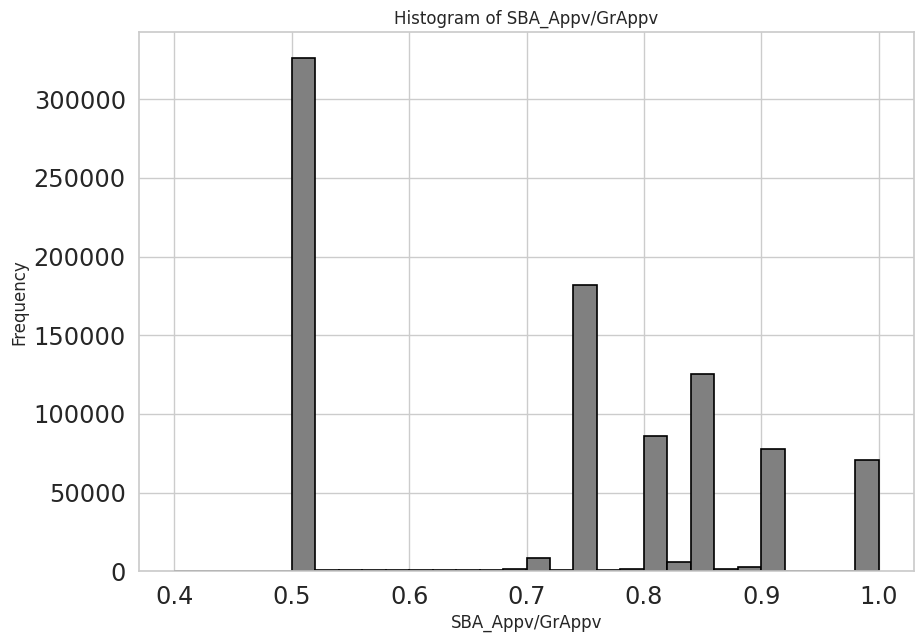

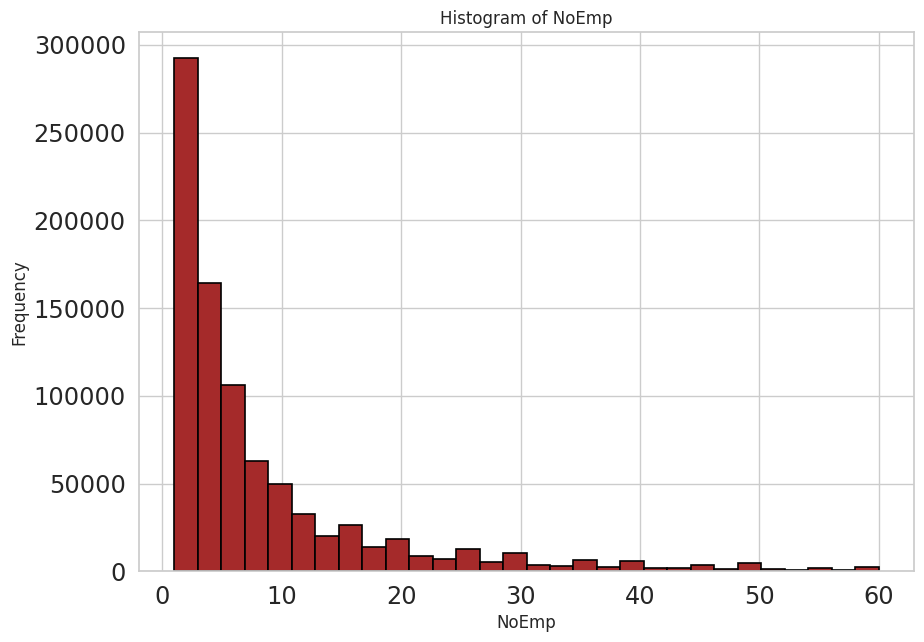

In [152]:
# Melakukan Univariate Analysis menggunakan Histogram untuk variabel di bawah:

import matplotlib.pyplot as plt

# Membuat histogram dari variabel Term
plt.hist(df['Term'], bins=30, range=(0, 400), color='orange', edgecolor='black', linewidth=1.2)
plt.title('Histogram of Term')
plt.xlabel('Term (months)')
plt.ylabel('Frequency')
plt.show()

# Membuat histogram dari variabel DisbursementGross
plt.hist(df['DisbursementGross'], bins=30, range=(0, 1500000), color='purple', edgecolor='black', linewidth=1.2)
plt.title('Histogram of DisbursementGross')
plt.xlabel('DisbursementGross ($)')
plt.ylabel('Frequency')
plt.show()

# Membuat histogram dari variabel ChgOffPrinGr
plt.hist(df['ChgOffPrinGr'], bins=30, range=(0, 100000), color='red', edgecolor='black', linewidth=1.2)
plt.title('Histogram of ChgOffPrinGr')
plt.xlabel('ChgOffPrinGr ($)')
plt.ylabel('Frequency')
plt.show()

# Membuat histogram dari variabel GrAppv
plt.hist(df['GrAppv'], bins=30, range=(0,1500000), color='blue', edgecolor='black', linewidth=1.2)
plt.title('Histogram of GrAppv')
plt.xlabel('GrAppv ($)')
plt.ylabel('Frequency')
plt.show()

# Membuat histogram dari variabel SBA_Appv
plt.hist(df['SBA_Appv'], bins=30, range=(0,1500000), color='green', edgecolor='black', linewidth=1.2)
plt.title('Histogram of SBA_Appv')
plt.xlabel('SBA_Appv ($)')
plt.ylabel('Frequency')
plt.show()

# Membuat histogram dari variabel % Payment
plt.hist(df['%Payment'], bins=30, range=(60,100), color='pink', edgecolor='black', linewidth=1.2)
plt.title('Histogram of % Payment')
plt.xlabel('% Payment')
plt.ylabel('Frequency')
plt.show()


# Membuat histogram dari variabel SBA_Appv/GRAppv
plt.hist(df['SBA_Portion'], bins=30, range=(0.4,1), color='grey', edgecolor='black', linewidth=1.2)
plt.title('Histogram of SBA_Appv/GrAppv')
plt.xlabel('SBA_Appv/GrAppv')
plt.ylabel('Frequency')
plt.show()

# Membuat histogram dari variabel NoEmp
plt.hist(df['NoEmp'], bins=30, range=(1,60), color='brown', edgecolor='black', linewidth=1.2)
plt.title('Histogram of NoEmp')
plt.xlabel('NoEmp')
plt.ylabel('Frequency')
plt.show()


### Multivariate Analysis

1. Analisis Menggunakan Scatter Plot dan jarak Mahalanobis untuk mengetahui jumlah Outlier
2. Analisis Heat Map untuk melihat korelasi label dan feature serta antara feature

Text(0, 0.5, 'ChgOffPrinGr')

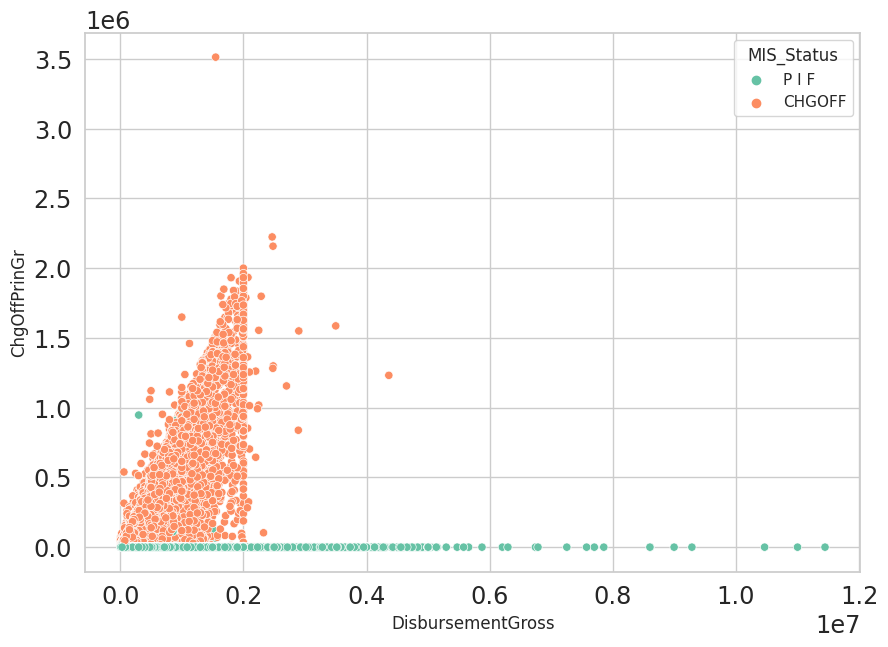

In [153]:
# Multivariate Analysis menggunakan Scatter Plot

# Menampilkan Scatter plot DisbursmentGross vs ChgOffPrinGr untuk identifikasi outlier

sns.scatterplot(x='DisbursementGross', y='ChgOffPrinGr', data=df, hue='MIS_Status', palette='Set2')
plt.xlabel('DisbursementGross')
plt.ylabel('ChgOffPrinGr')

In [154]:
Q1 = df[['DisbursementGross', 'ChgOffPrinGr']].quantile(0.25)
Q3 = df[['DisbursementGross', 'ChgOffPrinGr']].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
outliers = df[((df['DisbursementGross'] < lower.DisbursementGross) | (df['DisbursementGross'] > upper.DisbursementGross)) | ((df['ChgOffPrinGr'] < lower.ChgOffPrinGr) | (df['ChgOffPrinGr'] > upper.ChgOffPrinGr))]
print(len(outliers))

238477


Text(0, 0.5, 'ChgOffPrinGr')

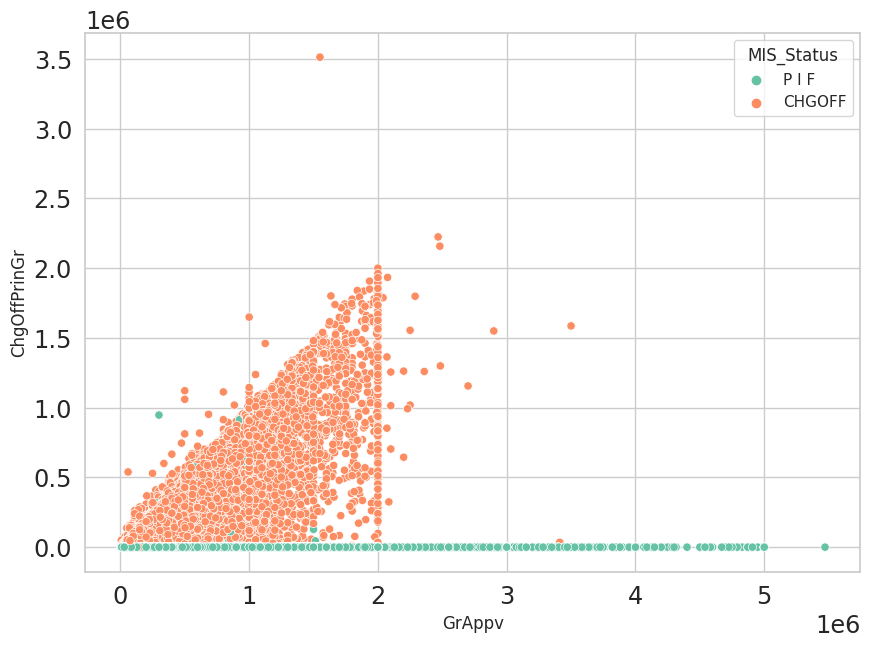

In [155]:
# Menampilkan Scatter plot GrAppv vs ChgOffPrincGr untuk identifikasi outlier
sns.scatterplot(x='GrAppv', y='ChgOffPrinGr', data=df, hue='MIS_Status', palette='Set2')
plt.xlabel('GrAppv')
plt.ylabel('ChgOffPrinGr')

In [156]:
Q1 = df[['GrAppv', 'ChgOffPrinGr']].quantile(0.25)
Q3 = df[['GrAppv', 'ChgOffPrinGr']].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
outliers = df[((df['GrAppv'] < lower.GrAppv) | (df['GrAppv'] > upper.GrAppv)) | ((df['ChgOffPrinGr'] < lower.ChgOffPrinGr) | (df['ChgOffPrinGr'] > upper.ChgOffPrinGr))]
print(len(outliers))

240233


Text(0, 0.5, 'Term')

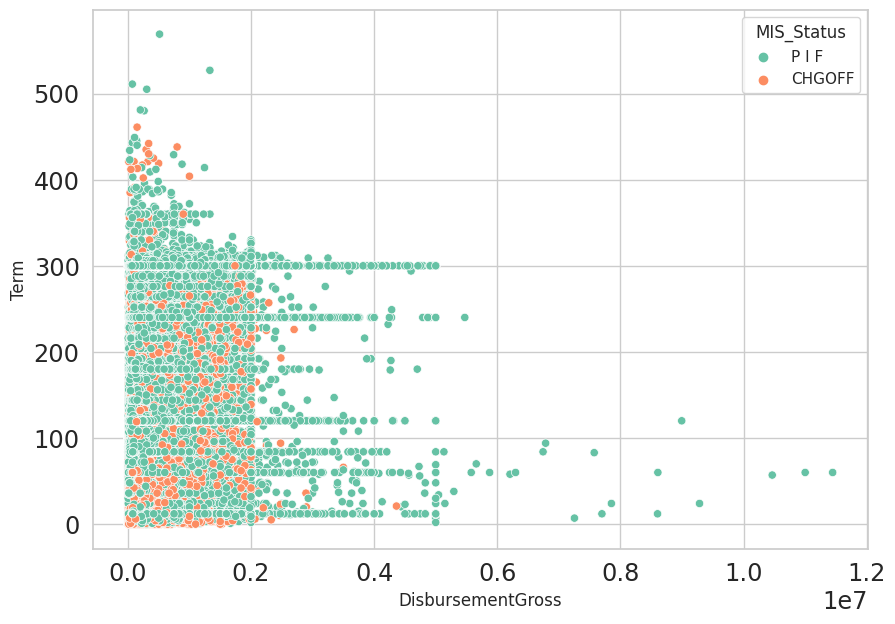

In [157]:
# Menampilkan Scatter plot Term vs Disbursement Gross untuk identifikasi outlier
sns.scatterplot(x='DisbursementGross', y='Term', data=df, hue='MIS_Status', palette='Set2')
plt.xlabel('DisbursementGross')
plt.ylabel('Term')

In [158]:
Q1 = df[['Term', 'DisbursementGross']].quantile(0.25)
Q3 = df[['Term', 'DisbursementGross']].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
outliers = df[((df['Term'] < lower.Term) | (df['Term'] > upper.Term)) | ((df['DisbursementGross'] < lower.DisbursementGross) | (df['DisbursementGross'] > upper.DisbursementGross))]
print(len(outliers))

192499


Text(0, 0.5, 'SBA_Appv')

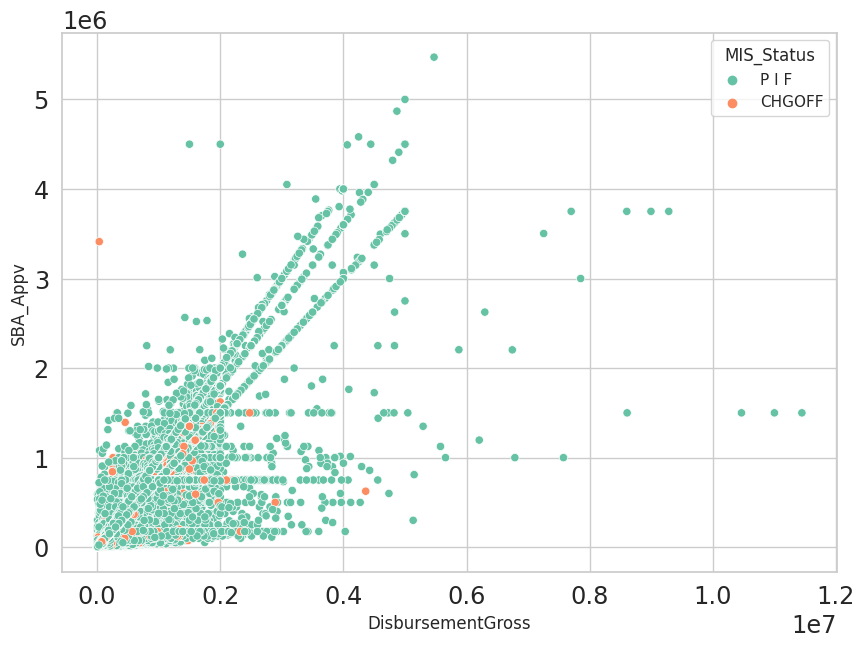

In [159]:
# Menampilkan Scatter plot SBA_Appv vs Disbursement Gross untuk identifikasi outlier
sns.scatterplot(x='DisbursementGross', y='SBA_Appv', data=df, hue='MIS_Status', palette='Set2')
plt.xlabel('DisbursementGross')
plt.ylabel('SBA_Appv')

In [160]:
Q1 = df[['SBA_Appv', 'DisbursementGross']].quantile(0.25)
Q3 = df[['SBA_Appv', 'DisbursementGross']].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
outliers = df[((df['SBA_Appv'] < lower.SBA_Appv) | (df['SBA_Appv'] > upper.SBA_Appv)) | ((df['DisbursementGross'] < lower.DisbursementGross) | (df['DisbursementGross'] > upper.DisbursementGross))]
print(len(outliers))

95995


In [161]:
from scipy.stats import chi2


# menentukan variabel yang menjadi fokus outlier
subset_cols = ['Term', 'DisbursementGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']

# membuat dataframe baru dari variabel diatas
X = df[subset_cols]

# menghitung vektor rata-rata dan matrix covarians
mean_vector = X.mean().values
covariance_matrix = X.cov().values

# menghitung inverse matrix covarians
inverse_covariance_matrix = np.linalg.inv(covariance_matrix)

# menentukan signifikansi level
significance_level = 0.01

# menghitung nilai chi-square
chi_square = chi2.ppf((1 - significance_level), df=X.shape[1]-1)

# membuat kolom baru untuk nilai jarak mahalanobis
df['Mahalanobis'] = 0

# menghitung setiap nilai mahalanobis untuk masing-masing baris
for i in range(len(X)):
    x = X.iloc[i].values
    delta = x - mean_vector
    distance = np.sqrt(np.dot(np.dot(delta, inverse_covariance_matrix), delta.T))
    df.at[X.index[i], 'Mahalanobis'] = distance

# menentukan jumlah outlier yang teridentifikasi
outliers = df[df['Mahalanobis'] > chi_square].index.tolist()
print(len(outliers))

2691


<ipython-input-162-aaf317e6b16c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


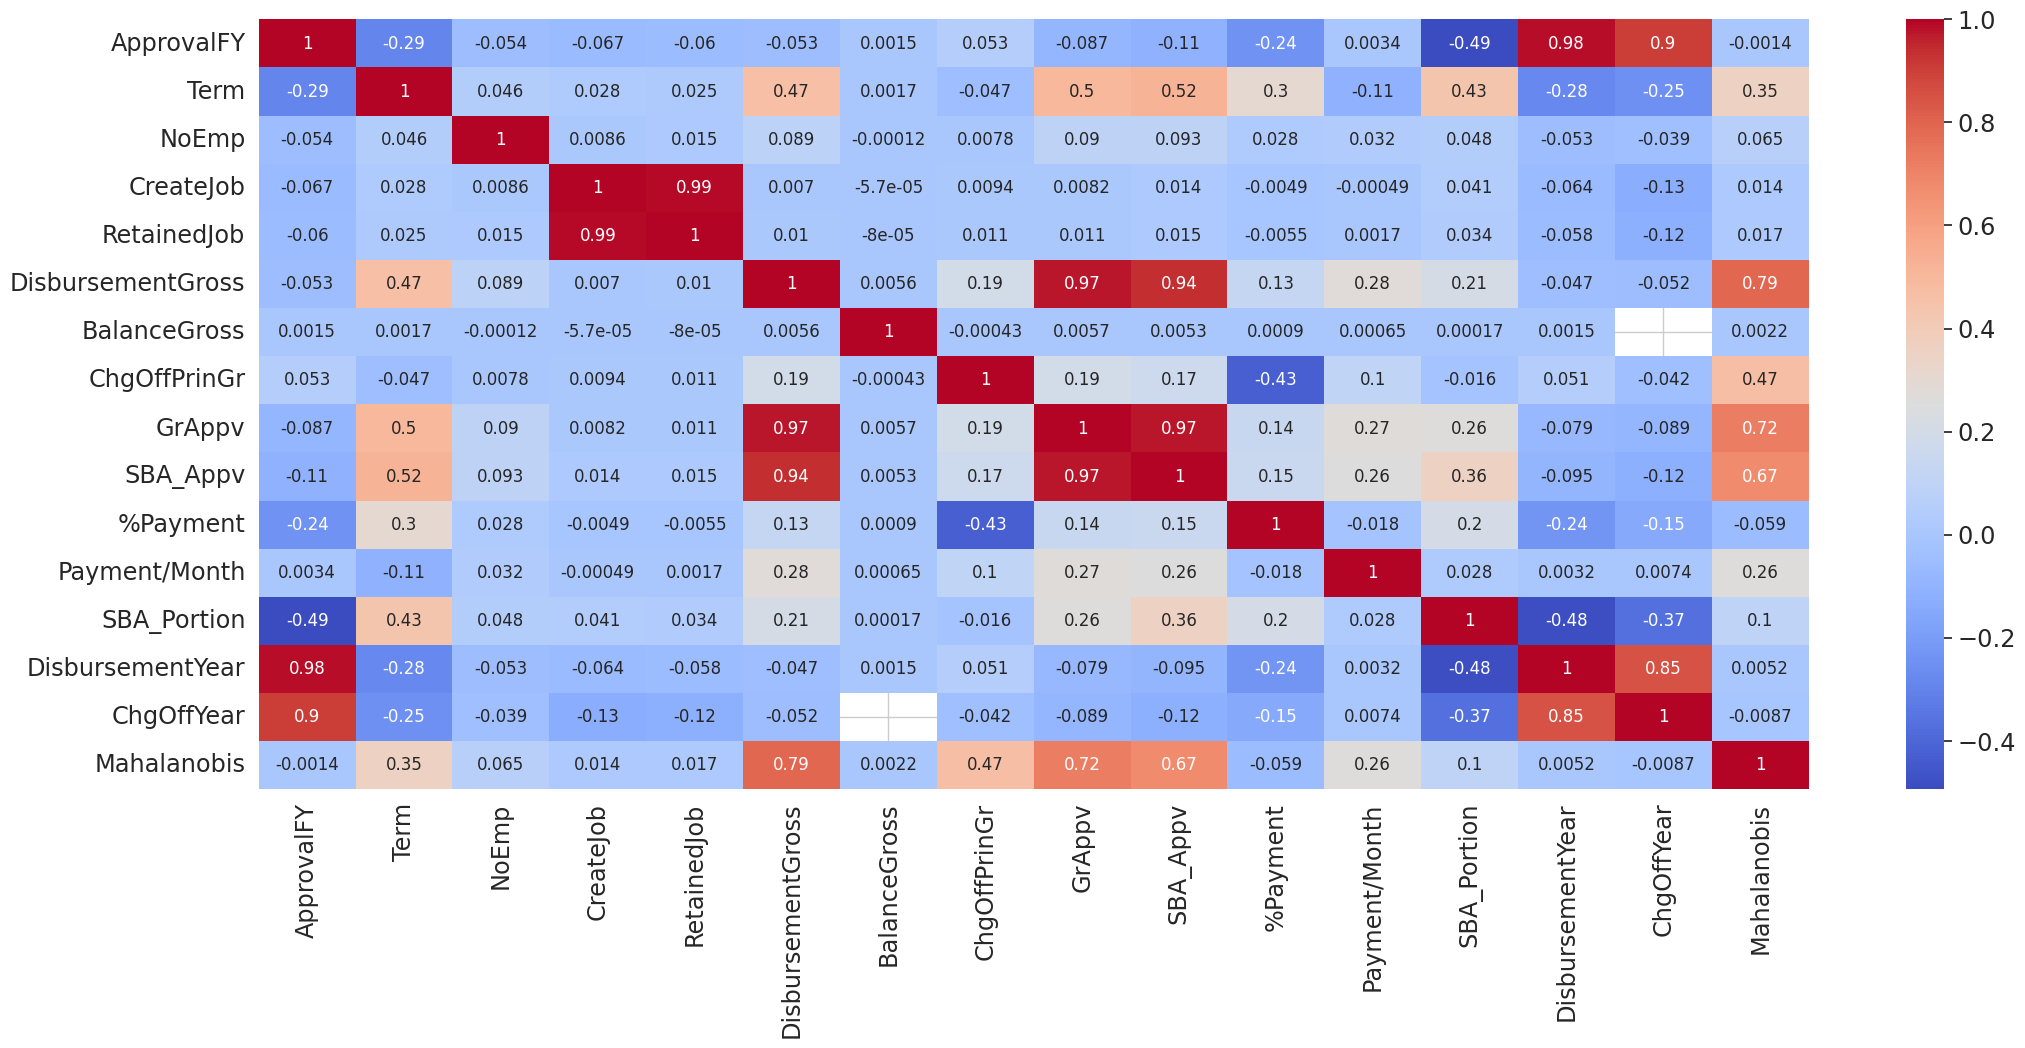

In [162]:
# Menghitung matriks korelasi untuk menentukan hubungan antara label dan feature
corr_matrix = df.corr()

# Mengatur Ukuran Gambar
plt.figure(figsize=(25,10))

# Membuat HeatMap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 12})

# Mengatur ukuran font
sns.set(font_scale=1.2)

# Menunjukan Plot
plt.show()

### Business Insight

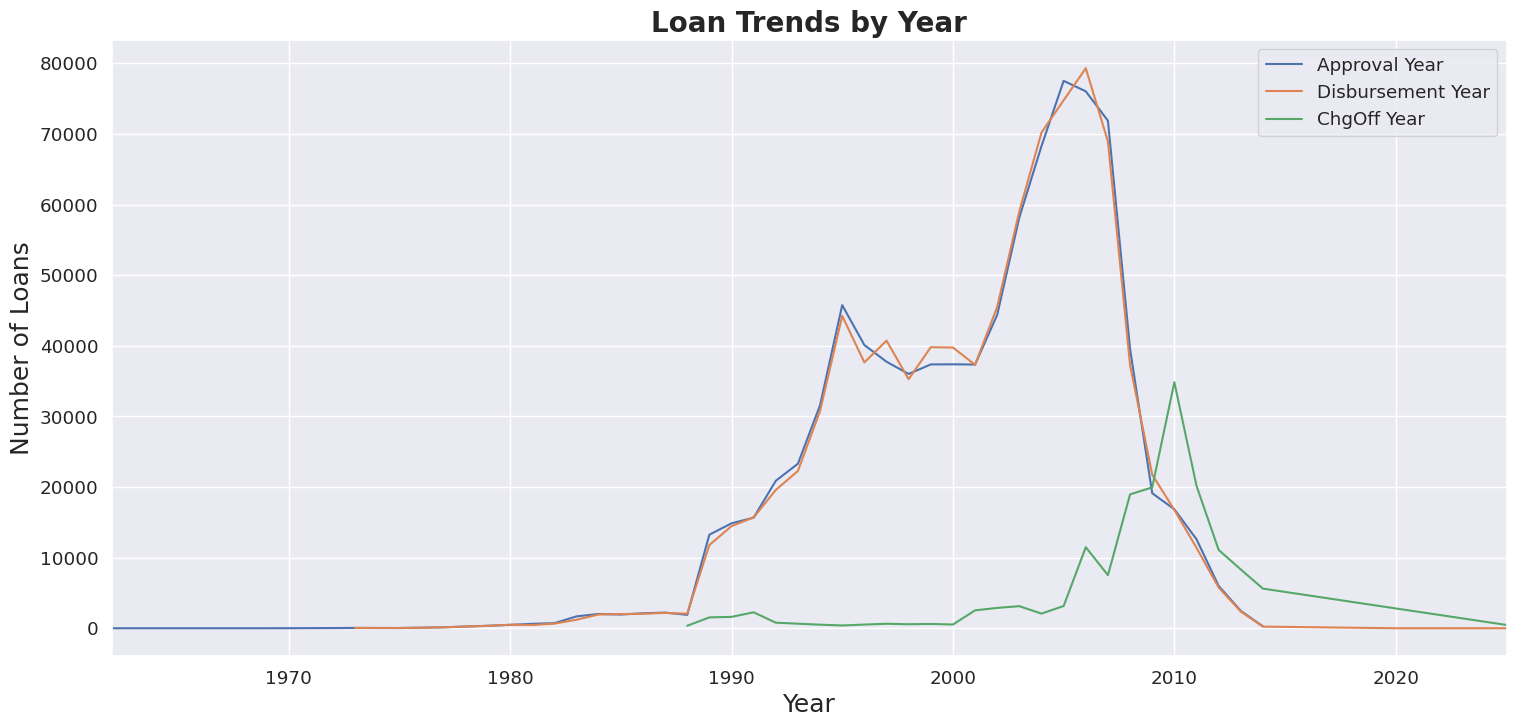

In [163]:
import matplotlib.pyplot as plt

# set figure size
plt.figure(figsize=(18,8))

# plot ApprovalFY
plt.plot(df.groupby('ApprovalFY')['LoanNr_ChkDgt'].count().index, 
         df.groupby('ApprovalFY')['LoanNr_ChkDgt'].count().values, 
         label='Approval Year')

# plot Disbursement Year
plt.plot(df.groupby('DisbursementYear')['LoanNr_ChkDgt'].count().index, 
         df.groupby('DisbursementYear')['LoanNr_ChkDgt'].count().values, 
         label='Disbursement Year')

# plot ChgOff Year
df['ChgOffYear'] = pd.to_datetime(df['ChgOffDate']).dt.year
plt.plot(df.groupby('ChgOffYear')['LoanNr_ChkDgt'].count().index, 
         df.groupby('ChgOffYear')['LoanNr_ChkDgt'].count().values, 
         label='ChgOff Year')

# set x-axis label
plt.xlabel('Year', fontsize=18)

# set y-axis label
plt.ylabel('Number of Loans', fontsize=18)

# set x-axis range
plt.xlim(1962, 2025)

# set title
plt.title('Loan Trends by Year', fontsize=20, fontweight='bold')

# add legend
plt.legend()

# show plot
plt.show()

Terdapat sebuah insight dimana terjadi lonjakan permintaan loan dari periode 1990 sampai 2007. Pada 2007 - 2009 terjadi **krisis finansial** di amerika dimana banyak kredit mengalami kegagalan bayar sampai **puncaknya pada tahun 2010.** Faktor ini sangat berpengaruh dalam memprediksi faktor penyebab kegagalan dalam pembayaran kredit.

*English section: There is an insight where there is a surge in loan demand from 1990 to 2007. From 2007 to 2009, there was a financial crisis in America where many credits defaulted until it peaked in 2010. This factor is very influential in predicting the causes of failure in credit payment.*

In [164]:
# calculate total number of observations
total_obs = len(df)

# calculate number of ChgOff observations
chgoff_obs = len(df[df['MIS_Status'] == 'CHGOFF'])

# calculate number of PIF observations
pif_obs = len(df[df['MIS_Status'] == 'P I F'])

# calculate percentage of ChgOff observations
chgoff_pct = chgoff_obs / total_obs * 100

# calculate percentage of PIF observations
pif_pct = pif_obs / total_obs * 100

# print the results
print('Percentage of ChgOff observations: {:.2f}%'.format(chgoff_pct))
print('Percentage of PIF observations: {:.2f}%'.format(pif_pct))

Percentage of ChgOff observations: 17.52%
Percentage of PIF observations: 82.26%


P I F     739609
CHGOFF    157558
Name: MIS_Status, dtype: int64
P I F     82.438275
CHGOFF    17.561725
Name: MIS_Status, dtype: float64


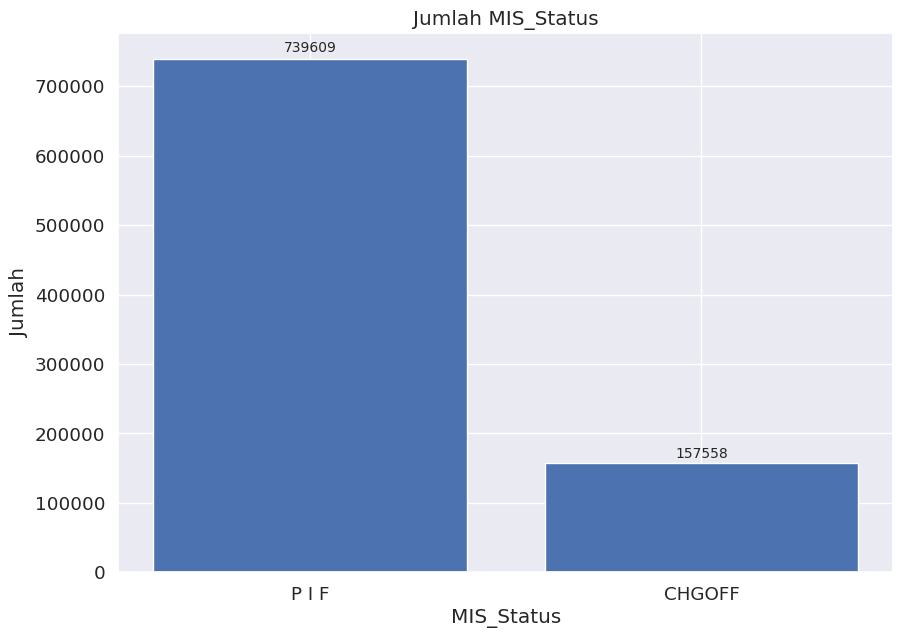

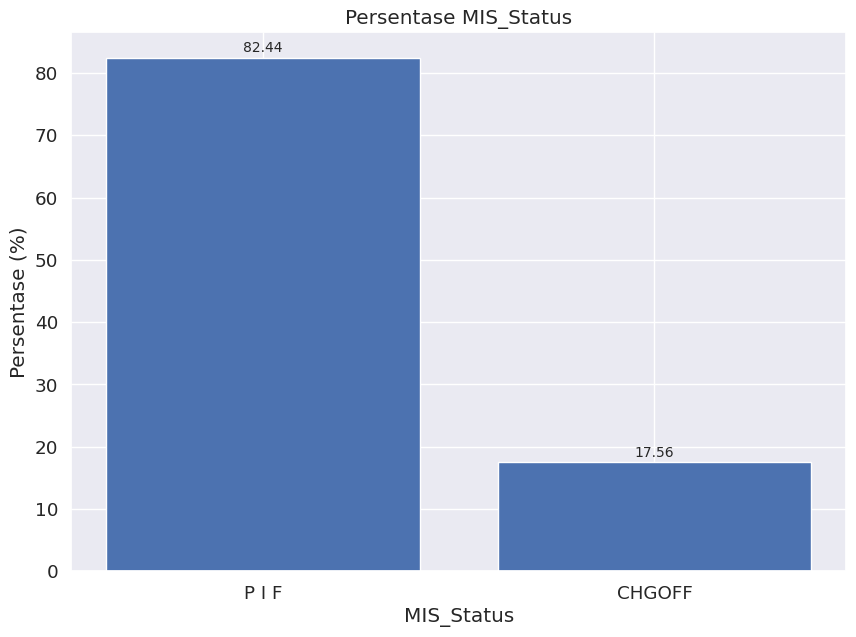

In [165]:
import matplotlib.pyplot as plt

# Hitung jumlah MIS_Status
count_mis_status = df['MIS_Status'].value_counts()
print(count_mis_status)

# Hitung persentase MIS_Status
percent_mis_status = df['MIS_Status'].value_counts(normalize=True) * 100
print(percent_mis_status)

# Plot bar chart jumlah MIS_Status
plt.bar(count_mis_status.index, count_mis_status.values)
plt.title('Jumlah MIS_Status')
plt.xlabel('MIS_Status')
plt.ylabel('Jumlah')
plt.text(x=0, y=755000, s="739609", ha="center", va="center", fontsize=10)
plt.text(x=1, y=170000, s="157558", ha="center", va="center", fontsize=10)
plt.show()

# Plot bar chart persentase MIS_Status
plt.bar(percent_mis_status.index, percent_mis_status.values)
plt.title('Persentase MIS_Status')
plt.xlabel('MIS_Status')
plt.ylabel('Persentase (%)')
plt.text(x=0, y=84, s="82.44", ha="center", va="center", fontsize=10)
plt.text(x=1, y=19, s="17.56", ha="center", va="center", fontsize=10)
plt.show()

Jumlah Presentase debitur yang berhasil sebanyak 82.44% dan debitur yang mengalami **gagal bayar sebanyak 17.56%**. Hal ini menyebabkan jumlah data menjadi imbalance dan perlu dilakukan penyesuaian.

*English section: The percentage of successful borrowers is 82.44% and the percentage of borrowers who default is 17.56%. This causes the data to be imbalanced and adjustment needs to be made.*

NewExist  MIS_Status
0.0       P I F            965
          CHGOFF            63
1.0       P I F         533332
          CHGOFF        110114
2.0       P I F         205192
          CHGOFF         47367
Name: MIS_Status, dtype: int64


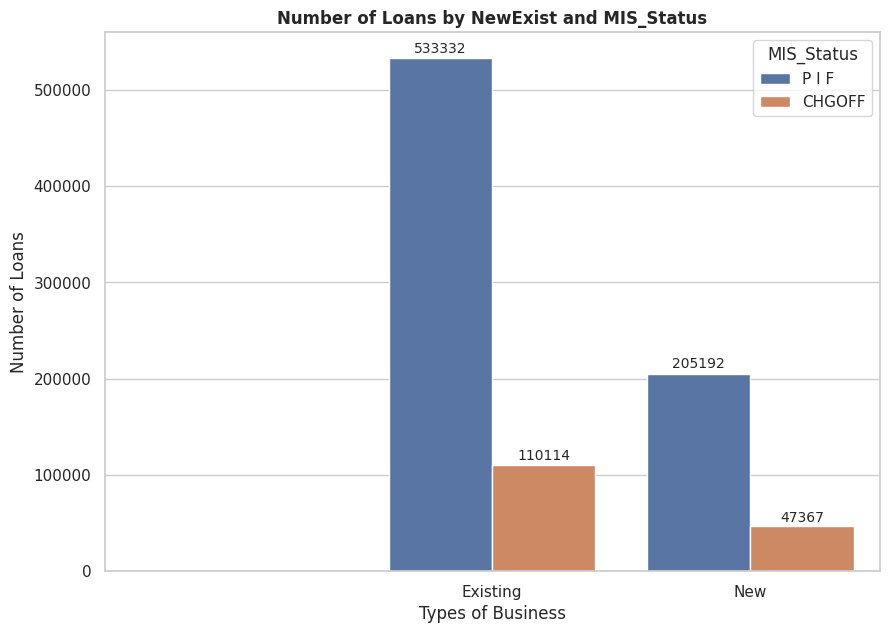

In [166]:
nums_loans = df.groupby('NewExist')['MIS_Status'].value_counts()
print(nums_loans)

# Create plot bar for Number of Loans by NewExist and MIS_Status
sns.set(style="whitegrid")
ax = sns.countplot(x="NewExist", hue="MIS_Status", data=df)

plt.title('Number of Loans by NewExist and MIS_Status', fontweight='bold')
plt.xlabel('Types of Business')
plt.ylabel('Number of Loans')
plt.legend(title='MIS_Status', loc='upper right')
plt.text(x=0.8, y=543000, s="533332", ha="center", va="center", fontsize=10)
plt.text(x=1.2, y=120000, s="110114", ha="center", va="center", fontsize=10)
plt.text(x=1.8, y=215000, s="205192", ha="center", va="center", fontsize=10)
plt.text(x=2.2, y=55000, s="47367", ha="center", va="center", fontsize=10)
plt.xticks([1,2], ['Existing','New'])

plt.show()

Dari data yang diperoleh dapat diketahui bahwa **perusahaan yang sudah berjalan lebih banyak mengalami kegagalan dalam membayar kredit** dibandingkan perusahaan yang baru merintis.

*English section: From the obtained data, it can be seen that established companies experience more failures in paying off loans compared to newly established companies.*

MIS_Status  UrbanRural
CHGOFF      1             114867
            0              22978
            2              19713
P I F       1             354414
            0             299848
            2              85347
Name: UrbanRural, dtype: int64


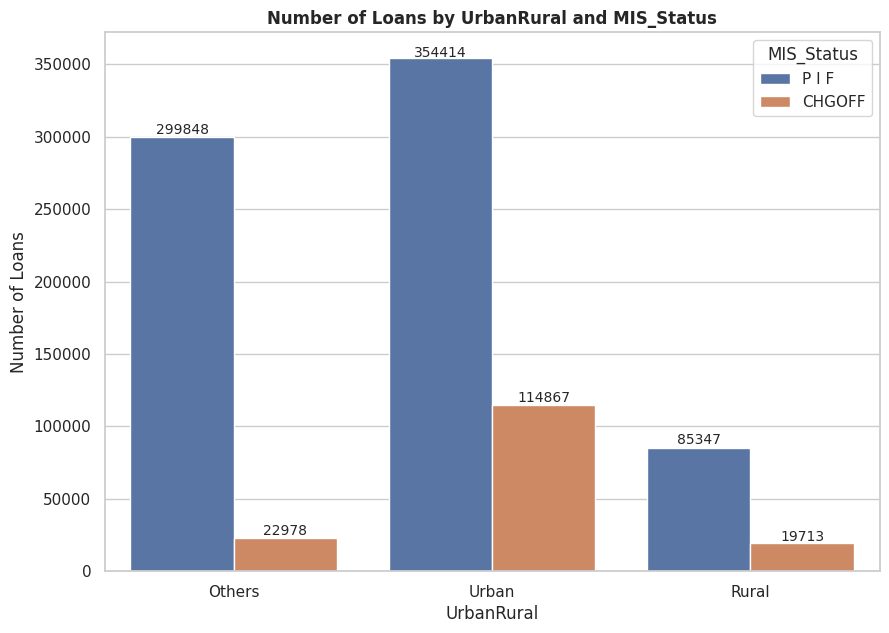

In [167]:
mis_urban = df.groupby('MIS_Status')['UrbanRural'].value_counts()
print(mis_urban)

# Create plot bar for Number of Loans by UrbanRural and MIS_Status
sns.set(style="whitegrid")

ax = sns.countplot(x="UrbanRural", hue="MIS_Status", data=df)

plt.title('Number of Loans by UrbanRural and MIS_Status', fontweight='bold') 
plt.xlabel('UrbanRural') 
plt.legend(title='MIS_Status', loc='upper right')
plt.ylabel("Number of Loans")
plt.text(x=-0.2, y=305000, s="299848", ha="center", va="center", fontsize=10)
plt.text(x=0.2, y=28000, s="22978", ha="center", va="center", fontsize=10)
plt.text(x=0.8, y=358000, s="354414", ha="center", va="center", fontsize=10)
plt.text(x=1.2, y=120000, s="114867", ha="center", va="center", fontsize=10)
plt.text(x=1.8, y=91000, s="85347", ha="center", va="center", fontsize=10)
plt.text(x=2.2, y=24000, s="19713", ha="center", va="center", fontsize=10)
plt.xticks([0,1,2], ['Others','Urban','Rural'])

plt.show()

Perusahaan di **area urban mengalami kegagalan dalam membayar kredit lebih besar** dibandingkan perusahaan di area rural.

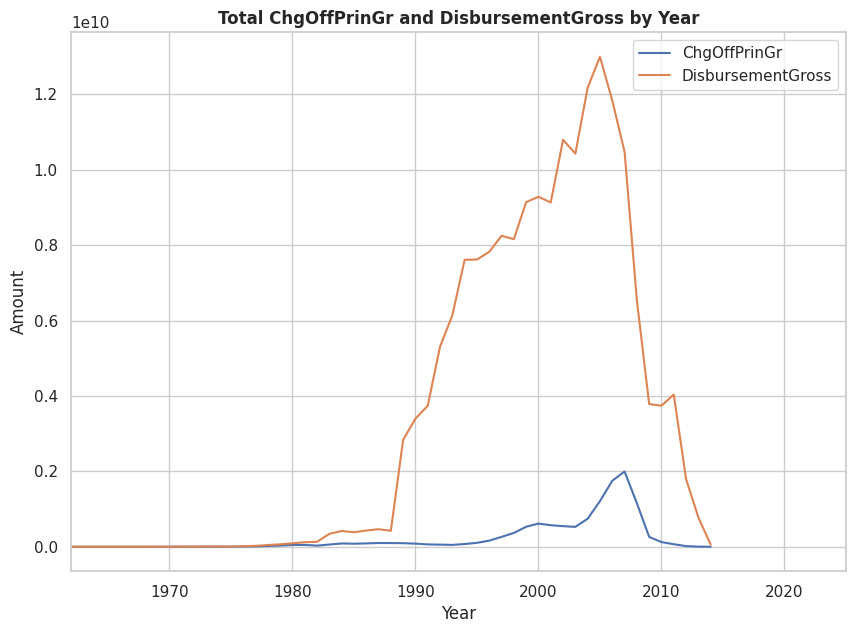

In [168]:
# Menghitung total ChgOffPrinGr dan DisbursementGross untuk setiap tahun
yearly_totals = df.groupby('ApprovalFY')[['ChgOffPrinGr', 'DisbursementGross']].sum()

# Membuat line plot
yearly_totals.plot(kind='line')

# Mengatur label sumbu x dan y serta judul plot
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Total ChgOffPrinGr and DisbursementGross by Year', fontweight='bold')

# set x-axis range
plt.xlim(1962, 2025)

# Menampilkan plot
plt.show()

Grafik di atas menampilkan informasi terkait jumlah dana yang dikeluarkan oleh kreditur setiap tahun (garis merah) dan jumlah dana yang tersisa dari kredit yang mengalami masalah pembayaran. **Jumlah loss dari dana yang macet tidak terlalu besar dibanding jumlah total dana yang dikeluarkan setiap tahun.**

*English section: The graph above shows information regarding the amount of funds disbursed by the creditor each year (red line) and the amount of funds remaining from troubled loans. The loss from non-performing funds is not too significant compared to the total amount of funds disbursed each year.*

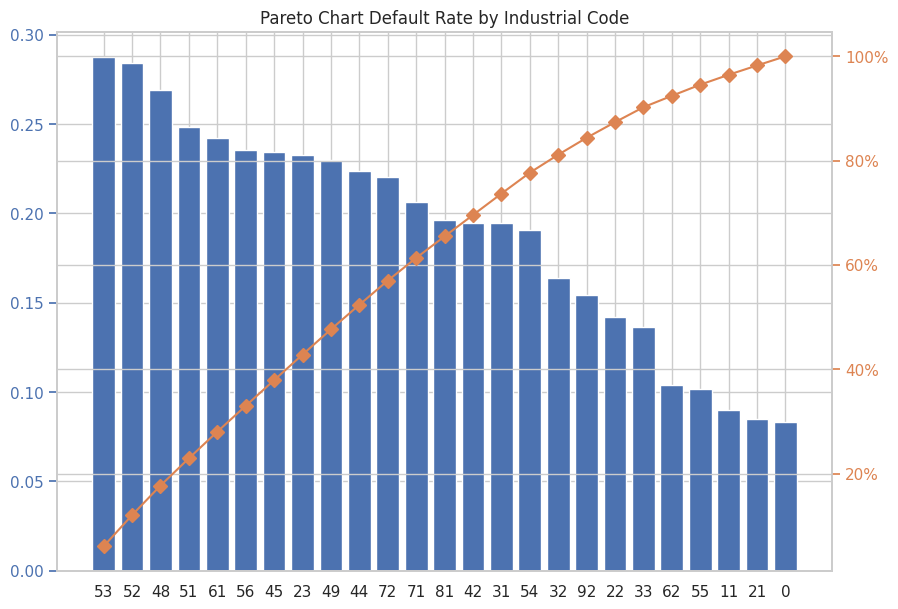

In [169]:
import matplotlib.ticker as mticker

# Calculate the total number of cases for each Industrial Code
grouped = df.groupby(['IndustrialCode'])['MIS_Status'].count().reset_index()

# Calculate the total CHGOFF for each Industrial Code
grouped2 = df.groupby(['IndustrialCode'])['MIS_Status'].apply(lambda x: (x=='CHGOFF').sum()).reset_index()

# Merge the two dataframes
merged = pd.merge(grouped, grouped2, on='IndustrialCode')
merged.columns = ['IndustrialCode', 'TotalCase', 'TotalCHGOFF']

# Calculate the default rate
merged['DefaultRate'] = merged['TotalCHGOFF'] / merged['TotalCase']

# Sort the values in descending order
merged = merged.sort_values('DefaultRate', ascending=False)

# Create a Pareto chart
fig, ax = plt.subplots()
ax.bar(merged['IndustrialCode'], merged['DefaultRate'], color='C0')
ax2 = ax.twinx()
ax2.plot(merged['IndustrialCode'], merged['DefaultRate'].cumsum()/merged['DefaultRate'].sum()*100, color='C1', marker='D', ms=7)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter())
ax.tick_params(axis='y', colors='C0')
ax2.tick_params(axis='y', colors='C1')
plt.title('Pareto Chart Default Rate by Industrial Code')
plt.show()


In [170]:
# Membuat kolom baru (Feature Extraction)
df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])

df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})


In [171]:
# Membuat kolom baru (Feature Extraction)
# DaysToDisbursement column which calculates the number of days passed between DisbursementDate and ApprovalDate
import numpy as np

df['DaysToDisbursement'] = df['DisbursementDate'] - df['ApprovalDate']
df['DaysToDisbursement'] = df['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1] if 'd' in x else x)
df['DaysToDisbursement'] = pd.to_numeric(df['DaysToDisbursement'], errors='coerce').astype('Int64')
df['DaysToDisbursement'] = df['DaysToDisbursement'].replace(np.nan, 0)

df.sample(3)

LoanNr_ChkDgt                            Name           City State  \
11502     1082325001  Nicole Marino dba Banners Unli  OVERLAND PARK    KS   
472284    4556455001  Harold D Hudson and Terri Huds         LAUREL    MS   
265696    2856835000  James Marshall dba Kiss of the       Muskegon    MI   

          Zip                           Bank BankState   NAICS ApprovalDate  \
11502   66221     BANK OF AMERICA NATL ASSOC        NC  423440   2004-10-13   
472284  39443  COMMUNITY BANK OF MISSISSIPPI        MS  112320   2011-02-24   
265696  49445   THE HUNTINGTON NATIONAL BANK        OH  812990   2007-12-11   

        ApprovalFY  ...  SBA_Appv  %Payment Payment/Month  SBA_Portion  \
11502         2005  ...      5000       0.0    222.222222         0.50   
472284        2011  ...     34425     100.0    675.000000         0.85   
265696        2008  ...     12500     100.0    416.666667         0.50   

        DisbursementYear IndustrialCode ChgOffYear Mahalanobis  \
11502             2004.0             42     2008.0    1.021899   
472284            2011.0             11        NaN    0.753346   
265696            2008.0             81        NaN    0.763363   

                Industry DaysToDisbursement  
11502    Wholesale_trade                 18  
472284  Ag/For/Fish/Hunt                 36  
265696      Other_no_pub                 51  

[3 rows x 36 columns]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


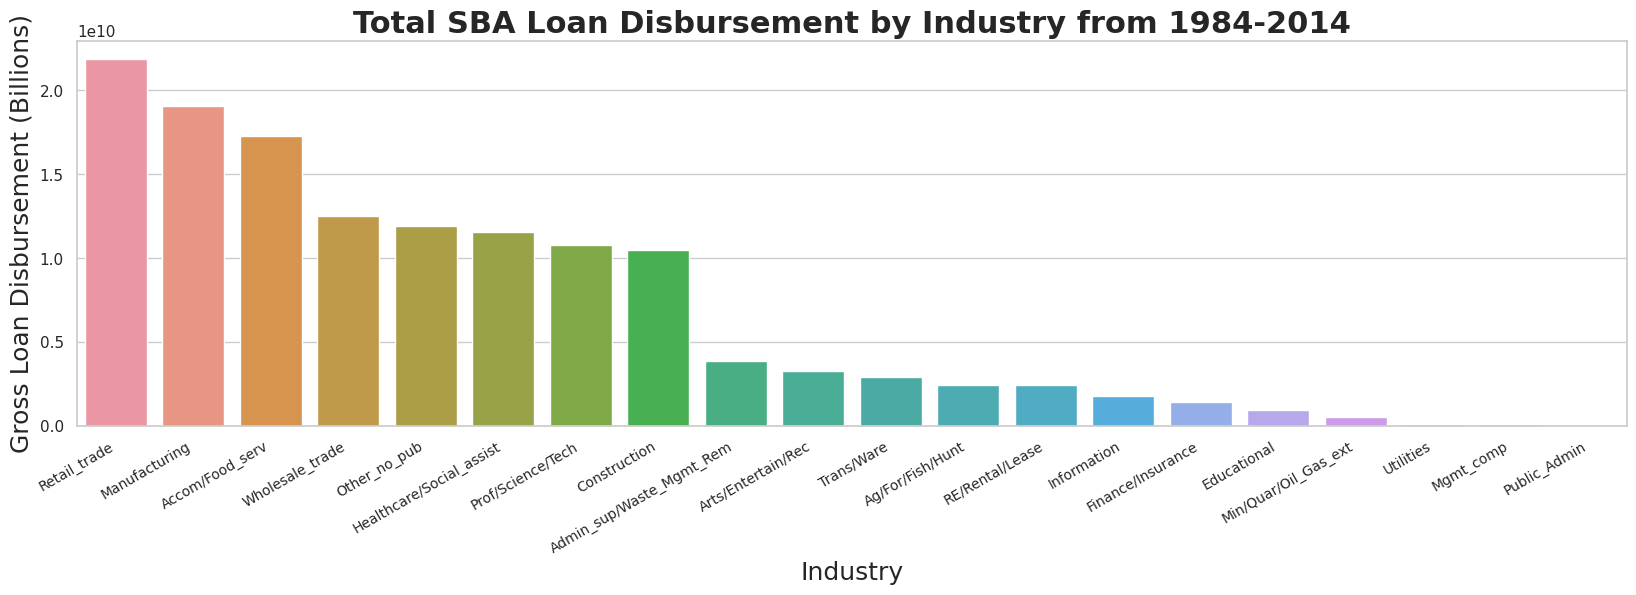

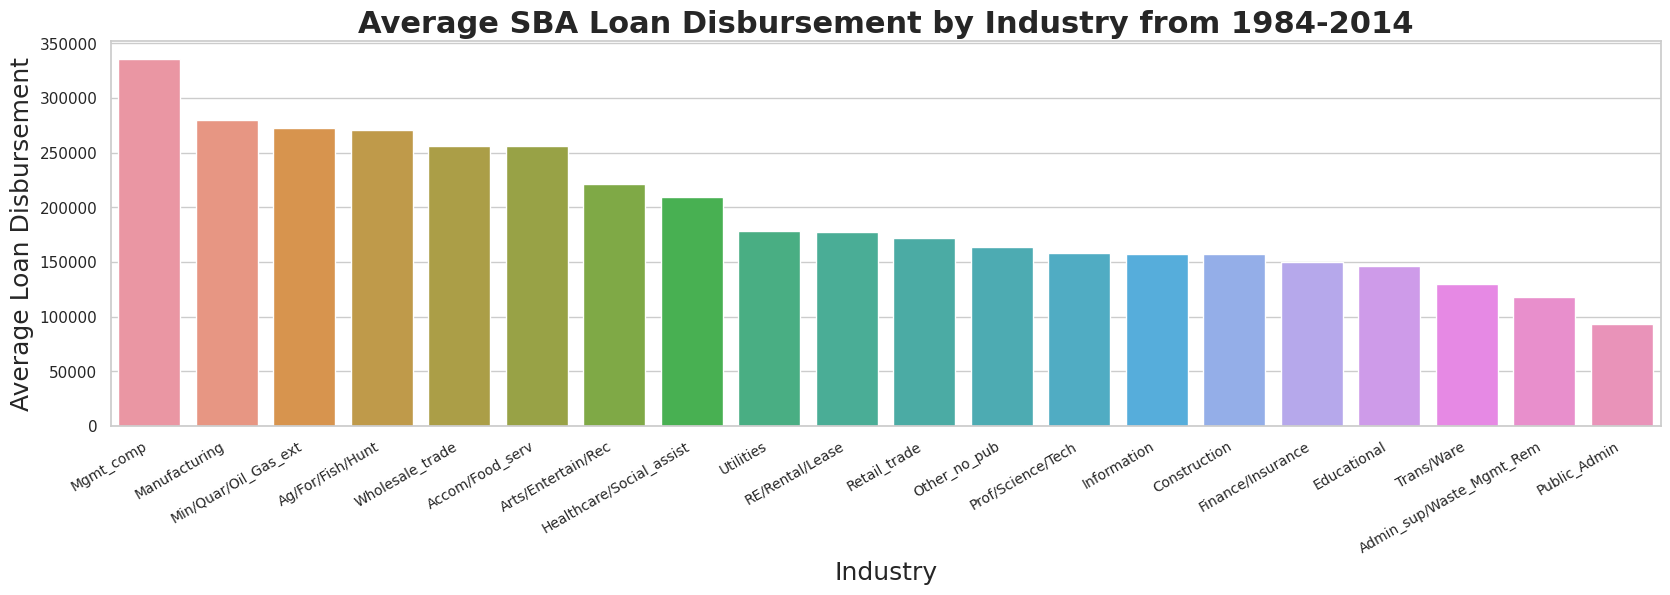

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
!pip install seaborn --upgrade

df_industrySum = df.groupby('Industry')['DisbursementGross'].sum().sort_values(ascending=False)
df_industryAve = df.groupby('Industry')['DisbursementGross'].mean().sort_values(ascending=False)

# Total disbursed loan amount by industry
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
sns.barplot(x='Industry', y='DisbursementGross', data=df_industrySum.reset_index())
plt.xticks(rotation=30, horizontalalignment='right', fontsize=10)
plt.title('Total SBA Loan Disbursement by Industry from 1984-2014', fontsize=22, fontweight='bold')
plt.xlabel('Industry', fontsize=18)
plt.ylabel('Gross Loan Disbursement (Billions)', fontsize=18)
plt.show()

# Average disbursed loan amount by industry
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
sns.barplot(x='Industry', y='DisbursementGross', data=df_industryAve.reset_index())
plt.xticks(rotation=30, horizontalalignment='right', fontsize=10)
plt.title('Average SBA Loan Disbursement by Industry from 1984-2014', fontsize=22, fontweight='bold')
plt.xlabel('Industry', fontsize=18)
plt.ylabel('Average Loan Disbursement', fontsize=18)
plt.show()


Sektor industri **retail trade dan manufacturing melakukan pinjaman lebih banyak** dibanding sektor industri yang lain selama periode tersebut. Meskipun pada sektor industri Agriculture, forestry, fishing & hunting, Mining, quarrying, & oil and gas extraction, dan Management of companies & enterprises memiliki jumlah pinjaman dana yang disalurkan relatif lebih sedikit dibanding industri lainnya. Namun industri tersebut memiliki jumlah pinjaman rata-rata tertinggi dibandingkan dengan industri lain. Hal Ini menunjukkan bahwa industri tersebut memiliki jumlah sedikit dengan nilai pinjaman yang besar.

*English section: The retail trade and manufacturing industries have taken out more loans than other industries during that period. Although the Agriculture, forestry, fishing & hunting, Mining, quarrying, & oil and gas extraction, and Management of companies & enterprises sectors have relatively fewer loan disbursements compared to other industries. However, these industries have the highest average loan amounts compared to other industries. This indicates that these industries have a small number of loans but with large loan values.*

<ipython-input-173-de3bef3393b2>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_industryAve.index, rotation=35, horizontalalignment='right', fontsize=10)


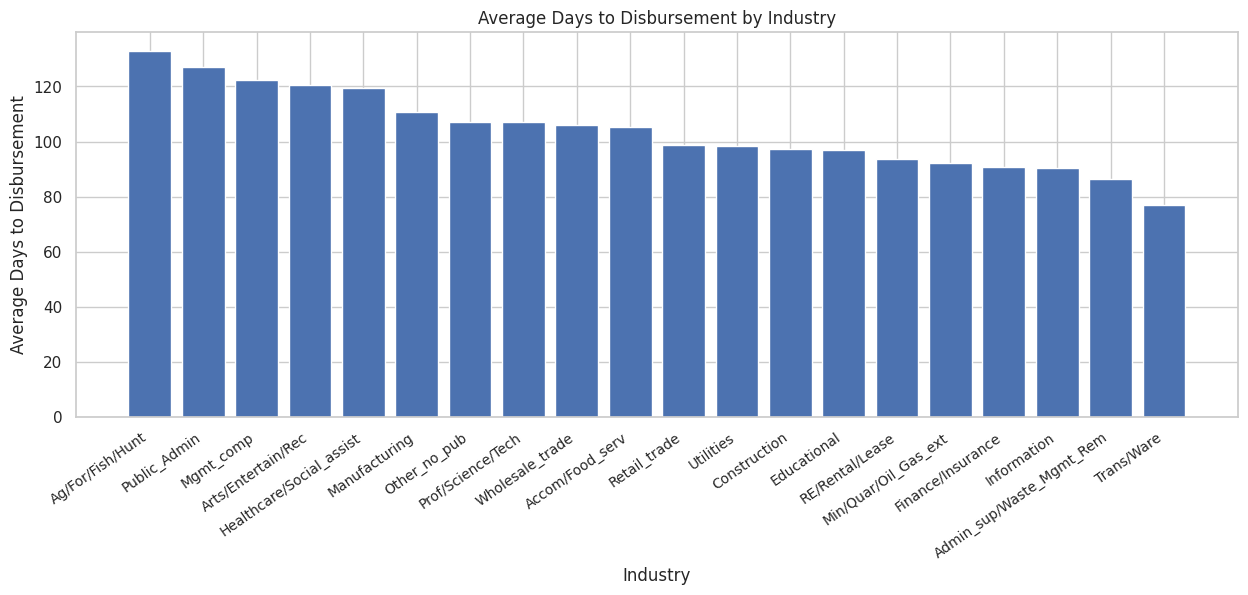

In [173]:
# Calculate the average days to disbursement by industry:
df_industryAve = df.groupby('Industry')['DaysToDisbursement'].mean().sort_values(ascending=False)

# Create a bar chart using Matplotlib
fig2, ax = plt.subplots(figsize=(15, 5))
ax.bar(df_industryAve.index, df_industryAve.values)
ax.set_xticklabels(df_industryAve.index, rotation=35, horizontalalignment='right', fontsize=10)
ax.set_xlabel('Industry')
ax.set_ylabel('Average Days to Disbursement')
ax.set_title('Average Days to Disbursement by Industry')
plt.show()

Industri dengan **rata-rata pencairan pinjaman yang tinggi ternyata sama dengan rata-rata hari yang diperlukan dalam pencairan pinjaman.** Industri tersebut yaitu industri Agriculture/Forestry/Fishing/Hunting; Public Administration; dan Management of companies and enterprise.

*English section: The industries with high average loan disbursement also have high average days to disburse the loans. These industries are Agriculture, forestry, fishing, hunting; Public Administration; and Management of companies and enterprise.*

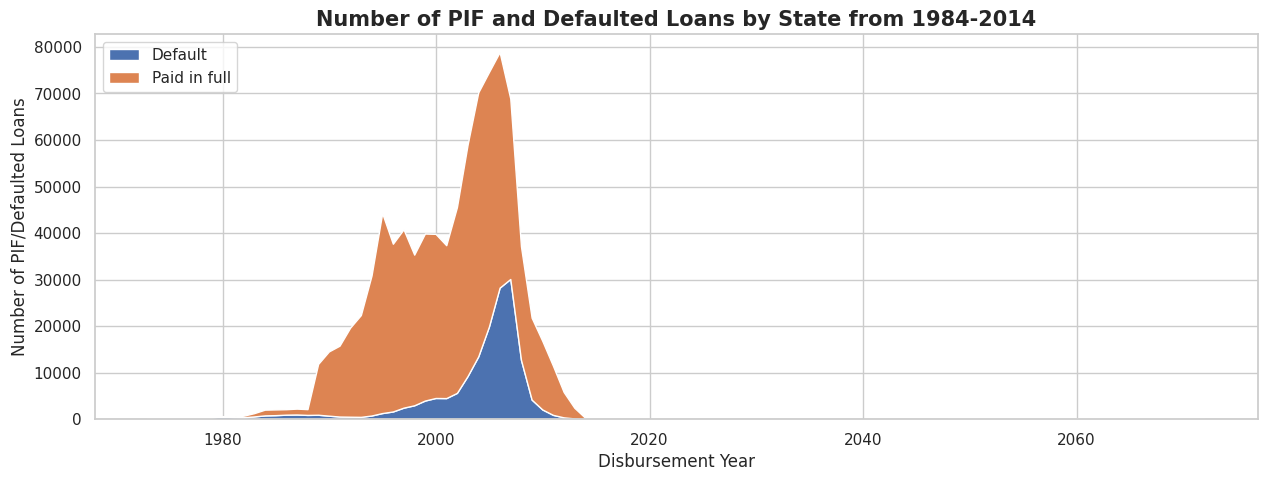

In [174]:
# Paid in full and Defaulted loans by DisbursementFY
# Decided to use a stacked area chart here since it's time series data
fig4, ax4 = plt.subplots(figsize=(15, 5))

stack_data = df.groupby(['DisbursementYear', 'MIS_Status'])['DisbursementYear'].count().unstack('MIS_Status')
x = stack_data.index
y = [stack_data['CHGOFF'], stack_data['P I F']]

ax4.stackplot(x, y, labels=['Default', 'Paid in full'])
ax4.set_title('Number of PIF and Defaulted Loans by State from 1984-2014', fontsize=15, fontweight='bold')
ax4.set_xlabel('Disbursement Year')
ax4.set_ylabel('Number of PIF/Defaulted Loans')
ax4.legend(loc='upper left')

plt.show()

In [175]:
# Check Default percentage by Industry
def_ind = df.groupby(['Industry', 'MIS_Status'])['Industry'].count().unstack('MIS_Status')
def_ind['Default_Percent'] = def_ind['CHGOFF']/(def_ind['CHGOFF'] + def_ind['P I F'])
def_ind.reset_index()

MIS_Status                  Industry  CHGOFF  P I F  Default_Percent
0                    Accom/Food_serv   14882  52629         0.220438
1           Admin_sup/Waste_Mgmt_Rem    7661  24868         0.235513
2                   Ag/For/Fish/Hunt     812   8183         0.090272
3                 Arts/Entertain/Rec    3013  11603         0.206144
4                       Construction   15463  51029         0.232554
5                        Educational    1552   4849         0.242462
6                  Finance/Insurance    2692   6778         0.284266
7           Healthcare/Social_assist    5736  49528         0.103793
8                        Information    2821   8541         0.248284
9                      Manufacturing   10438  57465         0.153719
10                         Mgmt_comp      26    230         0.101562
11              Min/Quar/Oil_Gas_ext     157   1694         0.084819
12                      Other_no_pub   14229  58166         0.196547
13                 Prof/Science/Tech   12957  54965         0.190763
14                      Public_Admin      35    192         0.154185
15                   RE/Rental/Lease    3904   9684         0.287312
16                      Retail_trade   28868  98107         0.227352
17                        Trans/Ware    5939  16469         0.265039
18                         Utilities      94    568         0.141994
19                   Wholesale_trade    9480  39193         0.194769

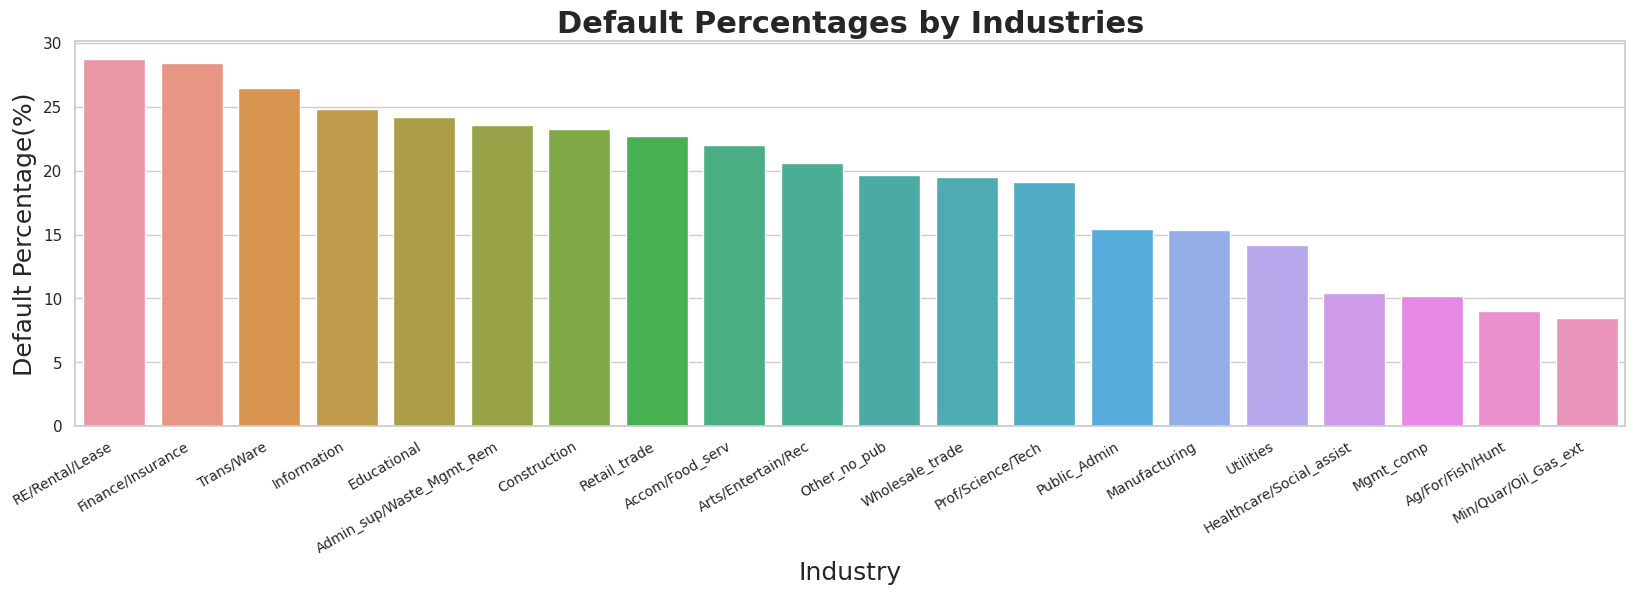

In [176]:
def_ind_desc = ((def_ind['Default_Percent'])*100).sort_values(ascending=False)

# Create a bar chart using Matplotlib
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
sns.barplot(x='Industry', y='Default_Percent', data=def_ind_desc.reset_index())
plt.xticks(rotation=30, horizontalalignment='right', fontsize=10)
plt.title('Default Percentages by Industries', fontsize=22, fontweight='bold')
plt.xlabel('Industry', fontsize=18)
plt.ylabel('Default Percentage(%)', fontsize=18)
plt.show()

**Default percentage tertinggi terhadap sektor industri:** 
- Posisi pertama yaitu sektor **RE/Rental/Lease sebesar 28.73%**
- Posisi kedua yaitu sektor Finance/Insurance sebesar 28.43%
- Posisi ketiga yaitu sektor Transportation/Warehousing sebesar 26.50%.

*English section: The highest default percentage by industry sector are:*
- First place is held by the Real Estate/Rental/Lease sector at 28.73%
- Second place is held by the Finance/Insurance sector at 28.43%
- Third place is held by the Transportation/Warehousing sector at 26.50%.

In [177]:
# Check Default percentage by State
def_state = df.groupby(['State', 'MIS_Status'])['State'].count().unstack('MIS_Status')
def_state['Default_Percent'] = def_state['CHGOFF']/(def_state['CHGOFF'] + def_state['P I F'])
def_state.reset_index()

MIS_Status State  CHGOFF   P I F  Default_Percent
0             AK     281    2122         0.116937
1             AL    1389    6971         0.166148
2             AR    1064    5269         0.168009
3             AZ    3657   13967         0.207501
4             CA   24160  106328         0.185151
5             CO    3671   16927         0.178221
6             CT    1703   10424         0.140430
7             DC     387    1226         0.239926
8             DE     394    1799         0.179663
9             FL   11274   29918         0.273694
10            GA    5337   16935         0.239628
11            HI     550    3057         0.152481
12            IA    1382   10604         0.115301
13            ID    1338    8158         0.140901
14            IL    6709   22885         0.226701
15            IN    2482   11597         0.176291
16            KS    1497    9958         0.130685
17            KY    1497    6223         0.193912
18            LA    1730    7840         0.180773
19            MA    3257   21835         0.129802
20            MD    2614   10645         0.197149
21            ME     583    5354         0.098198
22            MI    4612   15881         0.225052
23            MN    2849   21510         0.116959
24            MO    3152   17500         0.152624
25            MS    1218    6450         0.158842
26            MT     594    8143         0.067987
27            NC    2755   11531         0.192846
28            ND     402    4835         0.076762
29            NE     726    5655         0.113775
30            NH    1289   10734         0.107211
31            NJ    4829   19181         0.201125
32            NM     658    5368         0.109193
33            NV    1863    6159         0.232236
34            NY   11450   45944         0.199498
35            OH    5349   27149         0.164595
36            OK    1544    8401         0.155254
37            OR    1688    9353         0.152885
38            PA    5089   29712         0.146231
39            RI    1016    7932         0.113545
40            SC    1145    4450         0.204647
41            SD     349    4079         0.078817
42            TN    1994    7406         0.212128
43            TX   13265   57136         0.188421
44            UT    3316   15456         0.176646
45            VA    2487   10720         0.188309
46            VT     404    5029         0.074360
47            WA    3268   19987         0.140529
48            WI    2560   18461         0.121783
49            WV     530    2755         0.161339
50            WY     199    2639         0.070120

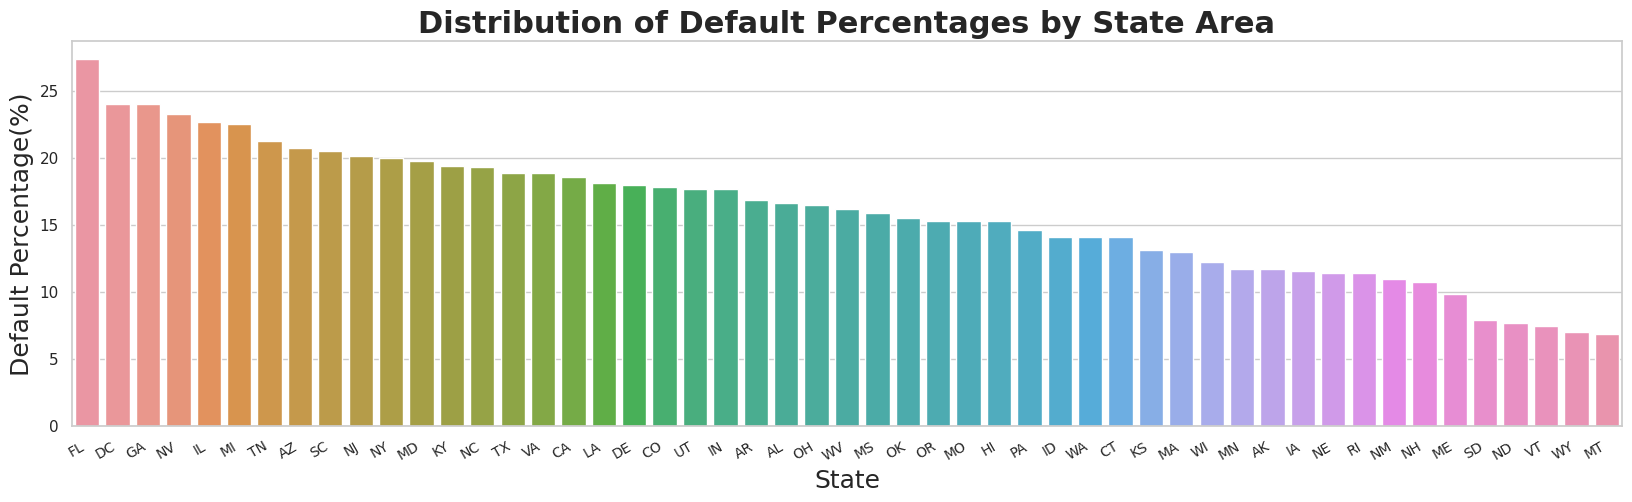

In [178]:
def_state_desc = ((def_state['Default_Percent'])*100).sort_values(ascending=False)

# Create a bar chart using Matplotlib
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
sns.barplot(x='State', y='Default_Percent', data=def_state_desc.reset_index())
plt.xticks(rotation=30, horizontalalignment='right', fontsize=10)
plt.title('Distribution of Default Percentages by State Area', fontsize=22, fontweight='bold')
plt.xlabel('State', fontsize=18)
plt.ylabel('Default Percentage(%)', fontsize=18)
plt.show()

**Default percentage tertinggi terhadap state / negara bagian:**
- Posisi pertama pada **Florida (FL) sebesar 27.37%**
- Posisi kedua pada Washington (DC) sebesar 23.99%
- Posisi ketiga pada Nevada (NV) sebesar 23.22%

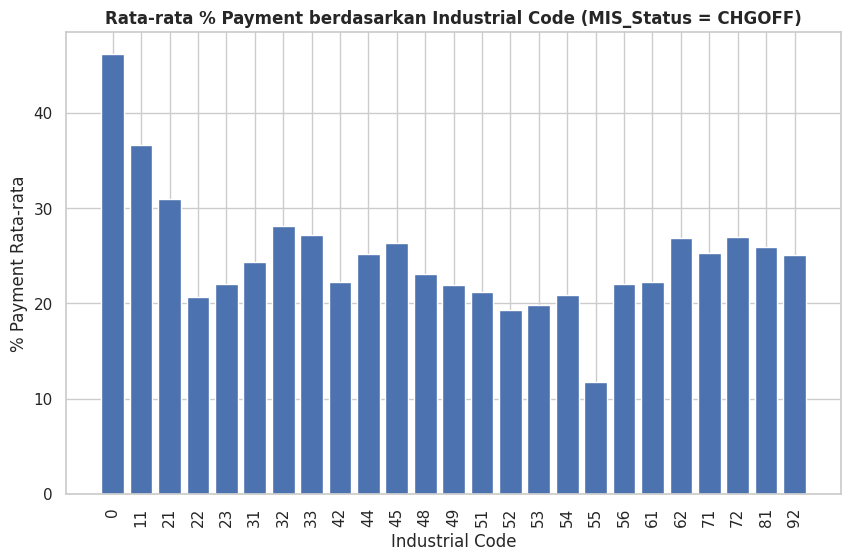

In [179]:
df = df[df['ChgOffPrinGr'] <= df['GrAppv']]

# Filter dataframe berdasarkan MIS_Status = 1
df_mis_status_1 = df[df['MIS_Status'] == "CHGOFF"]

# Menghitung rata-rata '% Payment' berdasarkan 'industrial code'
df_grouped = df_mis_status_1.groupby('IndustrialCode')['%Payment'].mean().reset_index()

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['IndustrialCode'], df_grouped['%Payment'])
plt.xlabel('Industrial Code')
plt.ylabel('% Payment Rata-rata')
plt.title('Rata-rata % Payment berdasarkan Industrial Code (MIS_Status = CHGOFF)', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [180]:
df_grouped

IndustrialCode   %Payment
0               0  46.196671
1              11  36.631616
2              21  30.957329
3              22  20.683021
4              23  21.995697
5              31  24.308211
6              32  28.155476
7              33  27.133240
8              42  22.263833
9              44  25.152963
10             45  26.304535
11             48  23.075619
12             49  21.949231
13             51  21.178386
14             52  19.259668
15             53  19.781436
16             54  20.840397
17             55  11.733646
18             56  22.042975
19             61  22.220915
20             62  26.826834
21             71  25.239025
22             72  27.005473
23             81  25.956444
24             92  25.049768

In [181]:
# Menghitung rata-rata '% Payment' berdasarkan 'industrial code'
df_grouped = df_mis_status_1.groupby('IndustrialCode')['%Payment'].mean().reset_index()

# Membuat DataFrame dari data yang dihasilkan
df_table = pd.DataFrame({'Industial Code': df_grouped['IndustrialCode'],
                         '% Payment Rata-rata': df_grouped['%Payment']})

# Menampilkan tabel
print(df_table)
df_table["% Payment Rata-rata"].sort_values(ascending=False)

   Industial Code  % Payment Rata-rata
0               0            46.196671
1              11            36.631616
2              21            30.957329
3              22            20.683021
4              23            21.995697
5              31            24.308211
6              32            28.155476
7              33            27.133240
8              42            22.263833
9              44            25.152963
10             45            26.304535
11             48            23.075619
12             49            21.949231
13             51            21.178386
14             52            19.259668
15             53            19.781436
16             54            20.840397
17             55            11.733646
18             56            22.042975
19             61            22.220915
20             62            26.826834
21             71            25.239025
22             72            27.005473
23             81            25.956444
24             92        

0     46.196671
1     36.631616
2     30.957329
6     28.155476
7     27.133240
22    27.005473
20    26.826834
10    26.304535
23    25.956444
21    25.239025
9     25.152963
24    25.049768
5     24.308211
11    23.075619
8     22.263833
19    22.220915
18    22.042975
4     21.995697
12    21.949231
13    21.178386
16    20.840397
3     20.683021
15    19.781436
14    19.259668
17    11.733646
Name: % Payment Rata-rata, dtype: float64

In [182]:
# Membuat kolom baru dengan hasil pembagian 'Term' dengan 30
df['TermYear'] = df['Term'] / 12

# Mengubah kolom 'ChgOff Date' dan 'DisbursementDate' menjadi tipe data datetime
df['ChgOffDate'] = pd.to_datetime(df['ChgOffDate'])
df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'])

# Mengambil tahun dari kolom 'ChgOff Date' dan 'DisbursementDate' untuk mendapatkan selisih tahun
df['ChgOffPeriod'] = df['ChgOffDate'].dt.year - df['DisbursementDate'].dt.year

df['YearRatio'] = df['TermYear'] / df['ChgOffPeriod']

In [183]:
# Filter dataframe berdasarkan MIS_Status = 1 dan Disbursement Year <= ChgOff Year
df_filtered = df[(df['MIS_Status'] == "CHGOFF") & (df['DisbursementYear'] <= df['ChgOffYear']) & (df['TermYear'] != 0) & (df['ChgOffPeriod'] != 0)]

# Menampilkan lima baris pertama dari dataframe hasil filter
print(df_filtered.head())

df_filtered.describe()

   LoanNr_ChkDgt                           Name  \
6     1000093009  MIDDLE ATLANTIC SPORTS CO INC   
36    1000554001        PAUL E. & JUDY A. FAATZ   
43    1000653000      LARRY SCHOETTMER FORD INC   
58    1000726007        NEW DIMENSION HOMES INC   
60    1000735003             Mykols Marine Inc.   

                              City State    Zip  \
6                            UNION    NJ   7083   
36                         KINSMAN    OH  44428   
43                       EDINBURGH    IN  46124   
58  CLINTON (CENSUS NAME FOR CLINT    ME   4927   
60                     Spring Lake    MI  49417   

                              Bank BankState   NAICS ApprovalDate  ApprovalFY  \
6      WELLS FARGO BANK NATL ASSOC        SD       0   1980-06-02        1980   
36      CORTLAND SAVINGS & BK. CO.        OH       0   1997-02-28        1997   
43  JPMORGAN CHASE BANK NATL ASSOC        IN       0   1980-06-11        1980   
58     WELLS FARGO BANK NATL ASSOC        SD  236115   2006-02

ApprovalFY           Term          NoEmp      CreateJob  \
count  155375.000000  155375.000000  155375.000000  155375.000000   
mean     2003.828763      57.040367       7.187385      14.111002   
std         5.558574      45.989324      61.905952     329.538593   
min      1972.000000       1.000000       0.000000       0.000000   
25%      2003.000000      30.000000       2.000000       0.000000   
50%      2006.000000      50.000000       3.000000       0.000000   
75%      2007.000000      69.000000       7.000000       2.000000   
max      2014.000000     461.000000    9999.000000    8800.000000   

         RetainedJob  DisbursementGross  BalanceGross  ChgOffPrinGr  \
count  155375.000000       1.553750e+05      155375.0  1.553750e+05   
mean       16.729075       1.323057e+05           0.0  7.583514e+04   
std       329.848100       2.120172e+05           0.0  1.377727e+05   
min         0.000000       4.000000e+03           0.0  0.000000e+00   
25%         0.000000       2.731200e+04           0.0  1.516000e+04   
50%         2.000000       6.117500e+04           0.0  3.352000e+04   
75%         5.000000       1.400000e+05           0.0  7.495900e+04   
max      8800.000000       4.362157e+06           0.0  2.223766e+06   

             GrAppv      SBA_Appv       %Payment  Payment/Month  \
count  1.553750e+05  1.553750e+05  155375.000000   1.553750e+05   
mean   1.188800e+05  8.404719e+04      26.397578   3.841784e+03   
std    2.122366e+05  1.563928e+05      25.789563   1.581948e+04   
min    1.000000e+03  5.000000e+02       0.000000   2.941176e+01   
25%    2.500000e+04  1.250000e+04       4.306667   5.263158e+02   
50%    5.000000e+04  2.500000e+04      18.412000   1.214286e+03   
75%    1.000000e+05  8.000000e+04      42.269000   2.906977e+03   
max    3.500000e+06  3.411950e+06     100.000000   1.500000e+06   

         SBA_Portion  DisbursementYear     ChgOffYear    Mahalanobis  \
count  155375.000000     155375.000000  155375.000000  155375.000000   
mean        0.643153       2003.721216    2008.089519       1.712277   
std         0.163303          5.513550       4.887257       2.052342   
min         0.121900       1973.000000    1988.000000       0.211543   
25%         0.500000       2003.000000    2007.000000       0.888556   
50%         0.500000       2005.000000    2009.000000       1.148410   
75%         0.850000       2007.000000    2011.000000       1.537924   
max         1.000000       2013.000000    2026.000000      52.909266   

       DaysToDisbursement       TermYear   ChgOffPeriod      YearRatio  
count            155375.0  155375.000000  155375.000000  155375.000000  
mean            59.680438       4.753364       4.368302       1.544215  
std            320.540761       3.832444       2.404186       1.570829  
min              -36496.0       0.083333       1.000000       0.002778  
25%                  21.0       2.500000       3.000000       0.500000  
50%                  35.0       4.166667       4.000000       1.083333  
75%                  66.0       5.750000       6.000000       2.154762  
max                3515.0      38.416667      32.000000      25.583333

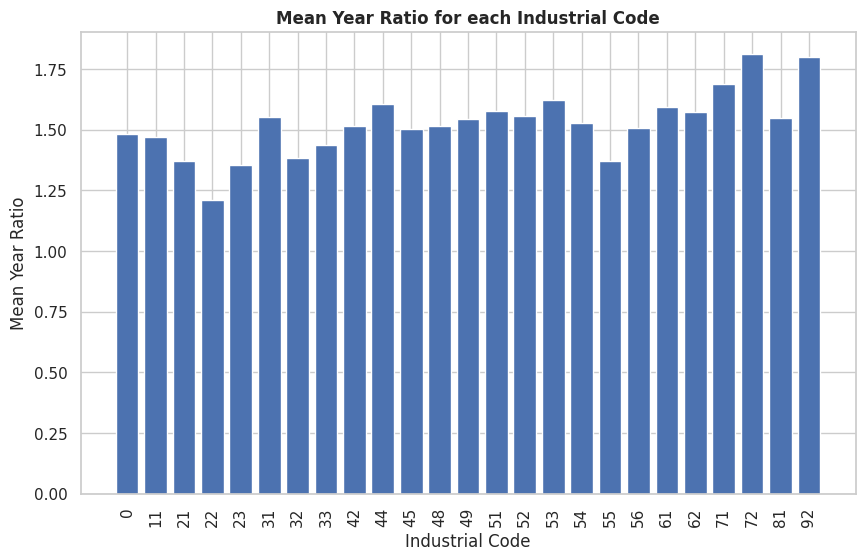

In [184]:
# Menghitung nilai rata-rata 'Year Ratio' untuk setiap 'Industrial Code'
df_grouped = df_filtered.groupby('IndustrialCode')['YearRatio'].mean().reset_index()

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['IndustrialCode'], df_grouped['YearRatio'])
plt.xlabel('Industrial Code')
plt.ylabel('Mean Year Ratio')
plt.title('Mean Year Ratio for each Industrial Code', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

By mean year ratio:
- Accommodation  (72) sebesar 1,81
- Public Administration (92) sebesar 1,79
- Arts, Entertainment  (71) sebesar 1,68

In [185]:
# Filter dataframe berdasarkan MIS_Status = 1 dan Disbursement Year <= ChgOff Year
df_filtered = df[(df['MIS_Status'] == "CHGOFF") & (df['DisbursementYear'] <= df['ChgOffYear']) & (df['TermYear'] != 0) & (df['ChgOffPeriod'] != 0)]

# Menghitung nilai rata-rata 'Year Ratio' untuk setiap 'Industrial Code'
df_grouped = df_filtered.groupby('IndustrialCode')['YearRatio'].mean().reset_index()

# Membuat DataFrame dari data yang dihasilkan
df_table = pd.DataFrame({'Industrial Code': df_grouped['IndustrialCode'],
                         'Mean Year Ratio': df_grouped['YearRatio']})

# Menampilkan tabel
print(df_table)

   Industrial Code  Mean Year Ratio
0                0         1.482155
1               11         1.468288
2               21         1.369972
3               22         1.211441
4               23         1.355495
5               31         1.554073
6               32         1.381152
7               33         1.435141
8               42         1.516985
9               44         1.607108
10              45         1.503139
11              48         1.513459
12              49         1.542106
13              51         1.575343
14              52         1.558171
15              53         1.623818
16              54         1.528202
17              55         1.370336
18              56         1.508458
19              61         1.592256
20              62         1.572919
21              71         1.689940
22              72         1.812667
23              81         1.549950
24              92         1.798877


In [186]:
# Filter dataframe berdasarkan MIS_Status = 0 dan Disbursement Year <= ChgOff Year
df_filtered = df[(df['MIS_Status'] == "P I F") & (df['Payment/Month'] != 0)]

# Menampilkan lima baris pertama dari dataframe hasil filter
print(df_filtered.head())

df_filtered.describe()

  LoanNr_ChkDgt                           Name          City State    Zip  \
0    1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1    1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2    1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3    1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4    1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate  ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120   1997-02-28        1997   
1                1ST SOURCE BANK        IN  722410   1997-02-28        1997   
2        GRANT COUNTY STATE BANK        IN  621210   1997-02-28        1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0   1997-02-28        1997   
4        FLORIDA BUS. DEVEL CORP        FL       0   1997-02-28        1997   

   ...  SBA_Portion  DisbursementYear IndustrialCode  ChgOffYe

ApprovalFY           Term          NoEmp      CreateJob  \
count  739595.000000  739595.000000  739595.000000  739595.000000   
mean     2000.581186     122.288143      12.307211       7.142926   
std         5.811567      79.663416      76.126161     210.082891   
min      1969.000000       0.000000       0.000000       0.000000   
25%      1996.000000      77.000000       2.000000       0.000000   
50%      2001.000000      84.000000       5.000000       0.000000   
75%      2005.000000     180.000000      11.000000       1.000000   
max      2014.000000     569.000000    9999.000000    8800.000000   

         RetainedJob  DisbursementGross   BalanceGross   ChgOffPrinGr  \
count  739595.000000       7.395950e+05  739595.000000  739595.000000   
mean        9.454131       2.163171e+05       3.634307     135.262388   
std       210.572611       2.994850e+05    1590.143596    4346.438915   
min         0.000000       4.000000e+03       0.000000       0.000000   
25%         0.000000       4.892500e+04       0.000000       0.000000   
50%         0.000000       1.000000e+05       0.000000       0.000000   
75%         4.000000       2.560000e+05       0.000000       0.000000   
max      9500.000000       1.144632e+07  996262.000000  990516.000000   

             GrAppv      SBA_Appv       %Payment  Payment/Month  \
count  7.395950e+05  7.395950e+05  739595.000000   7.395950e+05   
mean   2.088139e+05  1.637306e+05      99.608932            inf   
std    2.940482e+05  2.388665e+05       5.439752            NaN   
min    1.000000e+03  5.000000e+02       0.000000   1.190476e+01   
25%    4.000000e+04  2.500000e+04     100.000000   4.958333e+02   
50%    1.000000e+05  7.500000e+04     100.000000   1.000000e+03   
75%    2.500000e+05  1.950000e+05     100.000000   2.013889e+03   
max    5.472000e+06  5.472000e+06     100.000000            inf   

         SBA_Portion  DisbursementYear   ChgOffYear    Mahalanobis  \
count  739595.000000     737746.000000  4913.000000  739595.000000   
mean        0.723713       2000.664291  2007.804804       1.402798   
std         0.172599          5.747984     4.884451       1.598799   
min         0.028140       1973.000000  1988.000000       0.246817   
25%         0.500000       1996.000000  2007.000000       0.632335   
50%         0.750000       2001.000000  2009.000000       0.793779   
75%         0.850000       2005.000000  2011.000000       1.873000   
max         1.000000       2072.000000  2014.000000     139.323977   

       DaysToDisbursement       TermYear  ChgOffPeriod    YearRatio  
count            739595.0  739595.000000   4905.000000  4905.000000  
mean           123.861776      10.190679      4.408767          inf  
std            196.259386       6.638618      4.398331          NaN  
min              -36484.0       0.000000    -84.000000    -0.277027  
25%                  34.0       6.416667      3.000000     0.283333  
50%                  66.0       7.000000      4.000000     0.770833  
75%                 131.0      15.000000      6.000000     1.611111  
max                9132.0      47.416667     24.000000          inf

In [187]:
# Menggantikan nilai inf dengan NaN
df_filtered['Payment/Month'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Menghapus baris dengan nilai NaN dalam kolom 'Payment / Month'
df_filtered.dropna(subset=['Payment/Month'], inplace=True)

<ipython-input-187-9110a99594c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Payment/Month'].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-187-9110a99594c2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['Payment/Month'], inplace=True)


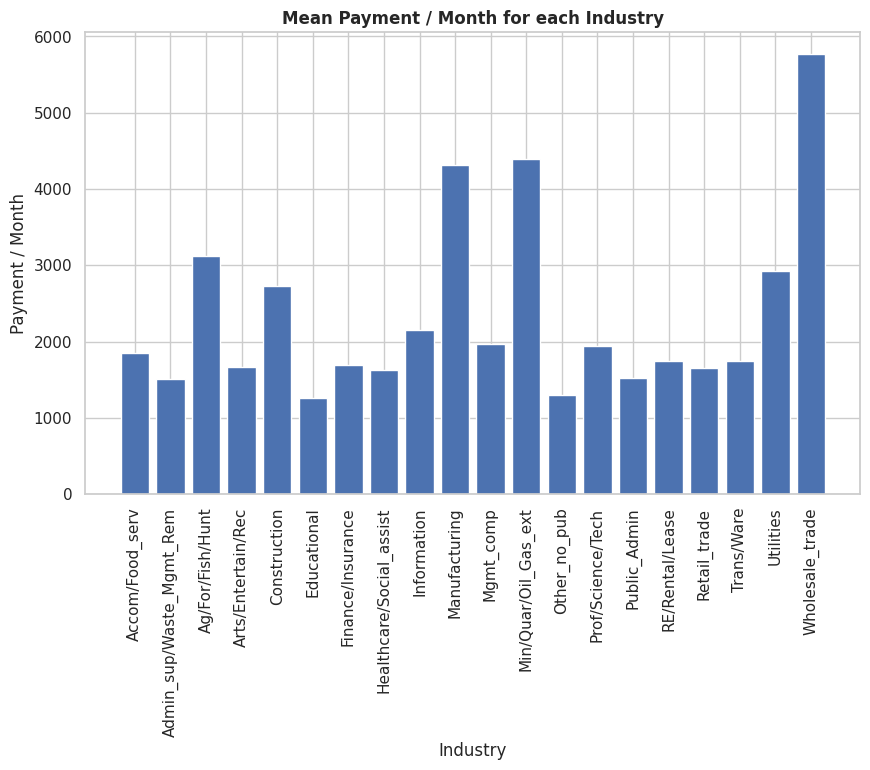

In [188]:
# Menghitung nilai rata-rata 'Year Ratio' untuk setiap 'Industry'
df_grouped = df_filtered.groupby('Industry')['Payment/Month'].mean().reset_index()

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['Industry'], df_grouped['Payment/Month'])
plt.xlabel('Industry')
plt.ylabel('Payment / Month')
plt.title('Mean Payment / Month for each Industry', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

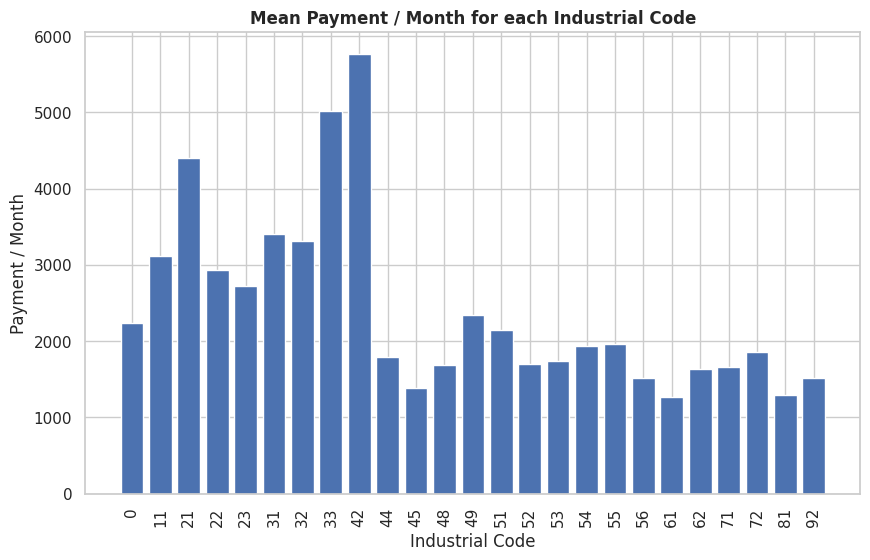

In [189]:
# Menghitung nilai rata-rata 'Year Ratio' untuk setiap 'Industrial Code'
df_grouped = df_filtered.groupby('IndustrialCode')['Payment/Month'].mean().reset_index()

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['IndustrialCode'], df_grouped['Payment/Month'])
plt.xlabel('Industrial Code')
plt.ylabel('Payment / Month')
plt.title('Mean Payment / Month for each Industrial Code', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

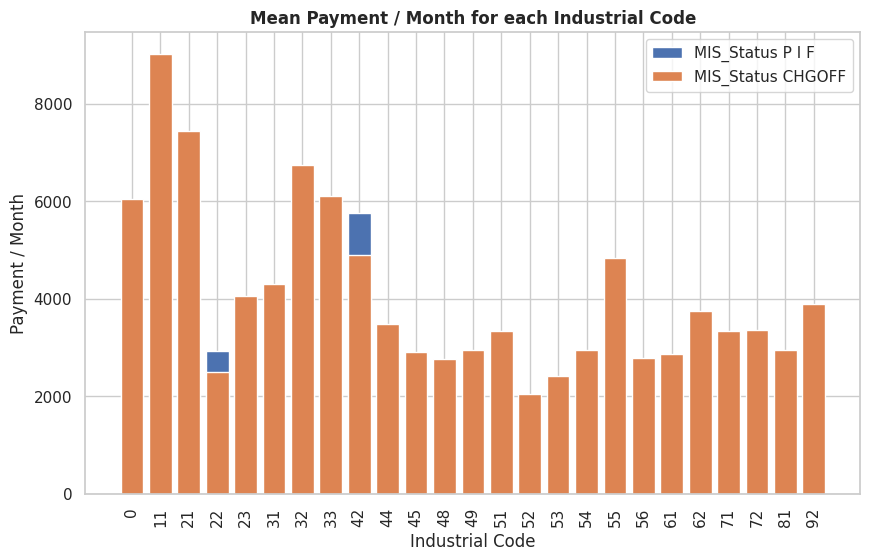

In [190]:
# Filter dataframe berdasarkan MIS_Status = 1 dan Disbursement Year <= ChgOff Year
df_filtered = df[(df['Payment/Month'] != 0)]

# Menggantikan nilai inf dengan NaN
df_filtered['Payment/Month'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Menghapus baris dengan nilai NaN dalam kolom 'Payment / Month'
df_filtered.dropna(subset=['Payment/Month'], inplace=True)

# Menghitung nilai rata-rata 'Payment / Month' untuk setiap 'Industrial Code' dan 'MIS_Status'
df_grouped = df_filtered.groupby(['IndustrialCode', 'MIS_Status'])['Payment/Month'].mean().reset_index()

# Filter data untuk MIS_Status 0
df_mis_0 = df_grouped[df_grouped['MIS_Status'] == "P I F"]

# Filter data untuk MIS_Status 1
df_mis_1 = df_grouped[df_grouped['MIS_Status'] == "CHGOFF"]

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_mis_0['IndustrialCode'], df_mis_0['Payment/Month'], label='MIS_Status P I F')
plt.bar(df_mis_1['IndustrialCode'], df_mis_1['Payment/Month'], label='MIS_Status CHGOFF')
plt.xlabel('Industrial Code')
plt.ylabel('Payment / Month')
plt.title('Mean Payment / Month for each Industrial Code', fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.show()

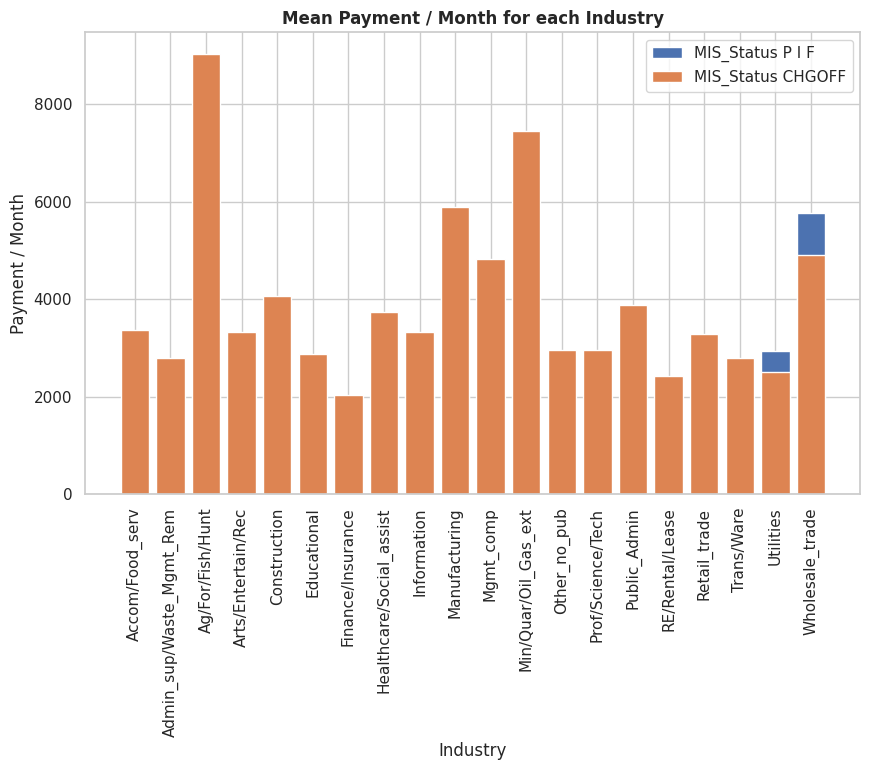

In [191]:
# Filter dataframe berdasarkan MIS_Status = 1 dan Disbursement Year <= ChgOff Year
df_filtered = df[(df['Payment/Month'] != 0)]

# Menggantikan nilai inf dengan NaN
df_filtered['Payment/Month'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Menghapus baris dengan nilai NaN dalam kolom 'Payment / Month'
df_filtered.dropna(subset=['Payment/Month'], inplace=True)

# Menghitung nilai rata-rata 'Payment / Month' untuk setiap 'Industrial Code' dan 'MIS_Status'
df_grouped = df_filtered.groupby(['Industry', 'MIS_Status'])['Payment/Month'].mean().reset_index()

# Filter data untuk MIS_Status 0
df_mis_0 = df_grouped[df_grouped['MIS_Status'] == "P I F"]

# Filter data untuk MIS_Status 1
df_mis_1 = df_grouped[df_grouped['MIS_Status'] == "CHGOFF"]

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_mis_0['Industry'], df_mis_0['Payment/Month'], label='MIS_Status P I F')
plt.bar(df_mis_1['Industry'], df_mis_1['Payment/Month'], label='MIS_Status CHGOFF')
plt.xlabel('Industry')
plt.ylabel('Payment / Month')
plt.title('Mean Payment / Month for each Industry', fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.show()

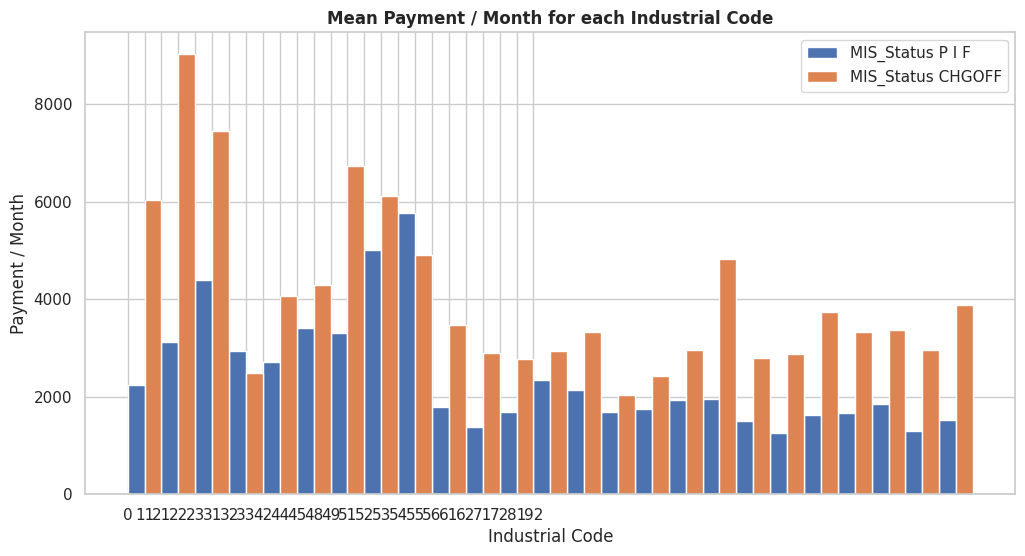

In [192]:
# Filter dataframe berdasarkan MIS_Status = 1 dan Disbursement Year <= ChgOff Year
df_filtered = df[(df['Payment/Month'] != 0)]

# Menggantikan nilai inf dengan NaN
df_filtered['Payment/Month'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Menghapus baris dengan nilai NaN dalam kolom 'Payment / Month'
df_filtered.dropna(subset=['Payment/Month'], inplace=True)

# Menghitung nilai rata-rata 'Payment / Month' untuk setiap 'Industrial Code' dan 'MIS_Status'
df_grouped = df_filtered.groupby(['IndustrialCode', 'MIS_Status'])['Payment/Month'].mean().reset_index()

# Filter data untuk MIS_Status 0
df_mis_0 = df_grouped[df_grouped['MIS_Status'] == "P I F"]

# Filter data untuk MIS_Status 1
df_mis_1 = df_grouped[df_grouped['MIS_Status'] == "CHGOFF"]

# Mengatur lebar bar chart
bar_width = 1

# Mengatur posisi x untuk MIS_Status 0 dan 1
r1 = df_mis_0.index
r2 = [x + bar_width for x in r1]

# Membuat bar chart
plt.figure(figsize=(12, 6))

# Bar chart untuk MIS_Status 0
plt.bar(r1, df_mis_0['Payment/Month'], width=bar_width, label='MIS_Status P I F')

# Bar chart untuk MIS_Status 1
plt.bar(r2, df_mis_1['Payment/Month'], width=bar_width, label='MIS_Status CHGOFF')

# Mengatur label dan judul
plt.xlabel('Industrial Code')
plt.ylabel('Payment / Month')
plt.title('Mean Payment / Month for each Industrial Code', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(df_mis_0))], df_mis_0['IndustrialCode'], rotation=0, ha='center')
plt.legend()

plt.show()

In [193]:
# Menggantikan nilai inf dengan NaN
df['Payment/Month'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Menghapus baris dengan nilai NaN dalam kolom 'Payment / Month'
df.dropna(subset=['Payment/Month'], inplace=True)

# Membuat tabel pivot
df_pivot = df.pivot_table(index='IndustrialCode', columns='MIS_Status', values='Payment/Month', aggfunc='mean').reset_index()


# Mengganti nama kolom 0 dan 1 menjadi 'MIS_Status 0' dan 'MIS_Status 1'
df_pivot.rename(columns={0: 'MIS_Status 0', 1: 'MIS_Status 1'}, inplace=True)

# Menampilkan tabel
print(df_pivot)

MIS_Status IndustrialCode       CHGOFF        P I F
0                       0  6042.249195  2244.888909
1                      11  9029.108502  3120.085562
2                      21  7452.686816  4396.300825
3                      22  2497.759710  2929.481329
4                      23  4068.147023  2723.258650
5                      31  4296.949394  3408.706145
6                      32  6738.247916  3317.962297
7                      33  6113.866456  5021.983687
8                      42  4899.598134  5768.283687
9                      44  3482.221738  1792.624962
10                     45  2908.267212  1383.481740
11                     48  2772.735822  1683.235207
12                     49  2942.383186  2345.405952
13                     51  3332.615747  2145.254540
14                     52  2042.850418  1697.880021
15                     53  2420.835675  1744.230707
16                     54  2951.051288  1939.815477
17                     55  4834.216711  1964.793521
18          

## Pre-processing

### Feature Extraction

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897602 entries, 0 to 899163
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   LoanNr_ChkDgt       897602 non-null  object        
 1   Name                897588 non-null  object        
 2   City                897572 non-null  object        
 3   State               897588 non-null  object        
 4   Zip                 897602 non-null  object        
 5   Bank                896049 non-null  object        
 6   BankState           896042 non-null  object        
 7   NAICS               897602 non-null  object        
 8   ApprovalDate        897602 non-null  datetime64[ns]
 9   ApprovalFY          897602 non-null  int64         
 10  Term                897602 non-null  int64         
 11  NoEmp               897602 non-null  int64         
 12  NewExist            897467 non-null  object        
 13  CreateJob           897602 no

In [197]:
# Add Recession Column
# Recession time (1 des 2007 - 30 jun 2009)
# “Recession” 1 = loans were active, 0 = all other times.
df['Recession'] = np.where((df['DisbursementDate'] >= '2007-12-01') & (df['DisbursementDate'] <= '2009-06-09'), 1, 0)

df.Recession.value_counts()

0    847237
1     50365
Name: Recession, dtype: int64

In [198]:
df[df['Recession']==1]['MIS_Status'].value_counts()

P I F     33621
CHGOFF    16474
Name: MIS_Status, dtype: int64

In [199]:
df.sample(3)

LoanNr_ChkDgt                       Name      City State    Zip  \
778222    8236754000  LAUGHING DOG BREWING INC.     SAGLE    ID  83860   
542021    5312813008            2 M COMPANY INC  BILLINGS    MT  59101   
20950     1155075000  Unixx International, Inc.   HIALEAH    FL  33016   

                                  Bank BankState   NAICS ApprovalDate  \
778222  MOUNTAIN W. BANK A DIVISION OF        ID  312120   2004-12-06   
542021  U.S. BANK NATIONAL ASSOCIATION        MT  421830   1992-11-13   
20950       BANK OF AMERICA NATL ASSOC        NC  425120   2005-01-11   

        ApprovalFY  ...  DisbursementYear  IndustrialCode ChgOffYear  \
778222        2005  ...            2005.0              31        NaN   
542021        1993  ...            1993.0              42        NaN   
20950         2005  ...            2005.0              42     2011.0   

        Mahalanobis         Industry DaysToDisbursement  TermYear  \
778222     0.489835    Manufacturing                115  7.166667   
542021     1.445240  Wholesale_trade                 79  7.000000   
20950      4.359774  Wholesale_trade                 79  1.000000   

       ChgOffPeriod YearRatio Recession  
778222          NaN       NaN         0  
542021          NaN       NaN         0  
20950           6.0  0.166667         0  

[3 rows x 40 columns]

In [200]:
default_rates = df.groupby(["State", "MIS_Status"]).agg({"State": "count"}).unstack("MIS_Status")["State"]
default_rates["default_rate"] = round(default_rates['CHGOFF'] / (default_rates['CHGOFF'] + default_rates['P I F']), 2)

default_rates.sort_values(by="default_rate", inplace=True)
default_rates

MIS_Status  CHGOFF   P I F  default_rate
State                                   
WY             195    2639          0.07
VT             395    5029          0.07
MT             587    8143          0.07
SD             348    4079          0.08
ND             394    4835          0.08
ME             574    5354          0.10
RI             998    7930          0.11
NM             647    5368          0.11
NH            1267   10733          0.11
NE             718    5655          0.11
IA            1366   10603          0.11
AK             273    2122          0.11
WI            2530   18461          0.12
MN            2828   21507          0.12
KS            1477    9957          0.13
MA            3220   21832          0.13
ID            1331    8156          0.14
WA            3244   19987          0.14
PA            5008   29707          0.14
CT            1683   10423          0.14
OR            1676    9352          0.15
OK            1528    8399          0.15
HI             542    3056          0.15
MO            3122   17497          0.15
MS            1205    6450          0.16
OH            5306   27144          0.16
AR            1041    5269          0.16
WV             523    2754          0.16
AL            1376    6970          0.16
IN            2452   11597          0.17
UT            3301   15452          0.18
DE             391    1799          0.18
CO            3632   16926          0.18
CA           24007  106320          0.18
LA            1697    7838          0.18
VA            2473   10716          0.19
TX           13155   57133          0.19
KY            1475    6222          0.19
NC            2735   11531          0.19
SC            1137    4450          0.20
NJ            4763   19175          0.20
NY           11327   45937          0.20
MD            2586   10644          0.20
TN            1979    7406          0.21
AZ            3632   13967          0.21
MI            4569   15880          0.22
NV            1843    6158          0.23
IL            6645   22879          0.23
DC             386    1226          0.24
GA            5308   16932          0.24
FL           11195   29913          0.27

In [201]:
# Kategorisasi State berdasarkan default rate
low_risk_states = list(default_rates[default_rates["default_rate"] < 0.10].index)
medium_risk_states = list(default_rates[(default_rates["default_rate"] >= 0.10) & (default_rates["default_rate"] < 0.20)].index)
high_risk_states = list(default_rates[default_rates["default_rate"] >= 0.20].index)

# Tambahkan kolom low_risk, medium_risk, dan high_risk pada DataFrame
df["low_risk"] = df["State"].apply(lambda x: 1 if x in low_risk_states else 0)
df["medium_risk"] = df["State"].apply(lambda x: 1 if x in medium_risk_states else 0)
df["high_risk"] = df["State"].apply(lambda x: 1 if x in high_risk_states else 0)

df.head()

LoanNr_ChkDgt                           Name          City State    Zip  \
0    1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1    1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2    1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3    1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4    1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate  ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120   1997-02-28        1997   
1                1ST SOURCE BANK        IN  722410   1997-02-28        1997   
2        GRANT COUNTY STATE BANK        IN  621210   1997-02-28        1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0   1997-02-28        1997   
4        FLORIDA BUS. DEVEL CORP        FL       0   1997-02-28        1997   

   ...  Mahalanobis                  Industry DaysToDisbursement  TermYear  \
0  ...     0.532278              Retail_trade                730       7.0   
1  ...     0.747659           Accom/Food_serv                 92       5.0   
2  ...     0.957117  Healthcare/Social_assist                306      15.0   
3  ...     0.753064                       NaN                122       5.0   
4  ...     1.955662                       NaN                 75      20.0   

   ChgOffPeriod YearRatio Recession low_risk medium_risk high_risk  
0           NaN       NaN         0        0           1         0  
1           NaN       NaN         0        0           1         0  
2           NaN       NaN         0        0           1         0  
3           NaN       NaN         0        0           1         0  
4           NaN       NaN         0        0           0         1  

[5 rows x 43 columns]

### Data Cleaning

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897602 entries, 0 to 899163
Data columns (total 43 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   LoanNr_ChkDgt       897602 non-null  object        
 1   Name                897588 non-null  object        
 2   City                897572 non-null  object        
 3   State               897588 non-null  object        
 4   Zip                 897602 non-null  object        
 5   Bank                896049 non-null  object        
 6   BankState           896042 non-null  object        
 7   NAICS               897602 non-null  object        
 8   ApprovalDate        897602 non-null  datetime64[ns]
 9   ApprovalFY          897602 non-null  int64         
 10  Term                897602 non-null  int64         
 11  NoEmp               897602 non-null  int64         
 12  NewExist            897467 non-null  object        
 13  CreateJob           897602 no

In [203]:
# Melihat apakah ada kolom inputan yang kosong
df.isnull().sum()

LoanNr_ChkDgt              0
Name                      14
City                      30
State                     14
Zip                        0
Bank                    1553
BankState               1560
NAICS                      0
ApprovalDate               0
ApprovalFY                 0
Term                       0
NoEmp                      0
NewExist                 135
CreateJob                  0
RetainedJob                0
FranchiseCode              0
UrbanRural                 0
RevLineCr               4525
LowDoc                  2580
ChgOffDate            736419
DisbursementDate        2353
DisbursementGross          0
BalanceGross               0
MIS_Status              1987
ChgOffPrinGr               0
GrAppv                     0
SBA_Appv                   0
%Payment                   0
Payment/Month              0
SBA_Portion                0
DisbursementYear        2353
IndustrialCode             0
ChgOffYear            736419
Mahalanobis                0
Industry      

In [204]:
# Menghapus missing value pada baris kolom di bawah ini
df.dropna(subset=['Name', 'City', 'State', 'Bank', 'BankState', 'NewExist', 'RevLineCr', 
                  'LowDoc', 'DisbursementDate', 'DisbursementYear'], inplace=True)

In [205]:
df.shape

(886494, 43)

In [206]:
df.isna().sum()

LoanNr_ChkDgt              0
Name                       0
City                       0
State                      0
Zip                        0
Bank                       0
BankState                  0
NAICS                      0
ApprovalDate               0
ApprovalFY                 0
Term                       0
NoEmp                      0
NewExist                   0
CreateJob                  0
RetainedJob                0
FranchiseCode              0
UrbanRural                 0
RevLineCr                  0
LowDoc                     0
ChgOffDate            726930
DisbursementDate           0
DisbursementGross          0
BalanceGross               0
MIS_Status              1785
ChgOffPrinGr               0
GrAppv                     0
SBA_Appv                   0
%Payment                   0
Payment/Month              0
SBA_Portion                0
DisbursementYear           0
IndustrialCode             0
ChgOffYear            726930
Mahalanobis                0
Industry      

In [207]:
# Check missing value ChgOff_Year feature  (mvr=missing value rates)
mvr_chgoffyear = df['ChgOffYear'].isna().sum() / df['ChgOffYear'].shape[0]
print(f"Missing value rates of charge off year feature: {(mvr_chgoffyear)*100:.2f}%")


Missing value rates of charge off year feature: 82.00%


In [208]:
# Menghapus kolom karena lebih dari 50% data yang null
df.drop(columns=['ChgOffDate', 'ChgOffYear', 'Industry', 'ChgOffPeriod', 'YearRatio'], inplace=True)

In [209]:
df.shape

(886494, 38)

In [210]:
df.isnull().sum()

LoanNr_ChkDgt            0
Name                     0
City                     0
State                    0
Zip                      0
Bank                     0
BankState                0
NAICS                    0
ApprovalDate             0
ApprovalFY               0
Term                     0
NoEmp                    0
NewExist                 0
CreateJob                0
RetainedJob              0
FranchiseCode            0
UrbanRural               0
RevLineCr                0
LowDoc                   0
DisbursementDate         0
DisbursementGross        0
BalanceGross             0
MIS_Status            1785
ChgOffPrinGr             0
GrAppv                   0
SBA_Appv                 0
%Payment                 0
Payment/Month            0
SBA_Portion              0
DisbursementYear         0
IndustrialCode           0
Mahalanobis              0
DaysToDisbursement       0
TermYear                 0
Recession                0
low_risk                 0
medium_risk              0
h

In [211]:
# Mengecek count kolom MIS_Status
df['MIS_Status'].value_counts()

P I F     730115
CHGOFF    154594
Name: MIS_Status, dtype: int64

In [212]:
# Mengisi missing value MIS_Status menjadi indikator 1 (ChgOff)
df['MIS_Status'] = df['MIS_Status'].fillna('CHGOFF')

# Mengecek count kolom MIS_Status
df['MIS_Status'].value_counts()

P I F     730115
CHGOFF    156379
Name: MIS_Status, dtype: int64

In [213]:
# Mengecek handling missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886494 entries, 0 to 899163
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   LoanNr_ChkDgt       886494 non-null  object        
 1   Name                886494 non-null  object        
 2   City                886494 non-null  object        
 3   State               886494 non-null  object        
 4   Zip                 886494 non-null  object        
 5   Bank                886494 non-null  object        
 6   BankState           886494 non-null  object        
 7   NAICS               886494 non-null  object        
 8   ApprovalDate        886494 non-null  datetime64[ns]
 9   ApprovalFY          886494 non-null  int64         
 10  Term                886494 non-null  int64         
 11  NoEmp               886494 non-null  int64         
 12  NewExist            886494 non-null  object        
 13  CreateJob           886494 no

### Handling Duplicated Data

In [214]:
# Checking for duplicates
df.duplicated().any()

False

### Feature Encoding

In [215]:
# Replace wrong values in LowDoc feature
df = df[(df["LowDoc"] == "Y") | (df["LowDoc"] == "N")]
df["LowDoc"] = np.where(df["LowDoc"] == "Y", 1, 0)

# Replace wrong values in RevLineCr
df = df[(df["RevLineCr"] == "Y") | (df["RevLineCr"] == "N")]
df["RevLineCr"] = np.where(df["RevLineCr"] == "Y", 1, 0)

# Replace wrong values in New Exist feature
df = df[(df["NewExist"] == 1.0) | (df["NewExist"] == 2.0)]
df["NewExist"] = np.where(df["NewExist"] == 2.0, 0, 1)

In [216]:
df[["LowDoc", "RevLineCr", "NewExist"]].sample(3)

LowDoc  RevLineCr  NewExist
504237       0          0         0
188668       0          0         1
241617       0          0         0

In [217]:
df.shape

(610640, 38)

In [218]:
# Label Encoding MIS_Status
df["MIS_Status"] = np.where(df["MIS_Status"] == "CHGOFF", 1, 0)

In [219]:
#categorical_features = ["UrbanRural", "RevLineCr", "LowDoc"]

# Add encoded columns
# df[["RevLineCr", "LowDoc", "UrbanRural_0", "UrbanRural_1", "UrbanRural_2"]] = pd.get_dummies(df[categorical_features])


In [220]:
#df[["UrbanRural_0", "UrbanRural_1", "UrbanRural_2"]].head()

In [221]:
# Drop UrbanRural
#df.drop('UrbanRural', axis=1, inplace=True)

In [222]:
df.dtypes

LoanNr_ChkDgt                 object
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                         object
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                       int64
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                 object
UrbanRural                    object
RevLineCr                      int64
LowDoc                         int64
DisbursementDate      datetime64[ns]
DisbursementGross              int64
BalanceGross                   int64
MIS_Status                     int64
ChgOffPrinGr                   int64
GrAppv                         int64
SBA_Appv                       int64
%Payment                     float64
P

### Feature Selection

<ipython-input-223-aaf317e6b16c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


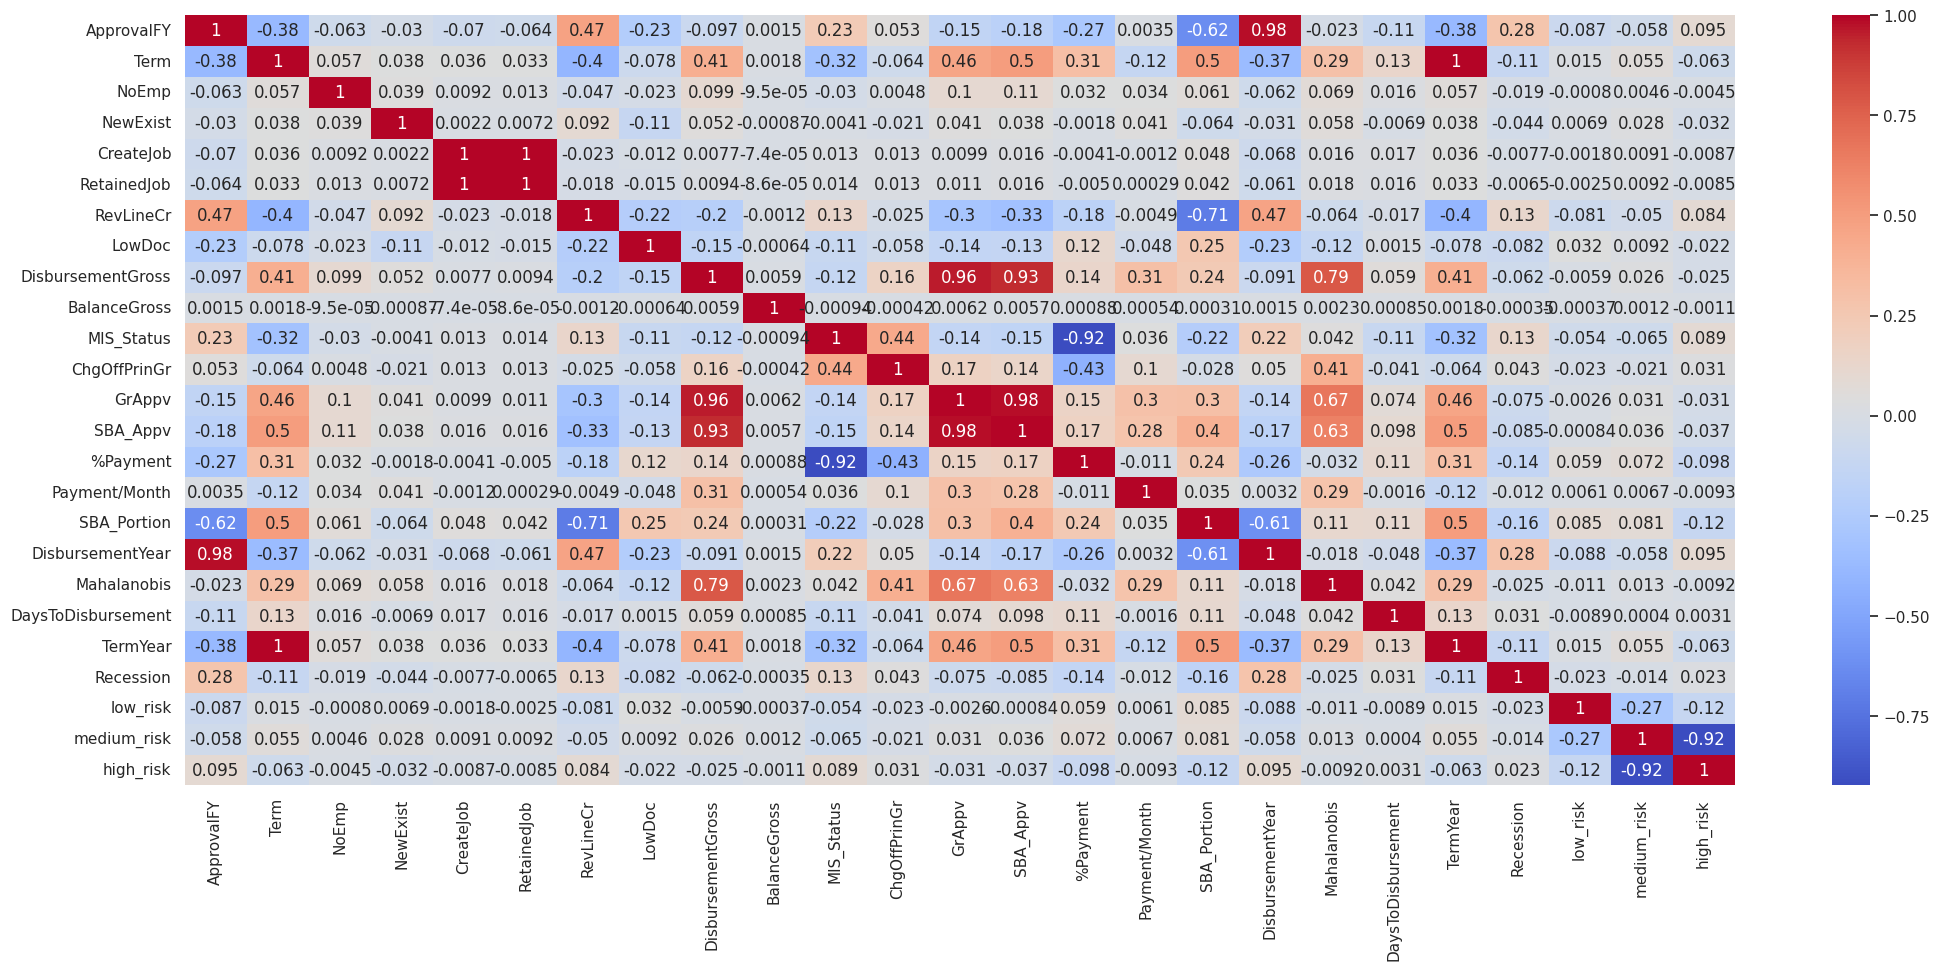

In [223]:
# Menghitung matriks korelasi untuk menentukan hubungan antara label dan feature
corr_matrix = df.corr()

# Mengatur Ukuran Gambar
plt.figure(figsize=(25,10))

# Membuat HeatMap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 12})

# Mengatur ukuran font
sns.set(font_scale=1.2)

# Menunjukan Plot
plt.show()

In [224]:
# # Drop categorical column that has many unique values
# categorical_drop = ["LoanNr_ChkDgt", "Name", "City", "State", "Bank", "Zip", "BankState", "ChgOffPrinGr",
#                     "NAICS", "ApprovalDate", "ApprovalFY", "FranchiseCode", "DisbursementDate", 
#                     "DisbursementYear", '%Payment','Payment/Month', 'IndustrialCode', 'Mahalanobis', 'DaysToDisbursement',
#                     'RevLineCr', 'LowDoc', 'UrbanRural']
# df.drop(categorical_drop, axis=1, inplace=True)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610640 entries, 0 to 899163
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   LoanNr_ChkDgt       610640 non-null  object        
 1   Name                610640 non-null  object        
 2   City                610640 non-null  object        
 3   State               610640 non-null  object        
 4   Zip                 610640 non-null  object        
 5   Bank                610640 non-null  object        
 6   BankState           610640 non-null  object        
 7   NAICS               610640 non-null  object        
 8   ApprovalDate        610640 non-null  datetime64[ns]
 9   ApprovalFY          610640 non-null  int64         
 10  Term                610640 non-null  int64         
 11  NoEmp               610640 non-null  int64         
 12  NewExist            610640 non-null  int64         
 13  CreateJob           610640 no

In [226]:
# Drop categorical column that has many unique values
categorical_drop = ['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 
                    'FranchiseCode', 'UrbanRural', 'LowDoc', 'DisbursementDate','ChgOffPrinGr', 
                    '%Payment', 'DisbursementYear', 'IndustrialCode', 'Mahalanobis', 'DaysToDisbursement', 'TermYear' ]
df.drop(categorical_drop, axis=1, inplace=True)

In [227]:
# Drop SBA_Appv, DisbursementGross, dan BalanceGross
df.drop(['SBA_Appv', 'DisbursementGross', 'BalanceGross', 'GrAppv'], axis=1, inplace=True)

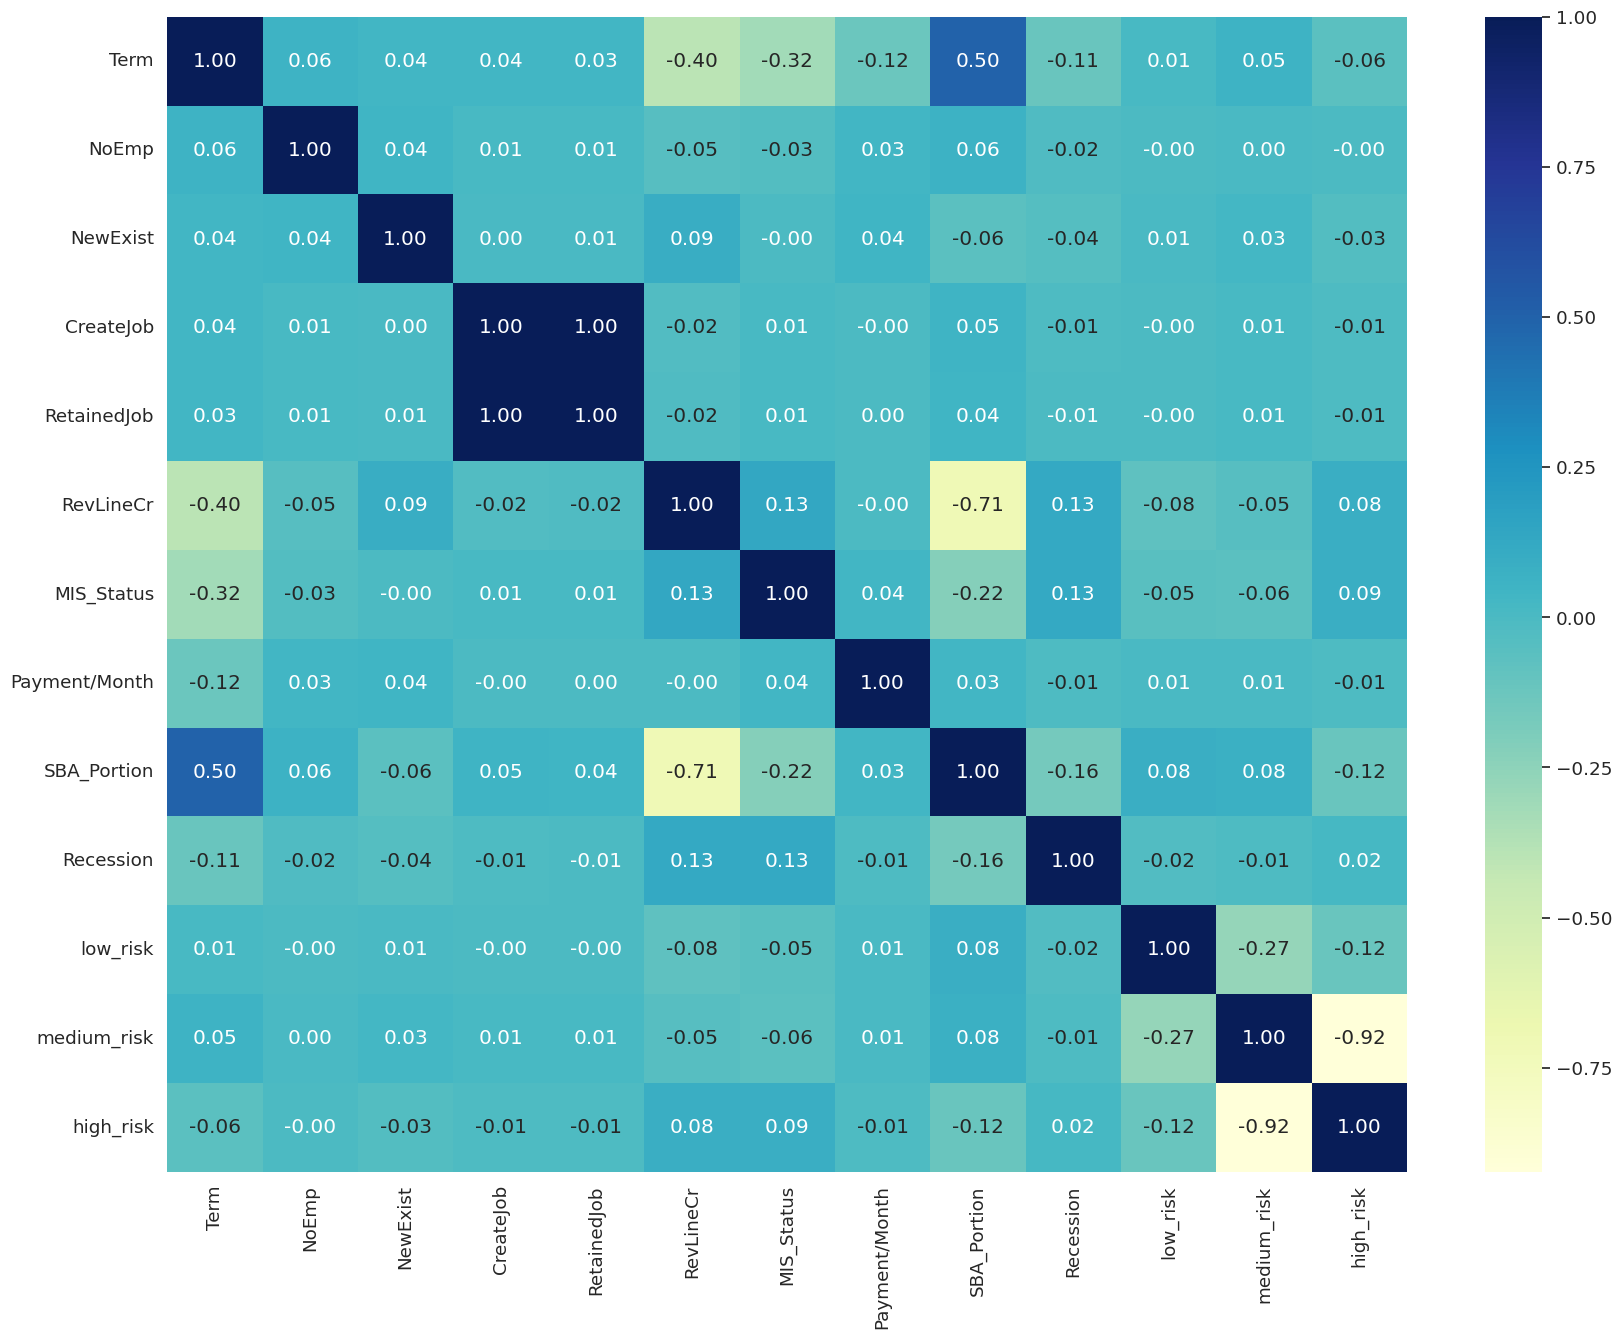

In [228]:
# Correlation matrix (Numeric Features)
corr_matrix = df.corr()
fig, ax = plt.subplots(1,
                       1,
                       figsize=(20, 15))
sns.heatmap(data=corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="YlGnBu");

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610640 entries, 0 to 899163
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Term           610640 non-null  int64  
 1   NoEmp          610640 non-null  int64  
 2   NewExist       610640 non-null  int64  
 3   CreateJob      610640 non-null  int64  
 4   RetainedJob    610640 non-null  int64  
 5   RevLineCr      610640 non-null  int64  
 6   MIS_Status     610640 non-null  int64  
 7   Payment/Month  610640 non-null  float64
 8   SBA_Portion    610640 non-null  float64
 9   Recession      610640 non-null  int64  
 10  low_risk       610640 non-null  int64  
 11  medium_risk    610640 non-null  int64  
 12  high_risk      610640 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 65.2 MB


In [230]:
# Drop RetainedJob
df.drop(['RetainedJob'], axis=1, inplace=True)

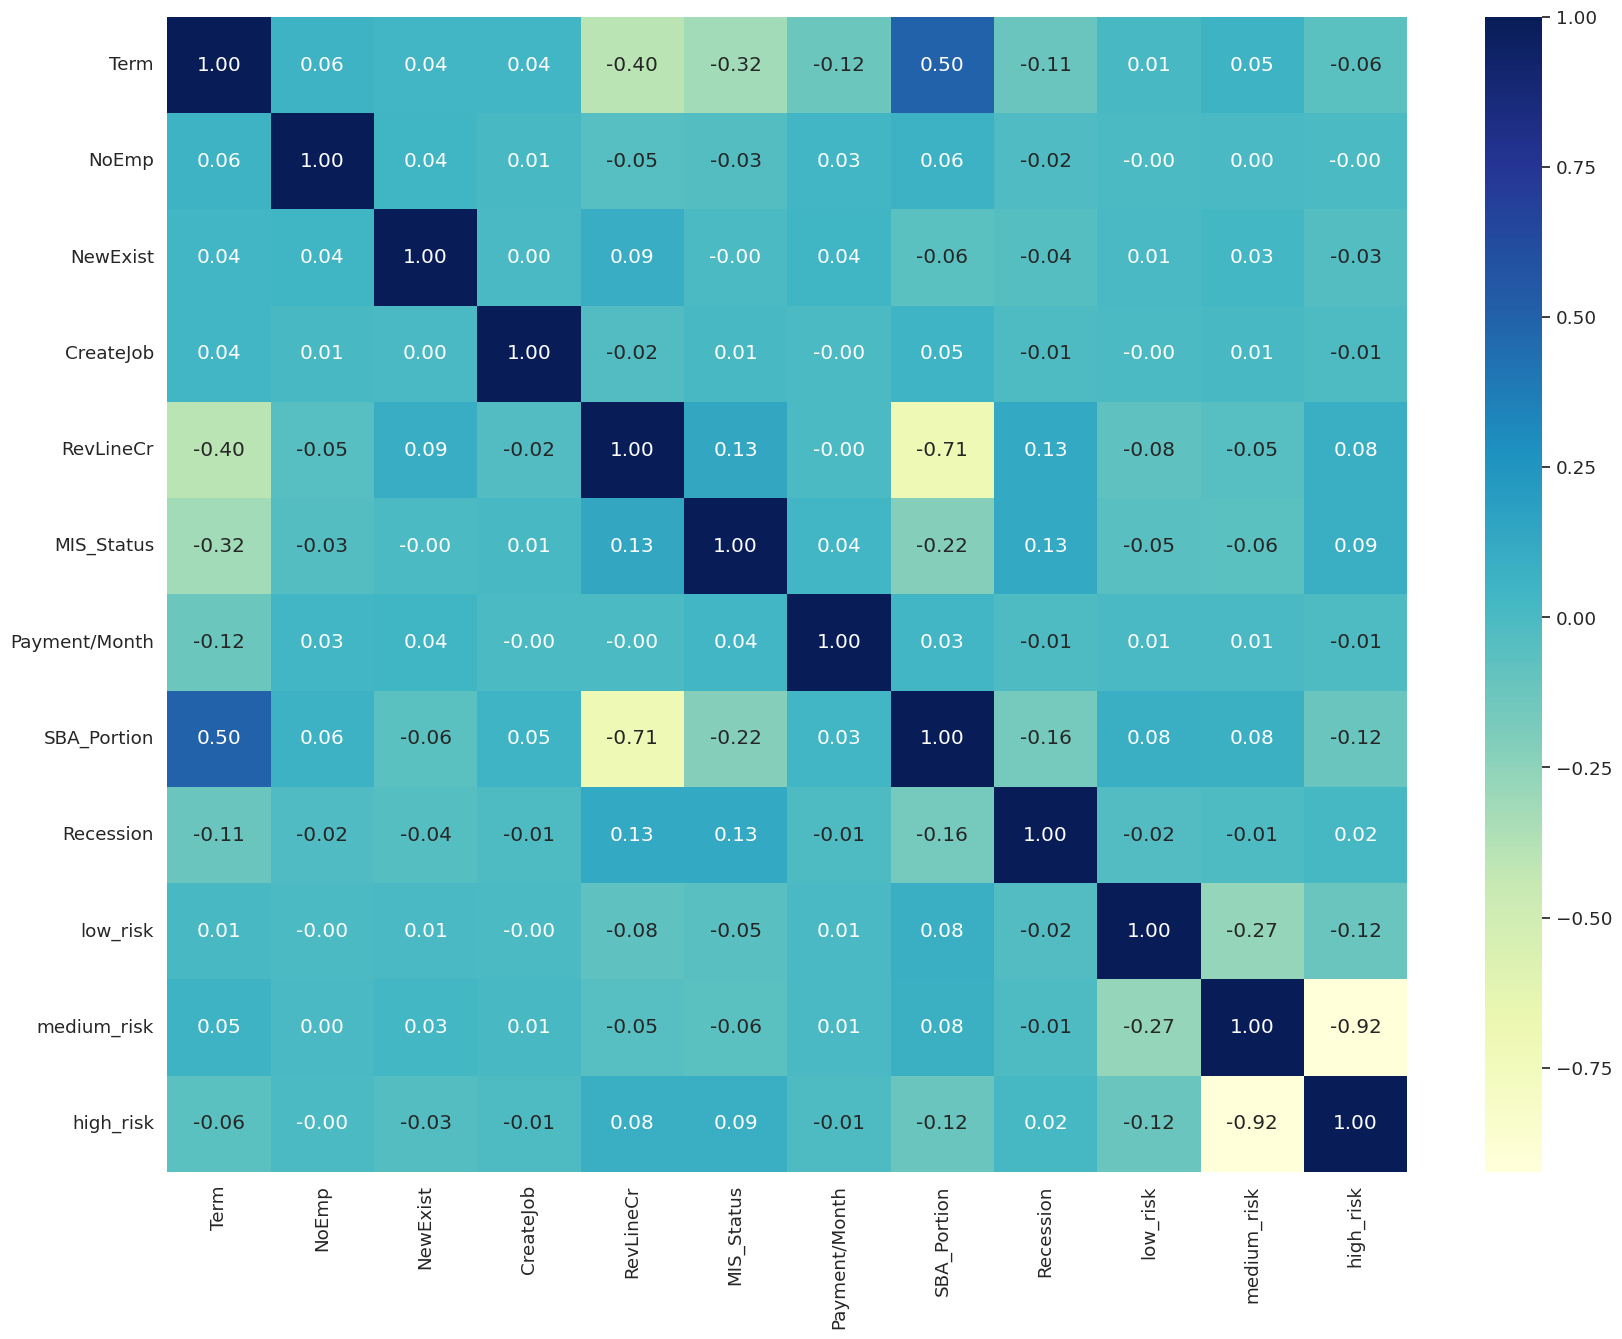

In [231]:
# Correlation matrix (Numeric Features)
corr_matrix = df.corr()
fig, ax = plt.subplots(1,
                       1,
                       figsize=(20, 15))
sns.heatmap(data=corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="YlGnBu");

### Split Data

In [232]:
# Split into X and y

X = df.drop("MIS_Status", axis=1)
y = df["MIS_Status"]

In [233]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
# Combine to DataFrame train and test

# Data training
X_train["MIS_Status"] = y_train
df_train = X_train


# Data testing
#X_test["MIS_Status"] = y_test
#df_test = X_test

### Handling Outliers

In [235]:
# numeric_new = ["GrAppv", "Term", "NoEmp", "RetainedJob", "CreateJob"]
numeric_new = ["Term", "NoEmp", "CreateJob", 'Payment/Month']

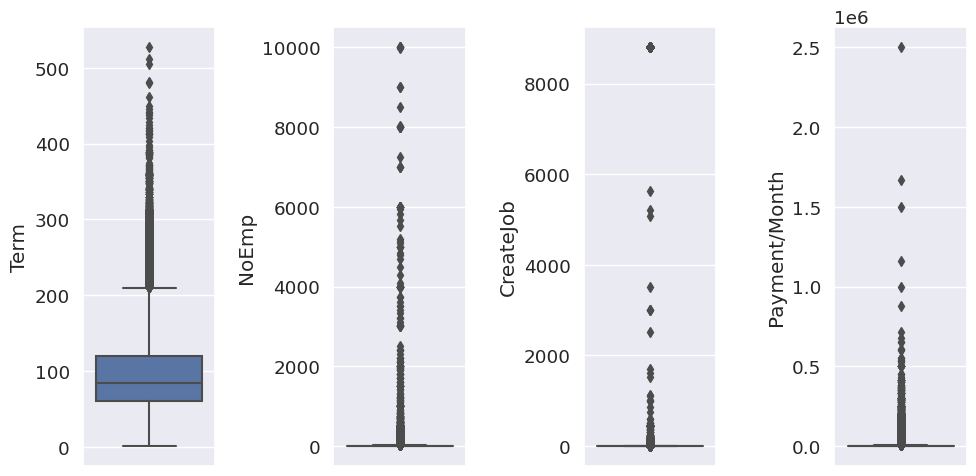

In [236]:
# Boxplot (Outliers) (Sebelum handling outliers)
fig, ax = plt.subplots(nrows=1, 
                       ncols=4,
                       figsize=(10, 5))

for num, axes in zip(numeric_new, ax.flatten()):
    sns.boxplot(y=df_train[num], ax=axes)
    plt.tight_layout()

In [237]:
def handling_outliers(arr, df_train):
    
    '''Execute the outliers in a series by using Q1, Q3, and IQR (Interquartile). The result should be replaced to old dataframe variable'''
    
    for col in arr:
        print(f"Jumlah baris sebelum handling outliers fitur {col}: {len(X_train)}")
        print(f"Shape of dataframe befor clean the outliers: {X_train.shape}")
        Q1 = X_train[col].quantile(0.25) # First Quartile 
        Q2 = X_train[col].quantile(0.5) # Second Quartile
        Q3 = X_train[col].quantile(0.75) # Third Quartile

        IQR = Q3-Q1 # Interquartile
        lower_thres = Q1 - (1.5 * IQR) 
        higher_thres = Q3 + (1.5 * IQR)

        filter_entries = ((df_train[col] >= lower_thres) & (df_train[col] <= higher_thres))
        outliers = df_train[(df_train[col] <= lower_thres) | (df_train[col] >= higher_thres)]
        
        print(f"Jumlah Outliers: {len(outliers)} (in percent (%) {(len(outliers)/len(df_train))*100:.2f})")
        
        df_train = df_train[filter_entries]
    return df_train

In [238]:
df_train_clean = handling_outliers(numeric_new, df_train)
df_train_clean.shape, X_test.shape

Jumlah baris sebelum handling outliers fitur Term: 488512
Shape of dataframe befor clean the outliers: (488512, 12)
Jumlah Outliers: 77129 (in percent (%) 15.79)
Jumlah baris sebelum handling outliers fitur NoEmp: 488512
Shape of dataframe befor clean the outliers: (488512, 12)
Jumlah Outliers: 34627 (in percent (%) 8.41)
Jumlah baris sebelum handling outliers fitur CreateJob: 488512
Shape of dataframe befor clean the outliers: (488512, 12)
Jumlah Outliers: 34560 (in percent (%) 9.17)
Jumlah baris sebelum handling outliers fitur Payment/Month: 488512
Shape of dataframe befor clean the outliers: (488512, 12)
Jumlah Outliers: 26732 (in percent (%) 7.81)


((315584, 12), (122128, 11))

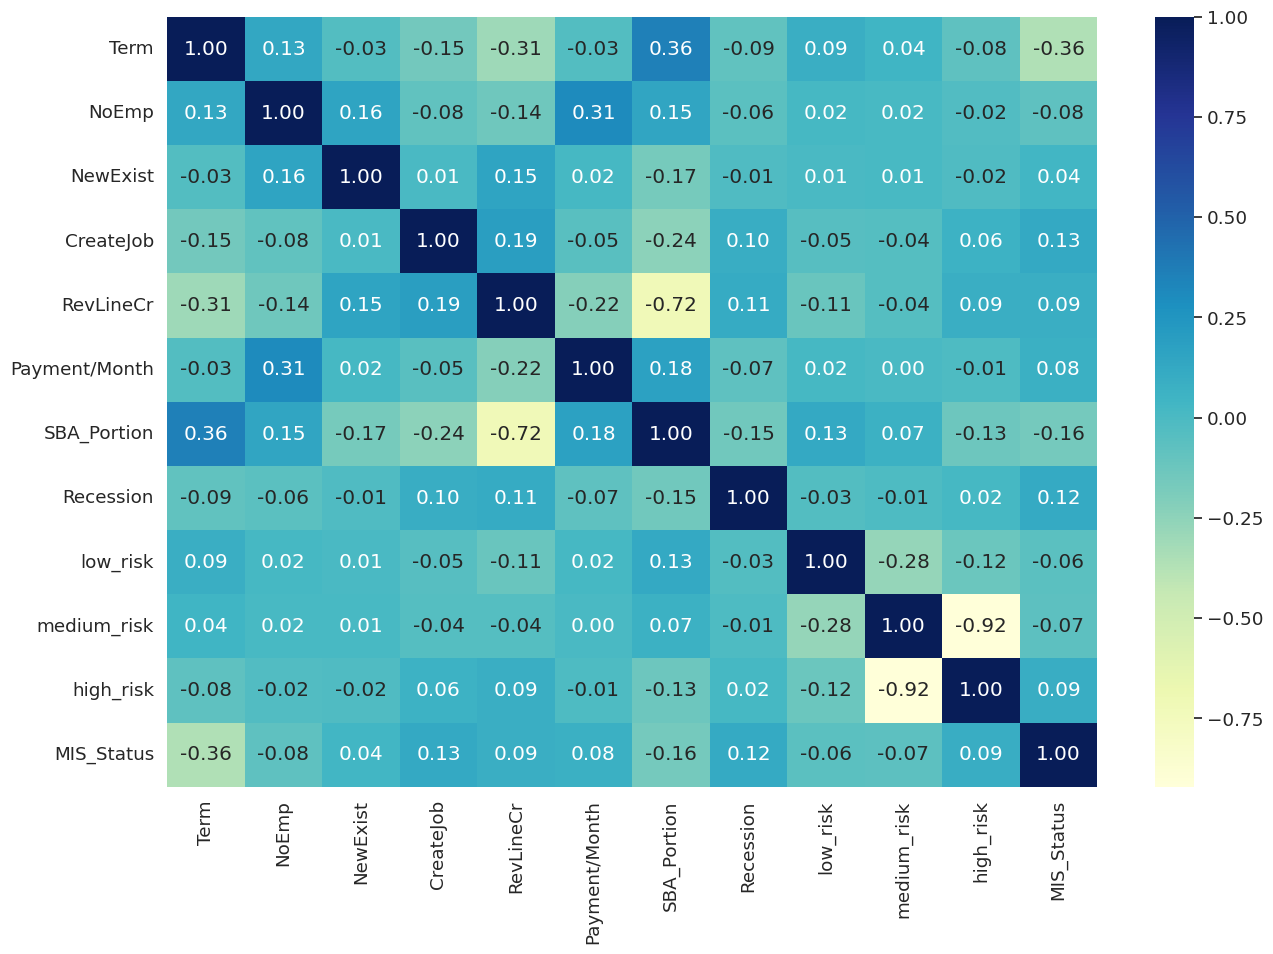

In [239]:
# Correlation matrix (Numeric Features)
corr_matrix = df_train_clean.corr()
fig, ax = plt.subplots(1,
                       1,
                       figsize=(15, 10))
sns.heatmap(data=corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="YlGnBu");

In [240]:
# p-value
import scipy.stats as st

X = df_train_clean.drop("MIS_Status", axis=1)
y = df_train_clean["MIS_Status"]

f_scores = []
p_values = []
for col in X.columns:
    groups = []
    for target_value in np.unique(y):
        groups.append(X.loc[y==target_value, col])
    f, p = st.f_oneway(*groups)
    f_scores.append(f)
    p_values.append(p)
anova_results = pd.DataFrame({'Feature': X.columns, 'F-score': f_scores, 'P-value': p_values})

In [241]:
print(anova_results)

          Feature       F-score        P-value
0            Term  47776.374938   0.000000e+00
1           NoEmp   2036.913966   0.000000e+00
2        NewExist    411.305732   2.179404e-91
3       CreateJob   5378.126913   0.000000e+00
4       RevLineCr   2411.195478   0.000000e+00
5   Payment/Month   2040.218784   0.000000e+00
6     SBA_Portion   8599.319673   0.000000e+00
7       Recession   4387.035369   0.000000e+00
8        low_risk   1223.234393  1.778944e-267
9     medium_risk   1434.882595  2.815938e-313
10      high_risk   2853.756842   0.000000e+00


In [242]:
df_train.dtypes

Term               int64
NoEmp              int64
NewExist           int64
CreateJob          int64
RevLineCr          int64
Payment/Month    float64
SBA_Portion      float64
Recession          int64
low_risk           int64
medium_risk        int64
high_risk          int64
MIS_Status         int64
dtype: object

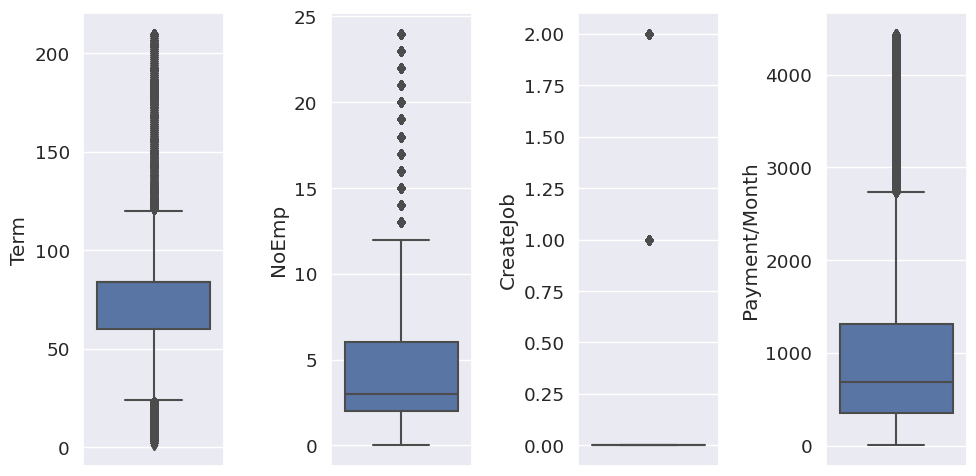

In [243]:
# Boxplot (Outliers) (Sesudah handling)
fig, ax = plt.subplots(nrows=1, 
                       ncols=4,
                       figsize=(10, 5))

for num, axes in zip(numeric_new, ax.flatten()):
    sns.boxplot(y=df_train_clean[num], ax=axes)
    plt.tight_layout()

### Feature Transformation

In [244]:
df_train_clean.sample(3)

Term  NoEmp  NewExist  CreateJob  RevLineCr  Payment/Month  \
429968    83      4         1          1          1     361.445783   
113198    84      5         1          1          1     297.619048   
91194     84     10         1          0          0    2678.571429   

        SBA_Portion  Recession  low_risk  medium_risk  high_risk  MIS_Status  
429968         0.50          0         0            1          0           0  
113198         0.50          0         0            0          1           0  
91194          0.75          0         0            0          1           0

In [245]:
# Transform numerical features
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# numerical_features = ["Term", "NoEmp", "GrAppv", "SBA_Portion"]
numerical_features = ["Term", "NoEmp", "Payment/Month", "SBA_Portion"]
std_scaler = StandardScaler()

for col in numerical_features:
    print(col)
    df_train_clean[col] = std_scaler.fit_transform(df_train_clean[col].values.reshape(len(df_train_clean), 1))
    X_test[col] = std_scaler.transform(X_test[col].values.reshape(len(X_test), 1))

Term
NoEmp
Payment/Month
SBA_Portion


In [246]:
df_train_clean[numerical_features].head()

Term     NoEmp  Payment/Month  SBA_Portion
176305 -0.709344 -0.611429      -0.587286    -0.926708
217204  0.110647 -0.822733      -0.448044    -0.926708
394488 -0.463347 -0.822733      -0.666064     1.100933
145556  0.110647  0.445089      -0.775074    -0.926708
494125  1.094635 -0.822733       0.042502     1.390596

### Handling Imbalance

In [247]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: xlabel='MIS_Status', ylabel='count'>

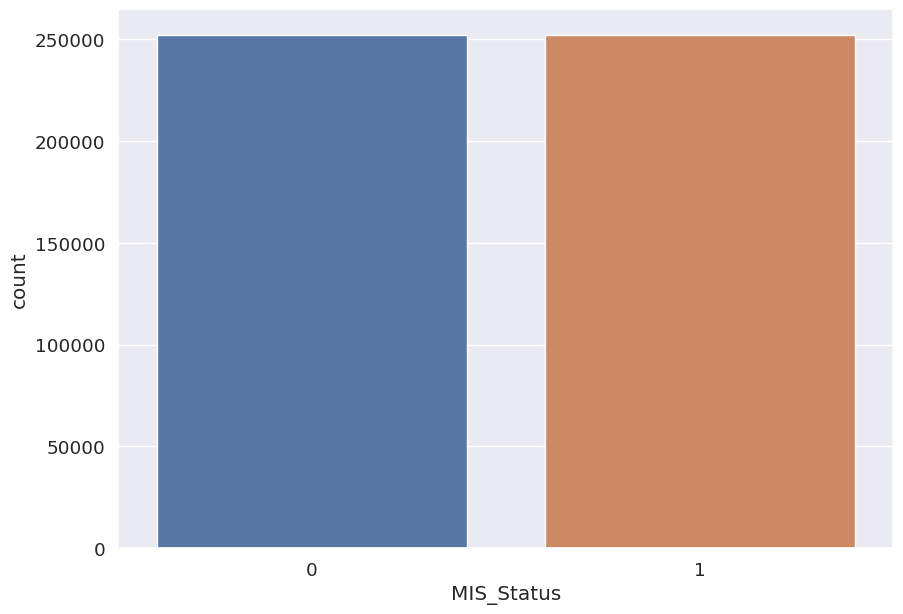

In [248]:
#Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

#Split the data to X and y
X = df_train_clean.drop("MIS_Status", axis=1)
y = df_train_clean["MIS_Status"]

#Convert all categorical variables in X to numerical values
cat_cols = X.select_dtypes(include="object").columns
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

#Convert target variable from strings to numerical values
le = LabelEncoder()
y = le.fit_transform(y)

#Apply oversampling
oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(X, y)

#Convert target variable back to original format
y_over = le.inverse_transform(y_over)

#Combine y_over into X_over
X_over["MIS_Status"] = y_over

#Change to dataframe after oversampling
df_train_clean_over = X_over

sns.countplot(data=df_train_clean_over, x="MIS_Status")


## Modeling

In [249]:
# Split into training set
X_train = df_train_clean_over.drop("MIS_Status", axis=1)
y_train = df_train_clean_over["MIS_Status"]

In [250]:
# Put a model in a dictionary 

# BASELINE MODELS

models = {
            "Random Forest Classifier": RandomForestClassifier(),
            "Logistic Regression": LogisticRegression(),
            "SGD Classifier": SGDClassifier(),
            "Decision Tree": DecisionTreeClassifier(), 
}

# Create a function for fitting and evaluating the model
def fit_and_scores(model, X_train, y_train, X_test, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no lables)
    y_train : training labels
    y_test : test labels
    """
    # Dictionary for storing model scores
    names = []
    accuracy = []
    precision = []
    recall = []
    f1 = []
    
    model_scores = {"model":names,
                    "accuracy":accuracy,
                    "precision":precision,
                    "recall": recall,
                    "f1": f1}
    
    # Loop through the models
    for name,model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predictions
        y_preds = model.predict(X_test)
        
        # Evaluate the models
        names.append(name)
        accuracy.append(round(accuracy_score(y_test, y_preds), 2))
        precision.append(round(precision_score(y_test, y_preds), 2))
        recall.append(round(recall_score(y_test, y_preds), 2))
        f1.append(round(f1_score(y_test, y_preds), 2))
    
    model_scores = {"model":names,
                    "accuracy":accuracy,
                    "precision":precision,
                    "recall": recall,
                    "f1": f1}
    
    return model_scores

In [251]:
model_scores = fit_and_scores(models, X_train, y_train, X_test, y_test)
model_scores

{'model': ['Random Forest Classifier',
  'Logistic Regression',
  'SGD Classifier',
  'Decision Tree'],
 'accuracy': [0.9, 0.74, 0.74, 0.84],
 'precision': [0.72, 0.39, 0.39, 0.53],
 'recall': [0.78, 0.78, 0.78, 0.72],
 'f1': [0.75, 0.52, 0.52, 0.61]}

In [252]:
model_compare = pd.DataFrame(model_scores)
model_compare

model  accuracy  precision  recall    f1
0  Random Forest Classifier      0.90       0.72    0.78  0.75
1       Logistic Regression      0.74       0.39    0.78  0.52
2            SGD Classifier      0.74       0.39    0.78  0.52
3             Decision Tree      0.84       0.53    0.72  0.61

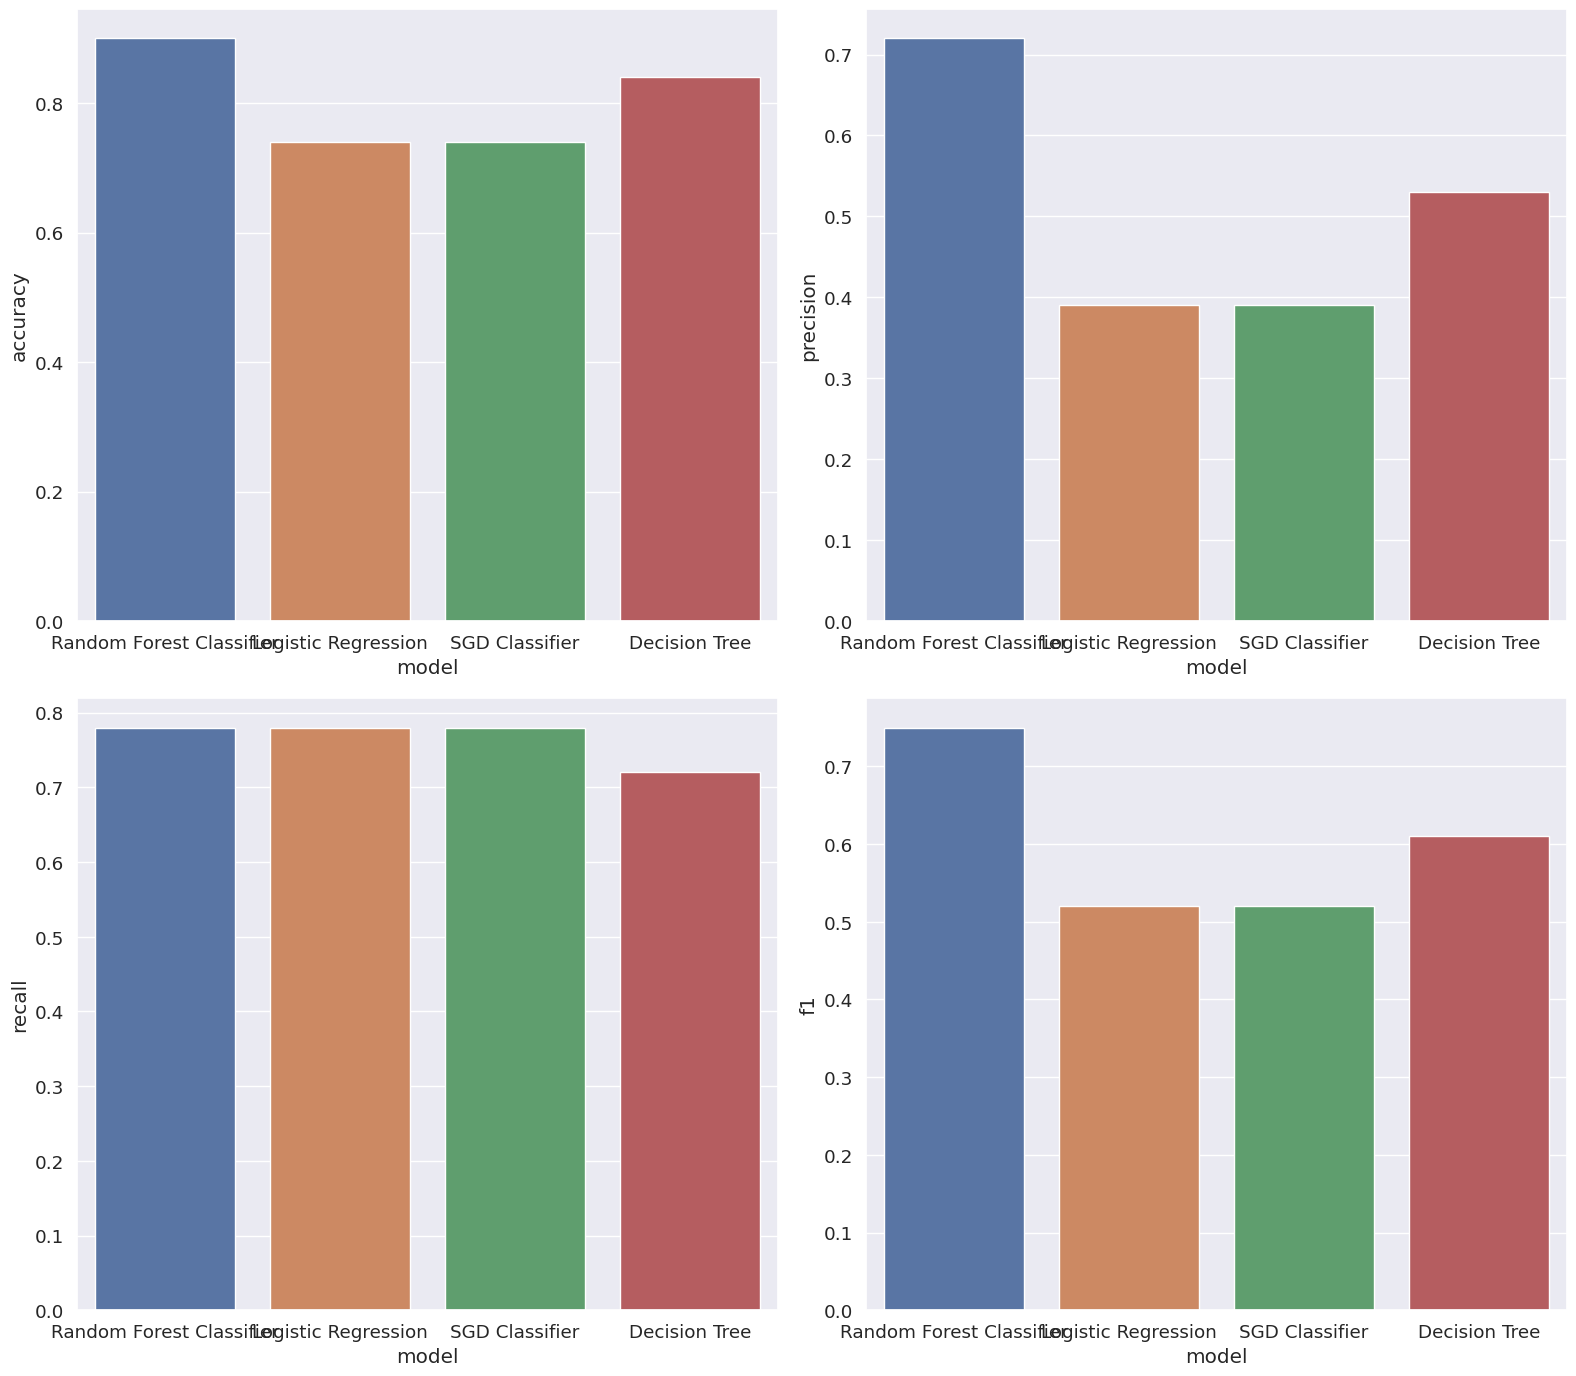

In [253]:
fig, ax = plt.subplots(2,
                       2,
                       figsize=(16,14))

sns.barplot(data=model_compare, x="model", y="accuracy", ax=ax[0][0])
sns.barplot(data=model_compare, x="model", y="precision", ax=ax[0][1])
sns.barplot(data=model_compare, x="model", y="recall", ax=ax[1][0])
sns.barplot(data=model_compare, x="model", y="f1", ax=ax[1][1])
plt.tight_layout();

## Hyperparameter Tuning

In [254]:
# Create hyperparameter grid for Random Forest Classifier
rf_grid = {
            "n_estimators": np.arange(10, 100, 10),
            "max_depth": [None, 3, 5],
            "min_samples_split": np.arange(2, 10, 3),
            "min_samples_leaf": np.arange(1, 20, 3)
}

# Create hyperparameter grid for Logistic Regression
log_reg_grid = {
                "C": [5, 15, 25, 35],
                "solver":["liblinear"]
}

# Create hyperparameter grid for SGD Classifier
sgd_grid = {
            "loss":["hinge", "log_loss", "modified_huber"],
            "penalty": ["l2", "l1", "elasticnet"]
}

# Create hyperparameter grid for KNN
tree_grid = {"criterion":['gini', 'entropy', 'log_loss'], 
             'splitter' :['best', 'random']
}

In [255]:
# Tune hyperparameter in Logistic Regression model
np.random.seed(42)

log_reg = LogisticRegression()
rs_log_reg = RandomizedSearchCV(estimator=log_reg,
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=2,
                                verbose=True)

# Fit the model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=2,
                   param_distributions={'C': [5, 15, 25, 35],
                                        'solver': ['liblinear']},
                   verbose=True)

In [256]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 15}

In [257]:
# Predict 
y_preds_log = rs_log_reg.predict(X_test)

# Evaluate accuracy score after tuning
tune_acc_train_log = rs_log_reg.score(X_train, y_train)
tune_acc_test_log = rs_log_reg.score(X_test, y_test)
print(f"Score for Testing sets : {tune_acc_train_log}")
print(f"Score for Training sets : {tune_acc_test_log}")

Score for Testing sets : 0.76445745149125
Score for Training sets : 0.7370873182235033


In [258]:
# Tune hyperparameter in SGDClassifier
np.random.seed(42)

sgd = SGDClassifier()
rs_sgd = RandomizedSearchCV(estimator=sgd,
                            param_distributions=sgd_grid,
                            cv=5,
                            n_iter=2,
                            verbose=True)

# Fit the model
rs_sgd.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=SGDClassifier(), n_iter=2,
                   param_distributions={'loss': ['hinge', 'log_loss',
                                                 'modified_huber'],
                                        'penalty': ['l2', 'l1', 'elasticnet']},
                   verbose=True)

In [259]:
rs_sgd.best_params_

{'penalty': 'l1', 'loss': 'hinge'}

In [260]:
# Predict 
y_preds = rs_sgd.predict(X_test)

# Evaluate accuracy score after tuning
tune_acc_train_sgd = rs_sgd.score(X_train, y_train)
tune_acc_test_sgd = rs_sgd.score(X_test, y_test)
print(f"Score for Testing sets : {tune_acc_test_sgd}")
print(f"Score for Training sets : {tune_acc_train_sgd}")

Score for Testing sets : 0.7677191143718066
Score for Training sets : 0.7590920446839644


In [261]:
# Tune hyperparameter in Decision Tree

np.random.seed(42)

dtree = DecisionTreeClassifier()
rs_tree = RandomizedSearchCV(estimator=dtree,
                            param_distributions=tree_grid,
                            cv=5,
                            n_iter=2,
                            verbose=True)
# Fit the model
rs_tree.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=2,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'splitter': ['best', 'random']},
                   verbose=True)

In [262]:
rs_tree.best_params_

{'splitter': 'best', 'criterion': 'gini'}

In [263]:
# Predict 
y_preds = rs_tree.predict(X_test)

# Evaluate accuracy score after tuning
tune_acc_train_tree = rs_tree.score(X_train, y_train)
tune_acc_test_tree = rs_tree.score(X_test, y_test)
print(f"Score for Testing sets : {tune_acc_test_tree}")
print(f"Score for Training sets : {tune_acc_train_tree}")

Score for Testing sets : 0.840814555220752
Score for Training sets : 0.9775410336636647


In [264]:
# Tuning Random Forest Classifier with RandomizedSearchCV

# Set seed
np.random.seed(42)

rfc_clf = RandomForestClassifier()
rs_rfc = RandomizedSearchCV(estimator=rfc_clf,
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=2,
                            verbose=True,
                            n_jobs=-1)
# Fit the model
rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5],
                                        'min_samples_leaf': array([ 1,  4,  7, 10, 13, 16, 19]),
                                        'min_samples_split': array([2, 5, 8]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [265]:
rs_rfc.best_params_

{'n_estimators': 40,
 'min_samples_split': 8,
 'min_samples_leaf': 10,
 'max_depth': None}

In [266]:
# Predict 
y_preds = rs_rfc.predict(X_test)

# Evaluate accuracy score after tuning
aft_tune_acc_train = rs_rfc.score(X_train, y_train)
aft_tune_acc_test = rs_rfc.score(X_test, y_test)
print(f"Score for Testing sets : {aft_tune_acc_test}")
print(f"Score for Training sets : {aft_tune_acc_train}")

Score for Testing sets : 0.8954539499541465
Score for Training sets : 0.922270998647743


## Kesimpulan Model

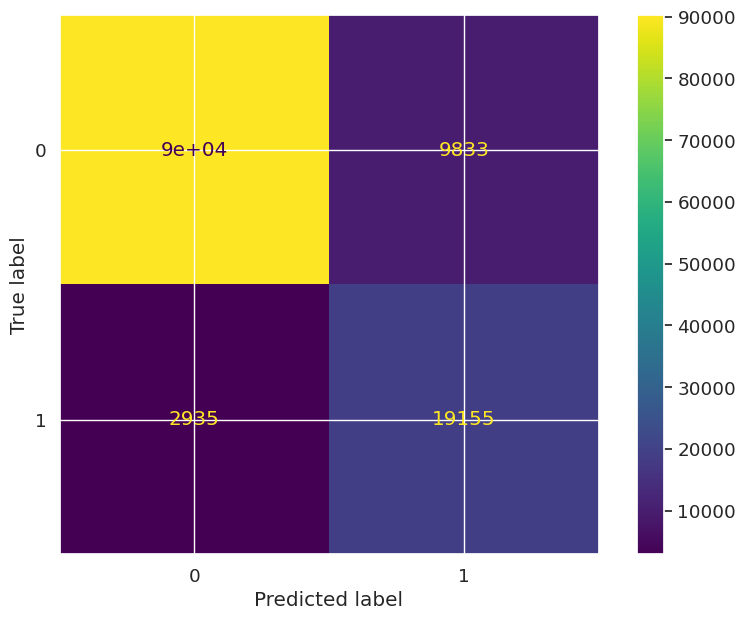

In [267]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

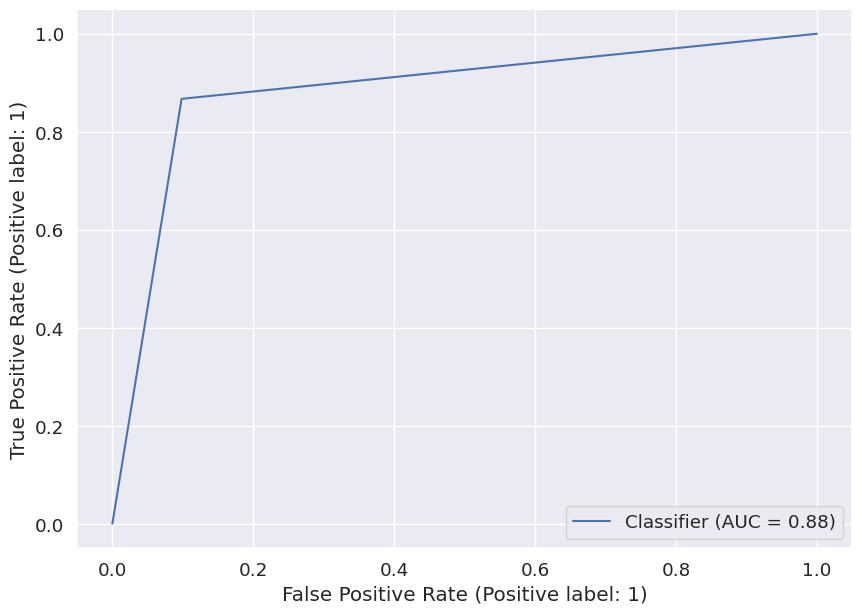

In [268]:
# Plot ROC and calculate AUC
RocCurveDisplay.from_predictions(y_test, y_preds)

In [269]:
# Print Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93    100038
           1       0.66      0.87      0.75     22090

    accuracy                           0.90    122128
   macro avg       0.81      0.88      0.84    122128
weighted avg       0.91      0.90      0.90    122128



## Calculate accuracy, precision, recall, f1 score using cross validation score

In [270]:
# Create a classifier with best hyperparameters
clf = RandomForestClassifier(n_estimators=40,
                            min_samples_split=8,
                            min_samples_leaf=10,
                            max_depth=None)

#lr = LogisticRegression(solver='liblinear', C=15)

#tree = DecisionTreeClassifier(splitter='best', criterion='gini')

In [271]:
# Fit the model
model = RandomForestClassifier(n_estimators=40,
                             min_samples_split=8,
                             min_samples_leaf=10,
                             max_depth=None, 
                             random_state=42)
model.fit(X, y)

# Calculate feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature importances
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

1. Term (0.715332)
2. Payment/Month (0.119415)
3. SBA_Portion (0.067754)
4. CreateJob (0.027125)
5. NoEmp (0.020996)
6. Recession (0.016084)
7. RevLineCr (0.013358)
8. NewExist (0.006941)
9. high_risk (0.006547)
10. low_risk (0.003603)
11. medium_risk (0.002845)


In [272]:
# Calculate accuracy, precision, recall, f1 score, with cross validation score
# Cross-validated accuracy
cv_acc = cross_val_score(clf, 
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.9283392059401114

In [273]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8543828320364671

In [274]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.7751250076113267

In [275]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8145026880671441

### XGBoost

In [276]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

def model_eval(algo,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_train_ypred = algo.predict(X_train)
    y_train_prob = algo.predict_proba(X_train)[:,1]

    # TEST

    y_test_ypred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,1]
    y_probas = algo.predict_proba(X_test)[:,1]
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_ypred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show() 
    print('='*100)
    print('Classification Report: \n', classification_report(y_test, y_test_ypred, digits=3))
    print('='*100)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    roc_auc = roc_auc_score(y_test, y_test_prob)
    plt.figure(figsize=(16,9))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # PR Curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)
    ap = average_precision_score(y_test, y_test_prob)
    plt.figure(figsize=(16,9))
    plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AP = %0.2f)' % ap)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")
    plt.show()

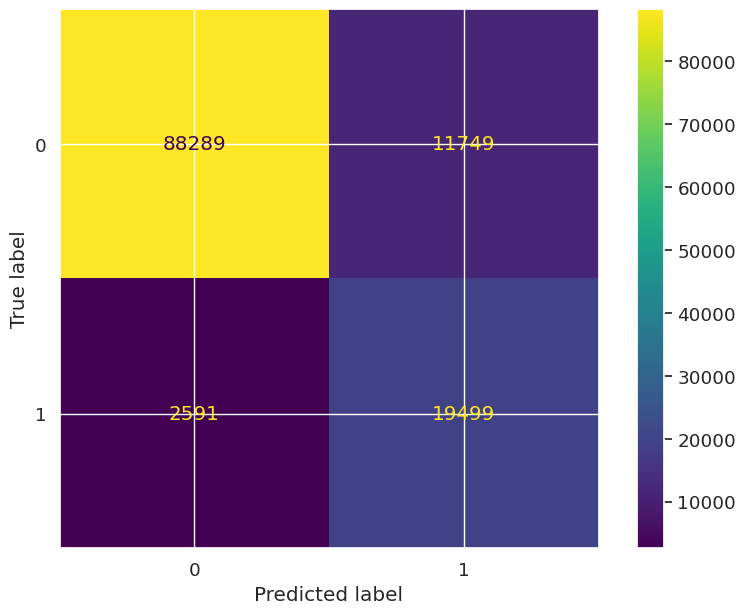

Classification Report: 
               precision    recall  f1-score   support

           0      0.971     0.883     0.925    100038
           1      0.624     0.883     0.731     22090

    accuracy                          0.883    122128
   macro avg      0.798     0.883     0.828    122128
weighted avg      0.909     0.883     0.890    122128



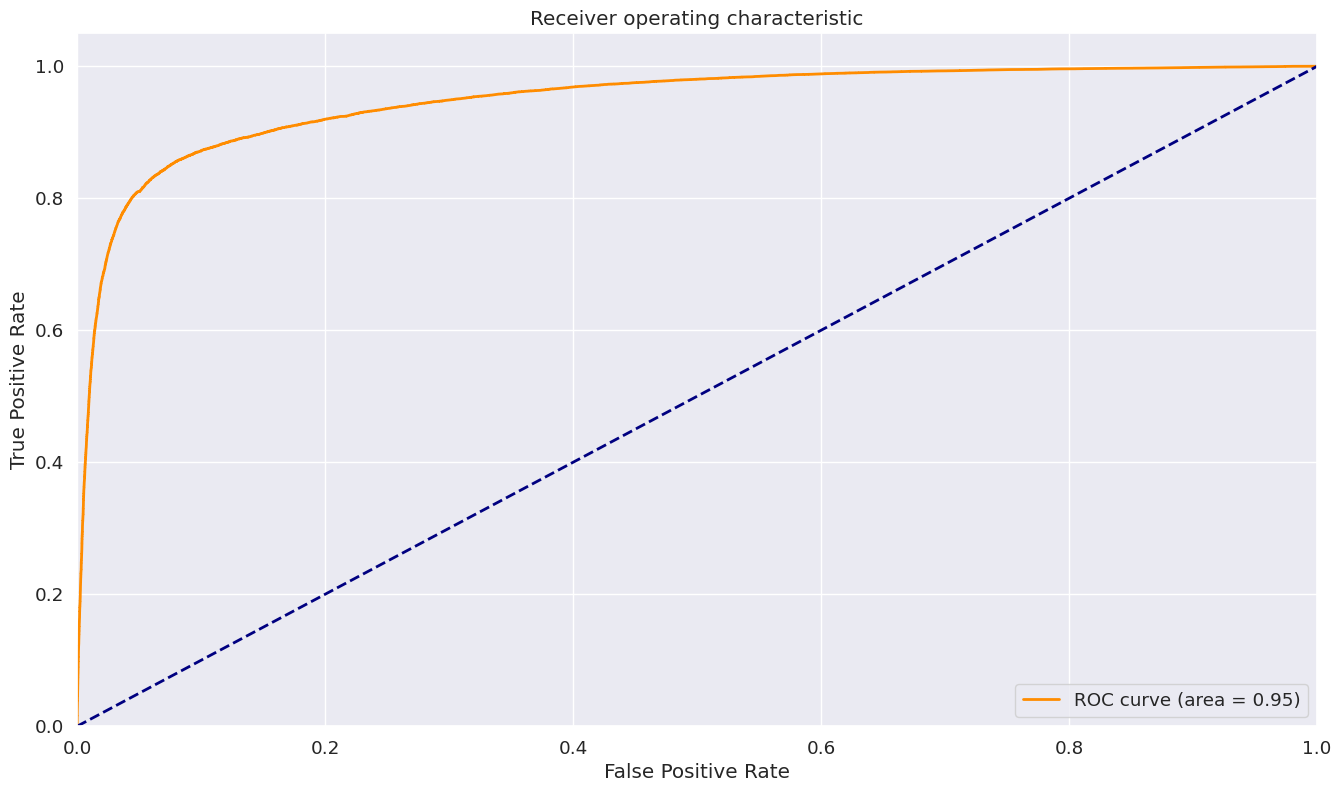

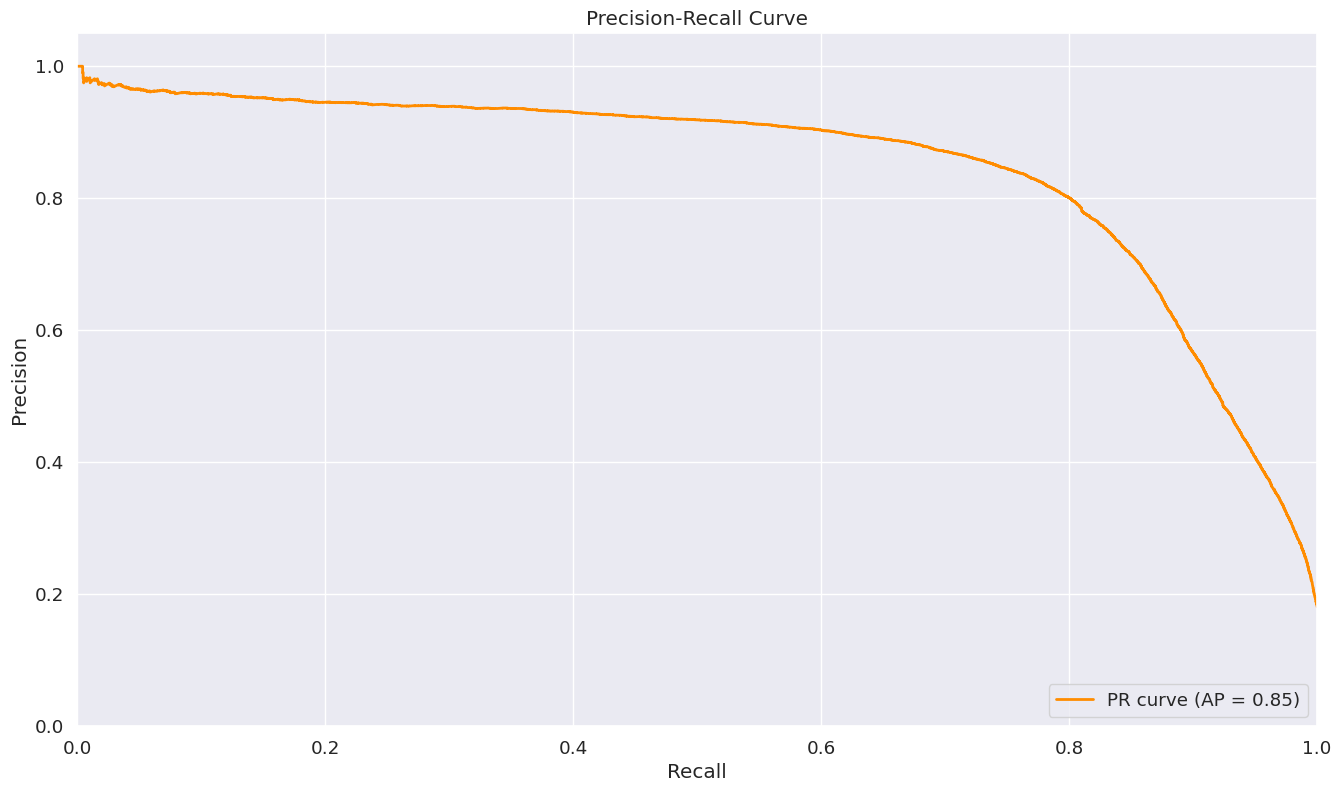

In [277]:
#XGBoost
from xgboost import XGBClassifier
import xgboost as xgb

xgb = XGBClassifier()
model_eval(xgb,X_train,y_train,X_test,y_test)

In [278]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 0, 'Score')

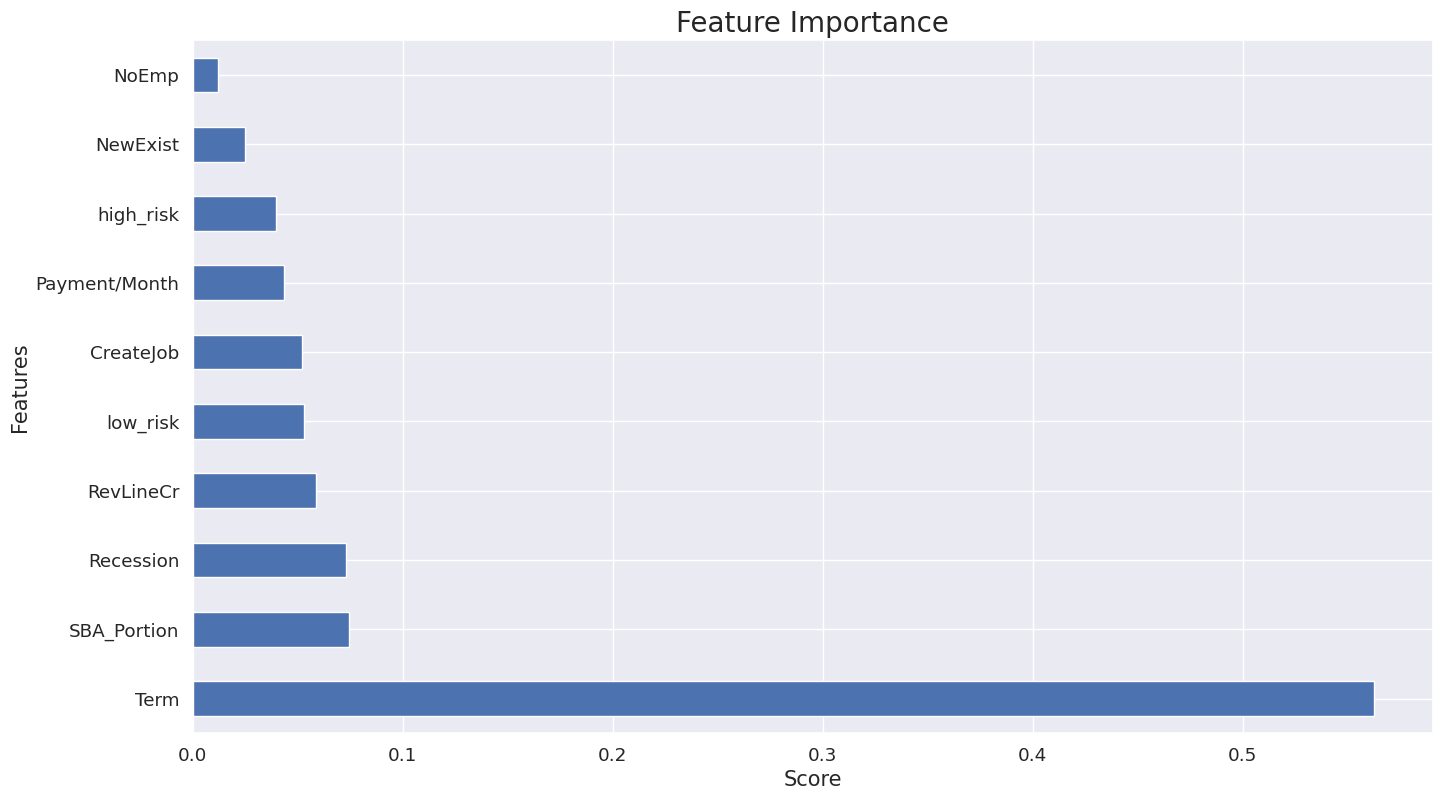

In [279]:
# we gonna use fetaure importance on XGboost
model = XGBClassifier()
model.fit(X,y)

# we visualized important features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
f, ax = plt.subplots(figsize=(16,9))
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance', fontsize=20)
plt.ylabel('Features', fontsize=15)
plt.xlabel('Score', fontsize=15)

Business Recommendation:

- Term bisa meningkatkan jangka waktu pinjaman sehingga banyak nasabah yang berpotensi berhasil melunasi pinjaman
- SBA warranty portion
- Jenis kredit 

In [280]:
# # Tuning XGB
# params ={"learning_rate"    : [0.05, 0.10, 0.15] ,
#          "max_depth"        : [ 3, 4, 5, 6],
#          "min_child_weight" : [ 1, 3, 5, 7 ],
#          "gamma"            : [ 0.0, 0.1, 0.2 ],
#          "colsample_bytree" : [ 0.3, 0.4, 0.5] }

# # Best parameters
# {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.15, 'max_depth': 6, 'min_child_weight': 1}


# xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#                     colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
#                     learning_rate=0.15, max_delta_step=0, max_depth=6,
#                     min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
#                     nthread=None, objective='binary:logistic', random_state=0,
#                     reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#                     silent=None, subsample=1, verbosity=1)

# model_eval(xgb,X_train,y_train,X_test,y_test)

## Simulasi Model

In [306]:
y_preds = xgb.predict(X_test)

data_banding = {
                "Prediction result": y_preds,
                "Real data": y_test
}

hasil_komparasi = pd.DataFrame(data_banding)
hasil_komparasi.sample(10)

Prediction result  Real data
796653                  0          0
336989                  0          0
150019                  1          1
297127                  0          0
142446                  0          0
518011                  0          0
36430                   0          0
732215                  0          1
604023                  0          0
739516                  0          1

In [323]:
preds_1 = len(hasil_komparasi[hasil_komparasi["Prediction result"] == 1]) / len(hasil_komparasi) * 100
print(f"Persentase prediction is 1: {preds_1:.2f}%")

preds_0 = len(hasil_komparasi[hasil_komparasi["Prediction result"] == 0]) / len(hasil_komparasi) * 100
print(f"Persentase prediction is 0: {preds_0:.2f}%")

Persentase prediction is 1: 9.48%
Persentase prediction is 0: 90.52%


In [322]:
real_1 = len(hasil_komparasi[hasil_komparasi["Real data"] == 1]) / len(hasil_komparasi) * 100 
print(f"Persentase real is 1: {real_1:.2f}%")

real_0 = len(hasil_komparasi[hasil_komparasi["Real data"] == 0]) / len(hasil_komparasi) * 100
print(f"Persentase real is 0: {real_0:.2f}%")

Persentase real is 1: 18.09%
Persentase real is 0: 81.91%
